In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

In [2]:
print("TensorFlow version is " + tf.__version__)

TensorFlow version is 2.6.0


In [3]:
feature_file_name = "DNN_features_June20.txt"
label_file_name = "DNN_WeightLevel_Labels_June20.txt"

model_saving_path = 'MuscleNET_Models/DNN/MuscleNET_Training_Quality_Detection'

In [4]:
features = np.loadtxt(feature_file_name)
labels = np.loadtxt(label_file_name)
labels = labels.astype(int)

features, labels = shuffle(features, labels, random_state=0)

print("features shape ", features.shape)
print("labels shape ", labels.shape)

features shape  (213, 16)
labels shape  (213,)


In [5]:
labels_one_hot = tf.one_hot(labels, np.max(labels)+1)

print("one hot encoding labels shape ", labels_one_hot.shape)

one hot encoding labels shape  (213, 3)


In [6]:
exampleSize, featureSize = features.shape

In [7]:
numTrain = int(features.shape[0] * 0.7)
x_train = features[:numTrain,:]
y_train = labels_one_hot[:numTrain]
x_test = features[numTrain:,:]
y_test = labels_one_hot[numTrain:]

print("training set feature shape ", x_train.shape)
print("training set label shape ", y_train.shape)
print("test set feature shape ", x_test.shape)
print("test set label shape ", y_test.shape)

training set feature shape  (149, 16)
training set label shape  (149, 3)
test set feature shape  (64, 16)
test set label shape  (64, 3)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(featureSize,)),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [10]:
model.compile(optimizer = optimizer,
             loss = "categorical_crossentropy",
             metrics=["acc",
                     tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.FalsePositives(),
                     tf.keras.metrics.TrueNegatives(),
                     tf.keras.metrics.TruePositives()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                588       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 39        
Total params: 6,147
Trainable params: 6,147
Non-trainable params: 0
_________________________________________________________________


In [11]:
starting = time.time()
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=3000)
timePassed = time.time() - starting
print("Time passed for training: ", timePassed)

Epoch 1/3000
5/5 [==============================] - 1s 114ms/step - loss: 31.6379 - acc: 0.2215 - false_negatives: 116.0000 - false_positives: 114.0000 - true_negatives: 184.0000 - true_positives: 33.0000 - val_loss: 5.6894 - val_acc: 0.4531 - val_false_negatives: 35.0000 - val_false_positives: 35.0000 - val_true_negatives: 93.0000 - val_true_positives: 29.0000
Epoch 2/3000
5/5 [==============================] - 0s 7ms/step - loss: 6.8021 - acc: 0.3289 - false_negatives: 100.0000 - false_positives: 100.0000 - true_negatives: 198.0000 - true_positives: 49.0000 - val_loss: 4.4602 - val_acc: 0.5469 - val_false_negatives: 29.0000 - val_false_positives: 29.0000 - val_true_negatives: 99.0000 - val_true_positives: 35.0000
Epoch 3/3000
5/5 [==============================] - 0s 7ms/step - loss: 3.3292 - acc: 0.5235 - false_negatives: 73.0000 - false_positives: 71.0000 - true_negatives: 227.0000 - true_positives: 76.0000 - val_loss: 4.9212 - val_acc: 0.3750 - val_false_negatives: 40.0000 - val_f

Epoch 24/3000
5/5 [==============================] - 0s 6ms/step - loss: 1.3774 - acc: 0.5906 - false_negatives: 63.0000 - false_positives: 58.0000 - true_negatives: 240.0000 - true_positives: 86.0000 - val_loss: 1.8484 - val_acc: 0.4375 - val_false_negatives: 37.0000 - val_false_positives: 33.0000 - val_true_negatives: 95.0000 - val_true_positives: 27.0000
Epoch 25/3000
5/5 [==============================] - 0s 6ms/step - loss: 1.1706 - acc: 0.5839 - false_negatives: 65.0000 - false_positives: 57.0000 - true_negatives: 241.0000 - true_positives: 84.0000 - val_loss: 0.8868 - val_acc: 0.5938 - val_false_negatives: 28.0000 - val_false_positives: 26.0000 - val_true_negatives: 102.0000 - val_true_positives: 36.0000
Epoch 26/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.9953 - acc: 0.5772 - false_negatives: 69.0000 - false_positives: 53.0000 - true_negatives: 245.0000 - true_positives: 80.0000 - val_loss: 1.3468 - val_acc: 0.6406 - val_false_negatives: 25.0000 - val_fals

Epoch 47/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8103 - acc: 0.6577 - false_negatives: 62.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 87.0000 - val_loss: 0.8569 - val_acc: 0.6406 - val_false_negatives: 30.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 34.0000
Epoch 48/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7823 - acc: 0.6107 - false_negatives: 65.0000 - false_positives: 48.0000 - true_negatives: 250.0000 - true_positives: 84.0000 - val_loss: 0.9607 - val_acc: 0.6250 - val_false_negatives: 26.0000 - val_false_positives: 24.0000 - val_true_negatives: 104.0000 - val_true_positives: 38.0000
Epoch 49/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.9592 - acc: 0.6242 - false_negatives: 62.0000 - false_positives: 47.0000 - true_negatives: 251.0000 - true_positives: 87.0000 - val_loss: 1.0324 - val_acc: 0.6094 - val_false_negatives: 26.0000 - val_fal

Epoch 70/3000
5/5 [==============================] - 0s 7ms/step - loss: 1.1642 - acc: 0.5570 - false_negatives: 69.0000 - false_positives: 62.0000 - true_negatives: 236.0000 - true_positives: 80.0000 - val_loss: 1.1784 - val_acc: 0.5312 - val_false_negatives: 32.0000 - val_false_positives: 25.0000 - val_true_negatives: 103.0000 - val_true_positives: 32.0000
Epoch 71/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.9009 - acc: 0.6309 - false_negatives: 58.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 91.0000 - val_loss: 0.8875 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 40.0000
Epoch 72/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8581 - acc: 0.5705 - false_negatives: 68.0000 - false_positives: 60.0000 - true_negatives: 238.0000 - true_positives: 81.0000 - val_loss: 1.2373 - val_acc: 0.4531 - val_false_negatives: 37.0000 - val_fal

Epoch 93/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.9506 - acc: 0.6242 - false_negatives: 63.0000 - false_positives: 50.0000 - true_negatives: 248.0000 - true_positives: 86.0000 - val_loss: 1.0167 - val_acc: 0.5469 - val_false_negatives: 33.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 31.0000
Epoch 94/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7624 - acc: 0.6309 - false_negatives: 61.0000 - false_positives: 49.0000 - true_negatives: 249.0000 - true_positives: 88.0000 - val_loss: 1.6578 - val_acc: 0.5000 - val_false_negatives: 32.0000 - val_false_positives: 29.0000 - val_true_negatives: 99.0000 - val_true_positives: 32.0000
Epoch 95/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.9007 - acc: 0.6309 - false_negatives: 59.0000 - false_positives: 48.0000 - true_negatives: 250.0000 - true_positives: 90.0000 - val_loss: 1.0611 - val_acc: 0.5156 - val_false_negatives: 36.0000 - val_fals

Epoch 116/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.9225 - acc: 0.5772 - false_negatives: 71.0000 - false_positives: 52.0000 - true_negatives: 246.0000 - true_positives: 78.0000 - val_loss: 1.1252 - val_acc: 0.5156 - val_false_negatives: 32.0000 - val_false_positives: 28.0000 - val_true_negatives: 100.0000 - val_true_positives: 32.0000
Epoch 117/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.9895 - acc: 0.6510 - false_negatives: 57.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 92.0000 - val_loss: 1.0195 - val_acc: 0.5000 - val_false_negatives: 35.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 29.0000
Epoch 118/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8499 - acc: 0.6309 - false_negatives: 60.0000 - false_positives: 45.0000 - true_negatives: 253.0000 - true_positives: 89.0000 - val_loss: 0.8666 - val_acc: 0.6406 - val_false_negatives: 24.0000 - val_

Epoch 139/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7810 - acc: 0.6174 - false_negatives: 58.0000 - false_positives: 52.0000 - true_negatives: 246.0000 - true_positives: 91.0000 - val_loss: 0.9445 - val_acc: 0.5312 - val_false_negatives: 36.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 28.0000
Epoch 140/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7345 - acc: 0.6040 - false_negatives: 64.0000 - false_positives: 45.0000 - true_negatives: 253.0000 - true_positives: 85.0000 - val_loss: 0.8939 - val_acc: 0.5469 - val_false_negatives: 35.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 29.0000
Epoch 141/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6769 - acc: 0.6779 - false_negatives: 64.0000 - false_positives: 36.0000 - true_negatives: 262.0000 - true_positives: 85.0000 - val_loss: 0.7876 - val_acc: 0.6875 - val_false_negatives: 24.0000 - val_

Epoch 162/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6716 - acc: 0.6577 - false_negatives: 60.0000 - false_positives: 39.0000 - true_negatives: 259.0000 - true_positives: 89.0000 - val_loss: 0.7599 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 44.0000
Epoch 163/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6571 - acc: 0.6443 - false_negatives: 62.0000 - false_positives: 42.0000 - true_negatives: 256.0000 - true_positives: 87.0000 - val_loss: 0.9354 - val_acc: 0.5625 - val_false_negatives: 32.0000 - val_false_positives: 26.0000 - val_true_negatives: 102.0000 - val_true_positives: 32.0000
Epoch 164/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.7346 - acc: 0.6242 - false_negatives: 63.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 86.0000 - val_loss: 1.0395 - val_acc: 0.5156 - val_false_negatives: 33.0000 - val_

Epoch 185/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.9294 - acc: 0.5705 - false_negatives: 67.0000 - false_positives: 60.0000 - true_negatives: 238.0000 - true_positives: 82.0000 - val_loss: 1.1353 - val_acc: 0.4688 - val_false_negatives: 38.0000 - val_false_positives: 24.0000 - val_true_negatives: 104.0000 - val_true_positives: 26.0000
Epoch 186/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.9166 - acc: 0.6309 - false_negatives: 60.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 89.0000 - val_loss: 0.8190 - val_acc: 0.5938 - val_false_negatives: 26.0000 - val_false_positives: 24.0000 - val_true_negatives: 104.0000 - val_true_positives: 38.0000
Epoch 187/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.9145 - acc: 0.6107 - false_negatives: 63.0000 - false_positives: 48.0000 - true_negatives: 250.0000 - true_positives: 86.0000 - val_loss: 1.0200 - val_acc: 0.5938 - val_false_negatives: 27.0000 - val_

5/5 [==============================] - 0s 6ms/step - loss: 0.7523 - acc: 0.6376 - false_negatives: 59.0000 - false_positives: 47.0000 - true_negatives: 251.0000 - true_positives: 90.0000 - val_loss: 1.1651 - val_acc: 0.4375 - val_false_negatives: 38.0000 - val_false_positives: 31.0000 - val_true_negatives: 97.0000 - val_true_positives: 26.0000
Epoch 208/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7932 - acc: 0.6443 - false_negatives: 60.0000 - false_positives: 45.0000 - true_negatives: 253.0000 - true_positives: 89.0000 - val_loss: 0.9737 - val_acc: 0.5938 - val_false_negatives: 32.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 32.0000
Epoch 209/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.7036 - acc: 0.6510 - false_negatives: 58.0000 - false_positives: 40.0000 - true_negatives: 258.0000 - true_positives: 91.0000 - val_loss: 0.8352 - val_acc: 0.6406 - val_false_negatives: 26.0000 - val_false_positives:

Epoch 230/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6346 - acc: 0.6980 - false_negatives: 58.0000 - false_positives: 38.0000 - true_negatives: 260.0000 - true_positives: 91.0000 - val_loss: 0.7816 - val_acc: 0.6719 - val_false_negatives: 28.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 36.0000
Epoch 231/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6247 - acc: 0.6711 - false_negatives: 54.0000 - false_positives: 40.0000 - true_negatives: 258.0000 - true_positives: 95.0000 - val_loss: 1.2345 - val_acc: 0.4688 - val_false_negatives: 36.0000 - val_false_positives: 29.0000 - val_true_negatives: 99.0000 - val_true_positives: 28.0000
Epoch 232/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.7197 - acc: 0.6779 - false_negatives: 57.0000 - false_positives: 41.0000 - true_negatives: 257.0000 - true_positives: 92.0000 - val_loss: 0.7330 - val_acc: 0.7031 - val_false_negatives: 19.0000 - val_f

Epoch 253/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8222 - acc: 0.6443 - false_negatives: 57.0000 - false_positives: 50.0000 - true_negatives: 248.0000 - true_positives: 92.0000 - val_loss: 0.8332 - val_acc: 0.6250 - val_false_negatives: 30.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 34.0000
Epoch 254/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.7492 - acc: 0.6711 - false_negatives: 50.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 99.0000 - val_loss: 2.2898 - val_acc: 0.4688 - val_false_negatives: 34.0000 - val_false_positives: 34.0000 - val_true_negatives: 94.0000 - val_true_positives: 30.0000
Epoch 255/3000
5/5 [==============================] - 0s 7ms/step - loss: 1.3123 - acc: 0.5503 - false_negatives: 67.0000 - false_positives: 65.0000 - true_negatives: 233.0000 - true_positives: 82.0000 - val_loss: 0.8508 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_f

Epoch 276/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8116 - acc: 0.6711 - false_negatives: 53.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 96.0000 - val_loss: 0.8124 - val_acc: 0.6094 - val_false_negatives: 25.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 39.0000
Epoch 277/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8159 - acc: 0.6443 - false_negatives: 57.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 92.0000 - val_loss: 0.9266 - val_acc: 0.6094 - val_false_negatives: 29.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 35.0000
Epoch 278/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.7157 - acc: 0.6510 - false_negatives: 55.0000 - false_positives: 43.0000 - true_negatives: 255.0000 - true_positives: 94.0000 - val_loss: 0.9025 - val_acc: 0.5781 - val_false_negatives: 33.0000 - val_

Epoch 299/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7292 - acc: 0.6644 - false_negatives: 56.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 93.0000 - val_loss: 0.8054 - val_acc: 0.6562 - val_false_negatives: 23.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 41.0000
Epoch 300/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7103 - acc: 0.6644 - false_negatives: 57.0000 - false_positives: 40.0000 - true_negatives: 258.0000 - true_positives: 92.0000 - val_loss: 0.9240 - val_acc: 0.6094 - val_false_negatives: 26.0000 - val_false_positives: 24.0000 - val_true_negatives: 104.0000 - val_true_positives: 38.0000
Epoch 301/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7760 - acc: 0.6644 - false_negatives: 53.0000 - false_positives: 47.0000 - true_negatives: 251.0000 - true_positives: 96.0000 - val_loss: 1.0611 - val_acc: 0.5000 - val_false_negatives: 34.0000 - val_

Epoch 322/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.8790 - acc: 0.6376 - false_negatives: 56.0000 - false_positives: 49.0000 - true_negatives: 249.0000 - true_positives: 93.0000 - val_loss: 1.3036 - val_acc: 0.6094 - val_false_negatives: 25.0000 - val_false_positives: 24.0000 - val_true_negatives: 104.0000 - val_true_positives: 39.0000
Epoch 323/3000
5/5 [==============================] - 0s 7ms/step - loss: 1.0530 - acc: 0.6107 - false_negatives: 63.0000 - false_positives: 51.0000 - true_negatives: 247.0000 - true_positives: 86.0000 - val_loss: 1.4472 - val_acc: 0.5625 - val_false_negatives: 32.0000 - val_false_positives: 25.0000 - val_true_negatives: 103.0000 - val_true_positives: 32.0000
Epoch 324/3000
5/5 [==============================] - 0s 7ms/step - loss: 1.0872 - acc: 0.6040 - false_negatives: 62.0000 - false_positives: 58.0000 - true_negatives: 240.0000 - true_positives: 87.0000 - val_loss: 1.4144 - val_acc: 0.3906 - val_false_negatives: 40.0000 - val_

Epoch 345/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7414 - acc: 0.6846 - false_negatives: 52.0000 - false_positives: 43.0000 - true_negatives: 255.0000 - true_positives: 97.0000 - val_loss: 1.4728 - val_acc: 0.5000 - val_false_negatives: 33.0000 - val_false_positives: 27.0000 - val_true_negatives: 101.0000 - val_true_positives: 31.0000
Epoch 346/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.8664 - acc: 0.6309 - false_negatives: 59.0000 - false_positives: 48.0000 - true_negatives: 250.0000 - true_positives: 90.0000 - val_loss: 0.9985 - val_acc: 0.6406 - val_false_negatives: 25.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 39.0000
Epoch 347/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8458 - acc: 0.6242 - false_negatives: 61.0000 - false_positives: 49.0000 - true_negatives: 249.0000 - true_positives: 88.0000 - val_loss: 0.9229 - val_acc: 0.5625 - val_false_negatives: 34.0000 - val_

5/5 [==============================] - 0s 7ms/step - loss: 0.7427 - acc: 0.6577 - false_negatives: 53.0000 - false_positives: 47.0000 - true_negatives: 251.0000 - true_positives: 96.0000 - val_loss: 1.4217 - val_acc: 0.5312 - val_false_negatives: 31.0000 - val_false_positives: 27.0000 - val_true_negatives: 101.0000 - val_true_positives: 33.0000
Epoch 368/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6630 - acc: 0.6846 - false_negatives: 51.0000 - false_positives: 36.0000 - true_negatives: 262.0000 - true_positives: 98.0000 - val_loss: 0.7643 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 44.0000
Epoch 369/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6909 - acc: 0.6846 - false_negatives: 49.0000 - false_positives: 38.0000 - true_negatives: 260.0000 - true_positives: 100.0000 - val_loss: 1.0410 - val_acc: 0.4844 - val_false_negatives: 35.0000 - val_false_positive

Epoch 390/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6056 - acc: 0.6913 - false_negatives: 51.0000 - false_positives: 31.0000 - true_negatives: 267.0000 - true_positives: 98.0000 - val_loss: 0.8207 - val_acc: 0.7031 - val_false_negatives: 22.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 42.0000
Epoch 391/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6477 - acc: 0.6846 - false_negatives: 56.0000 - false_positives: 39.0000 - true_negatives: 259.0000 - true_positives: 93.0000 - val_loss: 0.8560 - val_acc: 0.6406 - val_false_negatives: 25.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 39.0000
Epoch 392/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6044 - acc: 0.7047 - false_negatives: 48.0000 - false_positives: 38.0000 - true_negatives: 260.0000 - true_positives: 101.0000 - val_loss: 0.8458 - val_acc: 0.6406 - val_false_negatives: 28.0000 - val

5/5 [==============================] - 0s 6ms/step - loss: 0.6765 - acc: 0.6309 - false_negatives: 59.0000 - false_positives: 48.0000 - true_negatives: 250.0000 - true_positives: 90.0000 - val_loss: 1.2526 - val_acc: 0.5469 - val_false_negatives: 33.0000 - val_false_positives: 24.0000 - val_true_negatives: 104.0000 - val_true_positives: 31.0000
Epoch 413/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6593 - acc: 0.7047 - false_negatives: 50.0000 - false_positives: 35.0000 - true_negatives: 263.0000 - true_positives: 99.0000 - val_loss: 0.7793 - val_acc: 0.6719 - val_false_negatives: 22.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 42.0000
Epoch 414/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5802 - acc: 0.7383 - false_negatives: 43.0000 - false_positives: 34.0000 - true_negatives: 264.0000 - true_positives: 106.0000 - val_loss: 1.0913 - val_acc: 0.5156 - val_false_negatives: 32.0000 - val_false_positive

Epoch 435/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6535 - acc: 0.6980 - false_negatives: 52.0000 - false_positives: 34.0000 - true_negatives: 264.0000 - true_positives: 97.0000 - val_loss: 0.7722 - val_acc: 0.6719 - val_false_negatives: 22.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 42.0000
Epoch 436/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7106 - acc: 0.6242 - false_negatives: 62.0000 - false_positives: 47.0000 - true_negatives: 251.0000 - true_positives: 87.0000 - val_loss: 0.9025 - val_acc: 0.6250 - val_false_negatives: 29.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 35.0000
Epoch 437/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6420 - acc: 0.6779 - false_negatives: 50.0000 - false_positives: 43.0000 - true_negatives: 255.0000 - true_positives: 99.0000 - val_loss: 1.0786 - val_acc: 0.5312 - val_false_negatives: 32.0000 - val_

Epoch 458/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5704 - acc: 0.7315 - false_negatives: 50.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 99.0000 - val_loss: 0.8116 - val_acc: 0.6719 - val_false_negatives: 24.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 40.0000
Epoch 459/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5760 - acc: 0.7114 - false_negatives: 44.0000 - false_positives: 36.0000 - true_negatives: 262.0000 - true_positives: 105.0000 - val_loss: 1.1939 - val_acc: 0.4531 - val_false_negatives: 37.0000 - val_false_positives: 31.0000 - val_true_negatives: 97.0000 - val_true_positives: 27.0000
Epoch 460/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6414 - acc: 0.6980 - false_negatives: 52.0000 - false_positives: 30.0000 - true_negatives: 268.0000 - true_positives: 97.0000 - val_loss: 0.7177 - val_acc: 0.6562 - val_false_negatives: 22.0000 - val_

Epoch 481/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5491 - acc: 0.7315 - false_negatives: 46.0000 - false_positives: 34.0000 - true_negatives: 264.0000 - true_positives: 103.0000 - val_loss: 1.0114 - val_acc: 0.5312 - val_false_negatives: 30.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 34.0000
Epoch 482/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5372 - acc: 0.7450 - false_negatives: 43.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 106.0000 - val_loss: 0.7333 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 43.0000
Epoch 483/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5913 - acc: 0.7315 - false_negatives: 50.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 99.0000 - val_loss: 0.6691 - val_acc: 0.7656 - val_false_negatives: 17.0000 - va

Epoch 504/3000
5/5 [==============================] - 0s 8ms/step - loss: 0.5114 - acc: 0.7450 - false_negatives: 40.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 109.0000 - val_loss: 0.8580 - val_acc: 0.6406 - val_false_negatives: 31.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 33.0000
Epoch 505/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5296 - acc: 0.7785 - false_negatives: 43.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 106.0000 - val_loss: 0.7916 - val_acc: 0.7031 - val_false_negatives: 25.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 39.0000
Epoch 506/3000
5/5 [==============================] - 0s 8ms/step - loss: 0.5382 - acc: 0.7315 - false_negatives: 49.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 100.0000 - val_loss: 0.7106 - val_acc: 0.7031 - val_false_negatives: 19.0000 - v

Epoch 527/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5294 - acc: 0.7248 - false_negatives: 45.0000 - false_positives: 34.0000 - true_negatives: 264.0000 - true_positives: 104.0000 - val_loss: 0.9645 - val_acc: 0.6094 - val_false_negatives: 32.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 32.0000
Epoch 528/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6167 - acc: 0.7181 - false_negatives: 49.0000 - false_positives: 38.0000 - true_negatives: 260.0000 - true_positives: 100.0000 - val_loss: 0.7292 - val_acc: 0.7500 - val_false_negatives: 23.0000 - val_false_positives: 11.0000 - val_true_negatives: 117.0000 - val_true_positives: 41.0000
Epoch 529/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5973 - acc: 0.7181 - false_negatives: 46.0000 - false_positives: 35.0000 - true_negatives: 263.0000 - true_positives: 103.0000 - val_loss: 0.8045 - val_acc: 0.6719 - val_false_negatives: 25.0000 - v

Epoch 550/3000
5/5 [==============================] - 0s 8ms/step - loss: 0.5271 - acc: 0.7517 - false_negatives: 42.0000 - false_positives: 31.0000 - true_negatives: 267.0000 - true_positives: 107.0000 - val_loss: 0.9458 - val_acc: 0.6250 - val_false_negatives: 28.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 36.0000
Epoch 551/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6079 - acc: 0.7114 - false_negatives: 45.0000 - false_positives: 37.0000 - true_negatives: 261.0000 - true_positives: 104.0000 - val_loss: 0.7346 - val_acc: 0.7344 - val_false_negatives: 21.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 43.0000
Epoch 552/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5225 - acc: 0.7651 - false_negatives: 41.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 108.0000 - val_loss: 0.7667 - val_acc: 0.7344 - val_false_negatives: 19.0000 - v

5/5 [==============================] - 0s 7ms/step - loss: 0.6639 - acc: 0.7248 - false_negatives: 45.0000 - false_positives: 39.0000 - true_negatives: 259.0000 - true_positives: 104.0000 - val_loss: 1.1728 - val_acc: 0.5312 - val_false_negatives: 34.0000 - val_false_positives: 26.0000 - val_true_negatives: 102.0000 - val_true_positives: 30.0000
Epoch 573/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6436 - acc: 0.6779 - false_negatives: 54.0000 - false_positives: 40.0000 - true_negatives: 258.0000 - true_positives: 95.0000 - val_loss: 0.6740 - val_acc: 0.7344 - val_false_negatives: 18.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 46.0000
Epoch 574/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5165 - acc: 0.7651 - false_negatives: 39.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 110.0000 - val_loss: 0.8769 - val_acc: 0.6250 - val_false_negatives: 29.0000 - val_false_positiv

Epoch 595/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7967 - acc: 0.6510 - false_negatives: 55.0000 - false_positives: 48.0000 - true_negatives: 250.0000 - true_positives: 94.0000 - val_loss: 1.5053 - val_acc: 0.5000 - val_false_negatives: 33.0000 - val_false_positives: 29.0000 - val_true_negatives: 99.0000 - val_true_positives: 31.0000
Epoch 596/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7000 - acc: 0.6913 - false_negatives: 52.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 97.0000 - val_loss: 0.9530 - val_acc: 0.6094 - val_false_negatives: 27.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 37.0000
Epoch 597/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6420 - acc: 0.7114 - false_negatives: 49.0000 - false_positives: 36.0000 - true_negatives: 262.0000 - true_positives: 100.0000 - val_loss: 0.8758 - val_acc: 0.6406 - val_false_negatives: 28.0000 - val_

Epoch 618/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6025 - acc: 0.6846 - false_negatives: 51.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 98.0000 - val_loss: 1.1115 - val_acc: 0.5469 - val_false_negatives: 32.0000 - val_false_positives: 25.0000 - val_true_negatives: 103.0000 - val_true_positives: 32.0000
Epoch 619/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5885 - acc: 0.7248 - false_negatives: 47.0000 - false_positives: 36.0000 - true_negatives: 262.0000 - true_positives: 102.0000 - val_loss: 0.6444 - val_acc: 0.7656 - val_false_negatives: 17.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 47.0000
Epoch 620/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6111 - acc: 0.7047 - false_negatives: 49.0000 - false_positives: 38.0000 - true_negatives: 260.0000 - true_positives: 100.0000 - val_loss: 0.7970 - val_acc: 0.6719 - val_false_negatives: 29.0000 - va

Epoch 641/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6913 - acc: 0.6577 - false_negatives: 56.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 93.0000 - val_loss: 1.0759 - val_acc: 0.5156 - val_false_negatives: 34.0000 - val_false_positives: 25.0000 - val_true_negatives: 103.0000 - val_true_positives: 30.0000
Epoch 642/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5649 - acc: 0.7114 - false_negatives: 48.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 101.0000 - val_loss: 0.6897 - val_acc: 0.7031 - val_false_negatives: 19.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 45.0000
Epoch 643/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6970 - acc: 0.6779 - false_negatives: 50.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 99.0000 - val_loss: 1.3987 - val_acc: 0.4844 - val_false_negatives: 33.0000 - val

Epoch 664/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4973 - acc: 0.7987 - false_negatives: 35.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 114.0000 - val_loss: 0.7267 - val_acc: 0.6875 - val_false_negatives: 20.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 44.0000
Epoch 665/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4830 - acc: 0.7785 - false_negatives: 39.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 110.0000 - val_loss: 0.8486 - val_acc: 0.6406 - val_false_negatives: 28.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 36.0000
Epoch 666/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5080 - acc: 0.7383 - false_negatives: 44.0000 - false_positives: 35.0000 - true_negatives: 263.0000 - true_positives: 105.0000 - val_loss: 0.8801 - val_acc: 0.6719 - val_false_negatives: 23.0000 - v

5/5 [==============================] - 0s 6ms/step - loss: 0.4639 - acc: 0.8121 - false_negatives: 34.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 115.0000 - val_loss: 0.7739 - val_acc: 0.6250 - val_false_negatives: 27.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 37.0000
Epoch 687/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5050 - acc: 0.7718 - false_negatives: 39.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 110.0000 - val_loss: 0.8308 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 40.0000
Epoch 688/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5049 - acc: 0.7315 - false_negatives: 43.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 106.0000 - val_loss: 0.9072 - val_acc: 0.6250 - val_false_negatives: 29.0000 - val_false_positi

5/5 [==============================] - 0s 6ms/step - loss: 0.8022 - acc: 0.6711 - false_negatives: 49.0000 - false_positives: 46.0000 - true_negatives: 252.0000 - true_positives: 100.0000 - val_loss: 1.3222 - val_acc: 0.5469 - val_false_negatives: 33.0000 - val_false_positives: 28.0000 - val_true_negatives: 100.0000 - val_true_positives: 31.0000
Epoch 709/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7229 - acc: 0.6779 - false_negatives: 55.0000 - false_positives: 41.0000 - true_negatives: 257.0000 - true_positives: 94.0000 - val_loss: 0.7890 - val_acc: 0.7500 - val_false_negatives: 16.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 48.0000
Epoch 710/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5816 - acc: 0.7047 - false_negatives: 45.0000 - false_positives: 42.0000 - true_negatives: 256.0000 - true_positives: 104.0000 - val_loss: 0.9320 - val_acc: 0.6250 - val_false_negatives: 25.0000 - val_false_positiv

Epoch 731/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4880 - acc: 0.8121 - false_negatives: 34.0000 - false_positives: 23.0000 - true_negatives: 275.0000 - true_positives: 115.0000 - val_loss: 0.7450 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 40.0000
Epoch 732/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4860 - acc: 0.8054 - false_negatives: 31.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 118.0000 - val_loss: 0.9747 - val_acc: 0.5781 - val_false_negatives: 28.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 36.0000
Epoch 733/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5084 - acc: 0.7450 - false_negatives: 39.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 110.0000 - val_loss: 0.9213 - val_acc: 0.6406 - val_false_negatives: 27.0000 - v

Epoch 754/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4807 - acc: 0.7852 - false_negatives: 38.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 111.0000 - val_loss: 0.7804 - val_acc: 0.6406 - val_false_negatives: 25.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 39.0000
Epoch 755/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4694 - acc: 0.8054 - false_negatives: 33.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 116.0000 - val_loss: 0.9086 - val_acc: 0.6406 - val_false_negatives: 29.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 35.0000
Epoch 756/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5356 - acc: 0.7248 - false_negatives: 45.0000 - false_positives: 36.0000 - true_negatives: 262.0000 - true_positives: 104.0000 - val_loss: 0.8365 - val_acc: 0.6094 - val_false_negatives: 27.0000 - v

Epoch 777/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5337 - acc: 0.7785 - false_negatives: 36.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 113.0000 - val_loss: 0.8327 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 44.0000
Epoch 778/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4887 - acc: 0.7785 - false_negatives: 39.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 110.0000 - val_loss: 0.7387 - val_acc: 0.7344 - val_false_negatives: 19.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 45.0000
Epoch 779/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4680 - acc: 0.7919 - false_negatives: 35.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 114.0000 - val_loss: 0.8024 - val_acc: 0.7188 - val_false_negatives: 21.0000 - v

Epoch 800/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5013 - acc: 0.7718 - false_negatives: 38.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 111.0000 - val_loss: 0.8646 - val_acc: 0.7188 - val_false_negatives: 19.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 45.0000
Epoch 801/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4755 - acc: 0.8121 - false_negatives: 30.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 119.0000 - val_loss: 0.9028 - val_acc: 0.6094 - val_false_negatives: 26.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 38.0000
Epoch 802/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5044 - acc: 0.7718 - false_negatives: 39.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 110.0000 - val_loss: 0.8048 - val_acc: 0.6406 - val_false_negatives: 29.0000 - v

Epoch 823/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4917 - acc: 0.7919 - false_negatives: 33.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 116.0000 - val_loss: 0.7765 - val_acc: 0.7188 - val_false_negatives: 22.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 42.0000
Epoch 824/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4708 - acc: 0.8054 - false_negatives: 33.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 116.0000 - val_loss: 0.9464 - val_acc: 0.5625 - val_false_negatives: 29.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 35.0000
Epoch 825/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4618 - acc: 0.8054 - false_negatives: 35.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 114.0000 - val_loss: 0.7569 - val_acc: 0.7344 - val_false_negatives: 17.0000 - v

Epoch 846/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5579 - acc: 0.7047 - false_negatives: 51.0000 - false_positives: 33.0000 - true_negatives: 265.0000 - true_positives: 98.0000 - val_loss: 1.0018 - val_acc: 0.6250 - val_false_negatives: 27.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 37.0000
Epoch 847/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4823 - acc: 0.7919 - false_negatives: 36.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 113.0000 - val_loss: 0.7907 - val_acc: 0.6562 - val_false_negatives: 26.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 38.0000
Epoch 848/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4661 - acc: 0.7718 - false_negatives: 36.0000 - false_positives: 30.0000 - true_negatives: 268.0000 - true_positives: 113.0000 - val_loss: 1.0622 - val_acc: 0.5625 - val_false_negatives: 30.0000 - va

Epoch 869/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5204 - acc: 0.7785 - false_negatives: 37.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 112.0000 - val_loss: 1.4461 - val_acc: 0.5156 - val_false_negatives: 31.0000 - val_false_positives: 27.0000 - val_true_negatives: 101.0000 - val_true_positives: 33.0000
Epoch 870/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6080 - acc: 0.7248 - false_negatives: 46.0000 - false_positives: 36.0000 - true_negatives: 262.0000 - true_positives: 103.0000 - val_loss: 0.7343 - val_acc: 0.7344 - val_false_negatives: 18.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 46.0000
Epoch 871/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4744 - acc: 0.7919 - false_negatives: 32.0000 - false_positives: 30.0000 - true_negatives: 268.0000 - true_positives: 117.0000 - val_loss: 0.9122 - val_acc: 0.6250 - val_false_negatives: 28.0000 - v

Epoch 892/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4471 - acc: 0.8121 - false_negatives: 33.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 116.0000 - val_loss: 0.8512 - val_acc: 0.7188 - val_false_negatives: 21.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 43.0000
Epoch 893/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5226 - acc: 0.7987 - false_negatives: 31.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 118.0000 - val_loss: 1.0212 - val_acc: 0.5938 - val_false_negatives: 28.0000 - val_false_positives: 25.0000 - val_true_negatives: 103.0000 - val_true_positives: 36.0000
Epoch 894/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5894 - acc: 0.7248 - false_negatives: 41.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 108.0000 - val_loss: 0.7477 - val_acc: 0.7500 - val_false_negatives: 16.0000 - v

Epoch 915/3000
5/5 [==============================] - 0s 3ms/step - loss: 0.4533 - acc: 0.8188 - false_negatives: 30.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 119.0000 - val_loss: 0.8147 - val_acc: 0.7344 - val_false_negatives: 20.0000 - val_false_positives: 10.0000 - val_true_negatives: 118.0000 - val_true_positives: 44.0000
Epoch 916/3000
5/5 [==============================] - 0s 10ms/step - loss: 0.4632 - acc: 0.8255 - false_negatives: 32.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 117.0000 - val_loss: 0.7642 - val_acc: 0.7344 - val_false_negatives: 20.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 44.0000
Epoch 917/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4576 - acc: 0.7987 - false_negatives: 32.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 117.0000 - val_loss: 0.8781 - val_acc: 0.7031 - val_false_negatives: 22.0000 - 

5/5 [==============================] - 0s 6ms/step - loss: 0.4898 - acc: 0.7785 - false_negatives: 37.0000 - false_positives: 30.0000 - true_negatives: 268.0000 - true_positives: 112.0000 - val_loss: 0.8257 - val_acc: 0.6406 - val_false_negatives: 24.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 40.0000
Epoch 938/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4868 - acc: 0.7785 - false_negatives: 38.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 111.0000 - val_loss: 0.8061 - val_acc: 0.6406 - val_false_negatives: 24.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 40.0000
Epoch 939/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4641 - acc: 0.8054 - false_negatives: 32.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 117.0000 - val_loss: 0.8354 - val_acc: 0.7188 - val_false_negatives: 25.0000 - val_false_positi

Epoch 960/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5183 - acc: 0.7785 - false_negatives: 39.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 110.0000 - val_loss: 0.7543 - val_acc: 0.7969 - val_false_negatives: 18.0000 - val_false_positives: 11.0000 - val_true_negatives: 117.0000 - val_true_positives: 46.0000
Epoch 961/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4627 - acc: 0.7651 - false_negatives: 35.0000 - false_positives: 34.0000 - true_negatives: 264.0000 - true_positives: 114.0000 - val_loss: 0.8807 - val_acc: 0.6250 - val_false_negatives: 28.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 36.0000
Epoch 962/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4690 - acc: 0.7584 - false_negatives: 36.0000 - false_positives: 31.0000 - true_negatives: 267.0000 - true_positives: 113.0000 - val_loss: 0.7850 - val_acc: 0.7500 - val_false_negatives: 18.0000 - v

Epoch 983/3000
5/5 [==============================] - 0s 2ms/step - loss: 0.4764 - acc: 0.8188 - false_negatives: 31.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 118.0000 - val_loss: 0.8656 - val_acc: 0.6094 - val_false_negatives: 27.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 37.0000
Epoch 984/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4738 - acc: 0.7919 - false_negatives: 38.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 111.0000 - val_loss: 0.7487 - val_acc: 0.7656 - val_false_negatives: 17.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 47.0000
Epoch 985/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5055 - acc: 0.8188 - false_negatives: 28.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 121.0000 - val_loss: 0.6476 - val_acc: 0.7656 - val_false_negatives: 17.0000 - v

Epoch 1006/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4191 - acc: 0.8389 - false_negatives: 26.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 123.0000 - val_loss: 0.7299 - val_acc: 0.7188 - val_false_negatives: 22.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 42.0000
Epoch 1007/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4132 - acc: 0.8255 - false_negatives: 30.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 119.0000 - val_loss: 0.9013 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 44.0000
Epoch 1008/3000
5/5 [==============================] - 0s 5ms/step - loss: 0.4509 - acc: 0.8389 - false_negatives: 28.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 121.0000 - val_loss: 0.6570 - val_acc: 0.7344 - val_false_negatives: 18.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.4713 - acc: 0.8054 - false_negatives: 37.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 112.0000 - val_loss: 0.9259 - val_acc: 0.7188 - val_false_negatives: 21.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 43.0000
Epoch 1029/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5061 - acc: 0.7785 - false_negatives: 35.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 114.0000 - val_loss: 0.7941 - val_acc: 0.7656 - val_false_negatives: 20.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 44.0000
Epoch 1030/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4829 - acc: 0.8188 - false_negatives: 33.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 116.0000 - val_loss: 0.7820 - val_acc: 0.6406 - val_false_negatives: 25.0000 - val_false_posi

Epoch 1051/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4818 - acc: 0.7852 - false_negatives: 33.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 116.0000 - val_loss: 0.9014 - val_acc: 0.6719 - val_false_negatives: 22.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 42.0000
Epoch 1052/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6208 - acc: 0.6913 - false_negatives: 47.0000 - false_positives: 40.0000 - true_negatives: 258.0000 - true_positives: 102.0000 - val_loss: 1.0356 - val_acc: 0.5938 - val_false_negatives: 29.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 35.0000
Epoch 1053/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.6059 - acc: 0.7584 - false_negatives: 37.0000 - false_positives: 34.0000 - true_negatives: 264.0000 - true_positives: 112.0000 - val_loss: 0.7463 - val_acc: 0.6719 - val_false_negatives: 22.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.4679 - acc: 0.8188 - false_negatives: 31.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 118.0000 - val_loss: 0.7189 - val_acc: 0.7500 - val_false_negatives: 17.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 47.0000
Epoch 1074/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4970 - acc: 0.8054 - false_negatives: 31.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 118.0000 - val_loss: 0.9404 - val_acc: 0.6094 - val_false_negatives: 31.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 33.0000
Epoch 1075/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4514 - acc: 0.8322 - false_negatives: 32.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 117.0000 - val_loss: 0.6813 - val_acc: 0.7031 - val_false_negatives: 22.0000 - val_false_posi

Epoch 1096/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5293 - acc: 0.7987 - false_negatives: 32.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 117.0000 - val_loss: 0.8364 - val_acc: 0.6719 - val_false_negatives: 24.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 40.0000
Epoch 1097/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4685 - acc: 0.8121 - false_negatives: 33.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 116.0000 - val_loss: 0.8668 - val_acc: 0.6719 - val_false_negatives: 22.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 42.0000
Epoch 1098/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4471 - acc: 0.8121 - false_negatives: 29.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 120.0000 - val_loss: 0.7743 - val_acc: 0.6562 - val_false_negatives: 25.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.6968 - acc: 0.6913 - false_negatives: 49.0000 - false_positives: 41.0000 - true_negatives: 257.0000 - true_positives: 100.0000 - val_loss: 1.3704 - val_acc: 0.6094 - val_false_negatives: 25.0000 - val_false_positives: 24.0000 - val_true_negatives: 104.0000 - val_true_positives: 39.0000
Epoch 1119/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6850 - acc: 0.7047 - false_negatives: 46.0000 - false_positives: 40.0000 - true_negatives: 258.0000 - true_positives: 103.0000 - val_loss: 1.7071 - val_acc: 0.5312 - val_false_negatives: 33.0000 - val_false_positives: 29.0000 - val_true_negatives: 99.0000 - val_true_positives: 31.0000
Epoch 1120/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.7466 - acc: 0.6779 - false_negatives: 49.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 100.0000 - val_loss: 0.6508 - val_acc: 0.7812 - val_false_negatives: 15.0000 - val_false_posit

Epoch 1141/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4316 - acc: 0.8121 - false_negatives: 30.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 119.0000 - val_loss: 0.7966 - val_acc: 0.7500 - val_false_negatives: 20.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 44.0000
Epoch 1142/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4361 - acc: 0.8188 - false_negatives: 32.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 117.0000 - val_loss: 0.8228 - val_acc: 0.6719 - val_false_negatives: 25.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 39.0000
Epoch 1143/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4444 - acc: 0.8121 - false_negatives: 34.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 115.0000 - val_loss: 0.7655 - val_acc: 0.7812 - val_false_negatives: 15.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.4004 - acc: 0.8456 - false_negatives: 28.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 121.0000 - val_loss: 0.8465 - val_acc: 0.5938 - val_false_negatives: 28.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 36.0000
Epoch 1164/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4580 - acc: 0.8255 - false_negatives: 32.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 117.0000 - val_loss: 0.8039 - val_acc: 0.7188 - val_false_negatives: 21.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 43.0000
Epoch 1165/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4273 - acc: 0.8255 - false_negatives: 29.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 120.0000 - val_loss: 0.8012 - val_acc: 0.7031 - val_false_negatives: 23.0000 - val_false_posi

Epoch 1186/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4361 - acc: 0.8188 - false_negatives: 30.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 119.0000 - val_loss: 0.7558 - val_acc: 0.7500 - val_false_negatives: 20.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 44.0000
Epoch 1187/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4151 - acc: 0.8456 - false_negatives: 27.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 122.0000 - val_loss: 0.7851 - val_acc: 0.6719 - val_false_negatives: 24.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 40.0000
Epoch 1188/3000
5/5 [==============================] - 0s 12ms/step - loss: 0.4153 - acc: 0.8188 - false_negatives: 32.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 117.0000 - val_loss: 0.8228 - val_acc: 0.7344 - val_false_negatives: 19.0000

5/5 [==============================] - 0s 6ms/step - loss: 0.3993 - acc: 0.8792 - false_negatives: 22.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 127.0000 - val_loss: 0.7394 - val_acc: 0.7812 - val_false_negatives: 17.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 47.0000
Epoch 1209/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4250 - acc: 0.8188 - false_negatives: 29.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 120.0000 - val_loss: 0.8587 - val_acc: 0.6094 - val_false_negatives: 28.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 36.0000
Epoch 1210/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4083 - acc: 0.8591 - false_negatives: 28.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 121.0000 - val_loss: 0.7692 - val_acc: 0.7500 - val_false_negatives: 18.0000 - val_false_posi

Epoch 1231/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4234 - acc: 0.8255 - false_negatives: 28.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 121.0000 - val_loss: 0.8462 - val_acc: 0.7188 - val_false_negatives: 19.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 45.0000
Epoch 1232/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4057 - acc: 0.8322 - false_negatives: 26.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 123.0000 - val_loss: 0.7856 - val_acc: 0.6406 - val_false_negatives: 24.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 40.0000
Epoch 1233/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4267 - acc: 0.7987 - false_negatives: 35.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 114.0000 - val_loss: 1.0068 - val_acc: 0.6562 - val_false_negatives: 23.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.3937 - acc: 0.8591 - false_negatives: 26.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 123.0000 - val_loss: 0.8037 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 44.0000
Epoch 1254/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3884 - acc: 0.8591 - false_negatives: 25.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 124.0000 - val_loss: 0.8071 - val_acc: 0.6875 - val_false_negatives: 25.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 39.0000
Epoch 1255/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4108 - acc: 0.8121 - false_negatives: 30.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 119.0000 - val_loss: 0.6927 - val_acc: 0.7344 - val_false_negatives: 18.0000 - val_false_posi

Epoch 1276/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4617 - acc: 0.7852 - false_negatives: 32.0000 - false_positives: 30.0000 - true_negatives: 268.0000 - true_positives: 117.0000 - val_loss: 0.7462 - val_acc: 0.7188 - val_false_negatives: 22.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 42.0000
Epoch 1277/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4348 - acc: 0.8389 - false_negatives: 35.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 114.0000 - val_loss: 0.7867 - val_acc: 0.7188 - val_false_negatives: 23.0000 - val_false_positives: 11.0000 - val_true_negatives: 117.0000 - val_true_positives: 41.0000
Epoch 1278/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4404 - acc: 0.7987 - false_negatives: 32.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 117.0000 - val_loss: 0.7458 - val_acc: 0.7500 - val_false_negatives: 18.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.5826 - acc: 0.7450 - false_negatives: 41.0000 - false_positives: 34.0000 - true_negatives: 264.0000 - true_positives: 108.0000 - val_loss: 1.0295 - val_acc: 0.6094 - val_false_negatives: 28.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 36.0000
Epoch 1299/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5035 - acc: 0.7517 - false_negatives: 37.0000 - false_positives: 33.0000 - true_negatives: 265.0000 - true_positives: 112.0000 - val_loss: 0.8056 - val_acc: 0.7344 - val_false_negatives: 21.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 43.0000
Epoch 1300/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4342 - acc: 0.8054 - false_negatives: 34.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 115.0000 - val_loss: 0.8799 - val_acc: 0.6250 - val_false_negatives: 27.0000 - val_false_posi

Epoch 1321/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3976 - acc: 0.8456 - false_negatives: 28.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 121.0000 - val_loss: 1.1131 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 43.0000
Epoch 1322/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4077 - acc: 0.8389 - false_negatives: 25.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 124.0000 - val_loss: 0.8282 - val_acc: 0.6250 - val_false_negatives: 24.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 40.0000
Epoch 1323/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4478 - acc: 0.8322 - false_negatives: 28.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 121.0000 - val_loss: 0.9158 - val_acc: 0.7344 - val_false_negatives: 20.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.4050 - acc: 0.8255 - false_negatives: 30.0000 - false_positives: 23.0000 - true_negatives: 275.0000 - true_positives: 119.0000 - val_loss: 0.6822 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 50.0000
Epoch 1344/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4153 - acc: 0.8523 - false_negatives: 25.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 124.0000 - val_loss: 0.9926 - val_acc: 0.6875 - val_false_negatives: 25.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 39.0000
Epoch 1345/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4279 - acc: 0.8389 - false_negatives: 28.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 121.0000 - val_loss: 0.8357 - val_acc: 0.7656 - val_false_negatives: 17.0000 - val_false_posi

Epoch 1366/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3697 - acc: 0.8725 - false_negatives: 27.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 122.0000 - val_loss: 1.4692 - val_acc: 0.6406 - val_false_negatives: 25.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 39.0000
Epoch 1367/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4258 - acc: 0.8255 - false_negatives: 29.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 120.0000 - val_loss: 0.9103 - val_acc: 0.6719 - val_false_negatives: 21.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 43.0000
Epoch 1368/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4024 - acc: 0.8591 - false_negatives: 26.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 123.0000 - val_loss: 1.2160 - val_acc: 0.6719 - val_false_negatives: 27.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.4088 - acc: 0.8255 - false_negatives: 27.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 122.0000 - val_loss: 1.0700 - val_acc: 0.6875 - val_false_negatives: 22.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 42.0000
Epoch 1389/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3993 - acc: 0.8389 - false_negatives: 28.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 121.0000 - val_loss: 0.9416 - val_acc: 0.6719 - val_false_negatives: 24.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 40.0000
Epoch 1390/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3770 - acc: 0.8389 - false_negatives: 25.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 124.0000 - val_loss: 1.0465 - val_acc: 0.7031 - val_false_negatives: 22.0000 - val_false_posi

Epoch 1411/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3833 - acc: 0.8121 - false_negatives: 32.0000 - false_positives: 23.0000 - true_negatives: 275.0000 - true_positives: 117.0000 - val_loss: 0.6766 - val_acc: 0.7812 - val_false_negatives: 19.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 45.0000
Epoch 1412/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3657 - acc: 0.8389 - false_negatives: 26.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 123.0000 - val_loss: 0.9298 - val_acc: 0.6719 - val_false_negatives: 23.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 41.0000
Epoch 1413/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3580 - acc: 0.8591 - false_negatives: 25.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 124.0000 - val_loss: 0.8910 - val_acc: 0.7500 - val_false_negatives: 21.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.3511 - acc: 0.8725 - false_negatives: 22.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 127.0000 - val_loss: 1.0906 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 43.0000
Epoch 1434/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3562 - acc: 0.8725 - false_negatives: 25.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 124.0000 - val_loss: 1.1606 - val_acc: 0.6250 - val_false_negatives: 29.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 35.0000
Epoch 1435/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3605 - acc: 0.8658 - false_negatives: 22.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 127.0000 - val_loss: 1.1554 - val_acc: 0.7344 - val_false_negatives: 20.0000 - val_false_posi

Epoch 1456/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3727 - acc: 0.8389 - false_negatives: 27.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 122.0000 - val_loss: 0.9294 - val_acc: 0.7031 - val_false_negatives: 22.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 42.0000
Epoch 1457/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3490 - acc: 0.8456 - false_negatives: 28.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 121.0000 - val_loss: 1.0941 - val_acc: 0.7812 - val_false_negatives: 17.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 47.0000
Epoch 1458/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3930 - acc: 0.8523 - false_negatives: 26.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 123.0000 - val_loss: 0.9552 - val_acc: 0.7031 - val_false_negatives: 22.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.4883 - acc: 0.7919 - false_negatives: 38.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 111.0000 - val_loss: 0.7837 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 44.0000
Epoch 1479/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4711 - acc: 0.8121 - false_negatives: 34.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 115.0000 - val_loss: 0.8534 - val_acc: 0.6406 - val_false_negatives: 26.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 38.0000
Epoch 1480/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4271 - acc: 0.8188 - false_negatives: 33.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 116.0000 - val_loss: 0.8052 - val_acc: 0.6719 - val_false_negatives: 25.0000 - val_false_posi

Epoch 1501/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3957 - acc: 0.8121 - false_negatives: 30.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 119.0000 - val_loss: 0.7063 - val_acc: 0.7031 - val_false_negatives: 24.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 40.0000
Epoch 1502/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3984 - acc: 0.8389 - false_negatives: 31.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 118.0000 - val_loss: 0.7224 - val_acc: 0.7188 - val_false_negatives: 21.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 43.0000
Epoch 1503/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4335 - acc: 0.7785 - false_negatives: 38.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 111.0000 - val_loss: 0.7733 - val_acc: 0.7188 - val_false_negatives: 20.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.4681 - acc: 0.8188 - false_negatives: 30.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 119.0000 - val_loss: 0.7320 - val_acc: 0.7188 - val_false_negatives: 23.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 41.0000
Epoch 1524/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.5035 - acc: 0.7785 - false_negatives: 35.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 114.0000 - val_loss: 1.1455 - val_acc: 0.5781 - val_false_negatives: 29.0000 - val_false_positives: 26.0000 - val_true_negatives: 102.0000 - val_true_positives: 35.0000
Epoch 1525/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5242 - acc: 0.7383 - false_negatives: 42.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 107.0000 - val_loss: 0.8467 - val_acc: 0.6562 - val_false_negatives: 25.0000 - val_false_posi

Epoch 1546/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3501 - acc: 0.8725 - false_negatives: 25.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 124.0000 - val_loss: 0.8457 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 44.0000
Epoch 1547/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3794 - acc: 0.8456 - false_negatives: 30.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 119.0000 - val_loss: 0.7246 - val_acc: 0.7500 - val_false_negatives: 18.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 46.0000
Epoch 1548/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3608 - acc: 0.8658 - false_negatives: 23.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 126.0000 - val_loss: 0.9535 - val_acc: 0.6719 - val_false_negatives: 26.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.3316 - acc: 0.8725 - false_negatives: 22.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 127.0000 - val_loss: 0.9829 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 44.0000
Epoch 1569/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4823 - acc: 0.7785 - false_negatives: 36.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 113.0000 - val_loss: 0.8636 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 44.0000
Epoch 1570/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3685 - acc: 0.7987 - false_negatives: 35.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 114.0000 - val_loss: 0.8896 - val_acc: 0.6719 - val_false_negatives: 26.0000 - val_false_posi

Epoch 1591/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3657 - acc: 0.8456 - false_negatives: 28.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 121.0000 - val_loss: 0.7850 - val_acc: 0.7344 - val_false_negatives: 19.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 45.0000
Epoch 1592/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4103 - acc: 0.8188 - false_negatives: 30.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 119.0000 - val_loss: 0.9674 - val_acc: 0.6562 - val_false_negatives: 23.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 41.0000
Epoch 1593/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3959 - acc: 0.8188 - false_negatives: 30.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 119.0000 - val_loss: 1.0228 - val_acc: 0.6719 - val_false_negatives: 22.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.4039 - acc: 0.8054 - false_negatives: 32.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 117.0000 - val_loss: 0.8299 - val_acc: 0.7344 - val_false_negatives: 19.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 45.0000
Epoch 1614/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3976 - acc: 0.8255 - false_negatives: 31.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 118.0000 - val_loss: 1.0223 - val_acc: 0.6562 - val_false_negatives: 25.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 39.0000
Epoch 1615/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3379 - acc: 0.8658 - false_negatives: 24.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 125.0000 - val_loss: 0.8313 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_posi

Epoch 1636/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3366 - acc: 0.8456 - false_negatives: 26.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 123.0000 - val_loss: 0.8645 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 44.0000
Epoch 1637/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3152 - acc: 0.8725 - false_negatives: 24.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 125.0000 - val_loss: 1.1322 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 40.0000
Epoch 1638/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3426 - acc: 0.8389 - false_negatives: 28.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 121.0000 - val_loss: 0.8158 - val_acc: 0.7188 - val_false_negatives: 20.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.3480 - acc: 0.8725 - false_negatives: 21.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 128.0000 - val_loss: 0.8214 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 43.0000
Epoch 1659/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3472 - acc: 0.8658 - false_negatives: 25.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 124.0000 - val_loss: 0.7117 - val_acc: 0.7344 - val_false_negatives: 19.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 45.0000
Epoch 1660/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3409 - acc: 0.8792 - false_negatives: 20.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 129.0000 - val_loss: 0.8271 - val_acc: 0.6562 - val_false_negatives: 25.0000 - val_false_posi

Epoch 1681/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3223 - acc: 0.8591 - false_negatives: 23.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 126.0000 - val_loss: 0.8247 - val_acc: 0.7500 - val_false_negatives: 18.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 46.0000
Epoch 1682/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3238 - acc: 0.8926 - false_negatives: 18.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 131.0000 - val_loss: 0.9674 - val_acc: 0.6875 - val_false_negatives: 23.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 41.0000
Epoch 1683/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3079 - acc: 0.8658 - false_negatives: 23.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 126.0000 - val_loss: 0.8589 - val_acc: 0.7344 - val_false_negatives: 19.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.4304 - acc: 0.7987 - false_negatives: 34.0000 - false_positives: 28.0000 - true_negatives: 270.0000 - true_positives: 115.0000 - val_loss: 0.9863 - val_acc: 0.6719 - val_false_negatives: 24.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 40.0000
Epoch 1704/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3613 - acc: 0.8859 - false_negatives: 21.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 128.0000 - val_loss: 0.7509 - val_acc: 0.7656 - val_false_negatives: 16.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 48.0000
Epoch 1705/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3163 - acc: 0.8792 - false_negatives: 23.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 126.0000 - val_loss: 0.8186 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_posi

Epoch 1726/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3782 - acc: 0.8255 - false_negatives: 34.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 115.0000 - val_loss: 0.9453 - val_acc: 0.6562 - val_false_negatives: 26.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 38.0000
Epoch 1727/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3616 - acc: 0.8255 - false_negatives: 29.0000 - false_positives: 23.0000 - true_negatives: 275.0000 - true_positives: 120.0000 - val_loss: 0.8237 - val_acc: 0.7812 - val_false_negatives: 16.0000 - val_false_positives: 11.0000 - val_true_negatives: 117.0000 - val_true_positives: 48.0000
Epoch 1728/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3496 - acc: 0.8523 - false_negatives: 24.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 125.0000 - val_loss: 0.9401 - val_acc: 0.7188 - val_false_negatives: 21.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.4547 - acc: 0.8188 - false_negatives: 31.0000 - false_positives: 25.0000 - true_negatives: 273.0000 - true_positives: 118.0000 - val_loss: 0.8926 - val_acc: 0.7031 - val_false_negatives: 23.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 41.0000
Epoch 1749/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3959 - acc: 0.8255 - false_negatives: 31.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 118.0000 - val_loss: 0.8571 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 44.0000
Epoch 1750/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3305 - acc: 0.8523 - false_negatives: 25.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 124.0000 - val_loss: 0.7931 - val_acc: 0.7500 - val_false_negatives: 17.0000 - val_false_posi

Epoch 1771/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3095 - acc: 0.8523 - false_negatives: 25.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 124.0000 - val_loss: 0.8603 - val_acc: 0.7500 - val_false_negatives: 17.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 47.0000
Epoch 1772/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3200 - acc: 0.8859 - false_negatives: 20.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 129.0000 - val_loss: 0.8618 - val_acc: 0.7188 - val_false_negatives: 19.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 45.0000
Epoch 1773/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3308 - acc: 0.8456 - false_negatives: 26.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 123.0000 - val_loss: 0.8718 - val_acc: 0.7188 - val_false_negatives: 20.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.3548 - acc: 0.8792 - false_negatives: 22.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 127.0000 - val_loss: 0.7895 - val_acc: 0.7500 - val_false_negatives: 17.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 47.0000
Epoch 1794/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4799 - acc: 0.7718 - false_negatives: 35.0000 - false_positives: 32.0000 - true_negatives: 266.0000 - true_positives: 114.0000 - val_loss: 0.9686 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 40.0000
Epoch 1795/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4540 - acc: 0.7718 - false_negatives: 38.0000 - false_positives: 27.0000 - true_negatives: 271.0000 - true_positives: 111.0000 - val_loss: 0.7672 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_false_posi

Epoch 1816/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3310 - acc: 0.8322 - false_negatives: 27.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 122.0000 - val_loss: 1.1534 - val_acc: 0.6094 - val_false_negatives: 27.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 37.0000
Epoch 1817/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3424 - acc: 0.8591 - false_negatives: 24.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 125.0000 - val_loss: 0.7888 - val_acc: 0.6875 - val_false_negatives: 21.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 43.0000
Epoch 1818/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3233 - acc: 0.8725 - false_negatives: 20.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 129.0000 - val_loss: 1.2312 - val_acc: 0.6094 - val_false_negatives: 26.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.3157 - acc: 0.8591 - false_negatives: 22.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 127.0000 - val_loss: 0.7897 - val_acc: 0.7500 - val_false_negatives: 17.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 47.0000
Epoch 1839/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3514 - acc: 0.8255 - false_negatives: 27.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 122.0000 - val_loss: 0.9425 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 44.0000
Epoch 1840/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3204 - acc: 0.8658 - false_negatives: 24.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 125.0000 - val_loss: 0.9070 - val_acc: 0.6719 - val_false_negatives: 24.0000 - val_false_posi

Epoch 1861/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2653 - acc: 0.8926 - false_negatives: 19.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 130.0000 - val_loss: 0.8294 - val_acc: 0.7812 - val_false_negatives: 16.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 48.0000
Epoch 1862/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2730 - acc: 0.8926 - false_negatives: 19.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 130.0000 - val_loss: 0.9314 - val_acc: 0.6875 - val_false_negatives: 20.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 44.0000
Epoch 1863/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2965 - acc: 0.8792 - false_negatives: 23.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 126.0000 - val_loss: 0.8723 - val_acc: 0.7031 - val_false_negatives: 20.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.3541 - acc: 0.8322 - false_negatives: 27.0000 - false_positives: 23.0000 - true_negatives: 275.0000 - true_positives: 122.0000 - val_loss: 0.8201 - val_acc: 0.7500 - val_false_negatives: 16.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 48.0000
Epoch 1884/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3109 - acc: 0.8658 - false_negatives: 23.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 126.0000 - val_loss: 1.1429 - val_acc: 0.6250 - val_false_negatives: 24.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 40.0000
Epoch 1885/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3084 - acc: 0.8792 - false_negatives: 26.0000 - false_positives: 12.0000 - true_negatives: 286.0000 - true_positives: 123.0000 - val_loss: 0.9471 - val_acc: 0.7344 - val_false_negatives: 18.0000 - val_false_posi

Epoch 1906/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2721 - acc: 0.8926 - false_negatives: 21.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 128.0000 - val_loss: 0.9960 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 44.0000
Epoch 1907/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2439 - acc: 0.8926 - false_negatives: 18.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 131.0000 - val_loss: 0.8675 - val_acc: 0.7812 - val_false_negatives: 16.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 48.0000
Epoch 1908/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3055 - acc: 0.8456 - false_negatives: 24.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 125.0000 - val_loss: 1.1748 - val_acc: 0.7031 - val_false_negatives: 23.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.7791 - acc: 0.7651 - false_negatives: 36.0000 - false_positives: 31.0000 - true_negatives: 267.0000 - true_positives: 113.0000 - val_loss: 1.8770 - val_acc: 0.5156 - val_false_negatives: 33.0000 - val_false_positives: 29.0000 - val_true_negatives: 99.0000 - val_true_positives: 31.0000
Epoch 1929/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.6047 - acc: 0.7718 - false_negatives: 38.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 111.0000 - val_loss: 0.7799 - val_acc: 0.7500 - val_false_negatives: 16.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 48.0000
Epoch 1930/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4770 - acc: 0.8188 - false_negatives: 31.0000 - false_positives: 24.0000 - true_negatives: 274.0000 - true_positives: 118.0000 - val_loss: 1.3529 - val_acc: 0.5781 - val_false_negatives: 29.0000 - val_false_posit

Epoch 1951/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.5727 - acc: 0.7315 - false_negatives: 42.0000 - false_positives: 30.0000 - true_negatives: 268.0000 - true_positives: 107.0000 - val_loss: 0.9512 - val_acc: 0.6562 - val_false_negatives: 23.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 41.0000
Epoch 1952/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4720 - acc: 0.7987 - false_negatives: 32.0000 - false_positives: 22.0000 - true_negatives: 276.0000 - true_positives: 117.0000 - val_loss: 1.1205 - val_acc: 0.6094 - val_false_negatives: 26.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 38.0000
Epoch 1953/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4431 - acc: 0.8054 - false_negatives: 32.0000 - false_positives: 23.0000 - true_negatives: 275.0000 - true_positives: 117.0000 - val_loss: 0.7329 - val_acc: 0.7188 - val_false_negatives: 19.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.2624 - acc: 0.8792 - false_negatives: 21.0000 - false_positives: 9.0000 - true_negatives: 289.0000 - true_positives: 128.0000 - val_loss: 1.0651 - val_acc: 0.7656 - val_false_negatives: 17.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 47.0000
Epoch 1974/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2639 - acc: 0.8792 - false_negatives: 20.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 129.0000 - val_loss: 1.1152 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 44.0000
Epoch 1975/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2603 - acc: 0.8859 - false_negatives: 21.0000 - false_positives: 12.0000 - true_negatives: 286.0000 - true_positives: 128.0000 - val_loss: 1.1312 - val_acc: 0.6562 - val_false_negatives: 24.0000 - val_false_posit

Epoch 1996/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2460 - acc: 0.9128 - false_negatives: 17.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 132.0000 - val_loss: 1.1629 - val_acc: 0.7188 - val_false_negatives: 19.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 45.0000
Epoch 1997/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2246 - acc: 0.9262 - false_negatives: 16.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 133.0000 - val_loss: 1.5504 - val_acc: 0.6719 - val_false_negatives: 22.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 42.0000
Epoch 1998/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2837 - acc: 0.8993 - false_negatives: 19.0000 - false_positives: 12.0000 - true_negatives: 286.0000 - true_positives: 130.0000 - val_loss: 1.0563 - val_acc: 0.6875 - val_false_negatives: 20.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.3631 - acc: 0.8591 - false_negatives: 22.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 127.0000 - val_loss: 1.2762 - val_acc: 0.6406 - val_false_negatives: 24.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 40.0000
Epoch 2019/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3022 - acc: 0.8658 - false_negatives: 21.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 128.0000 - val_loss: 1.2232 - val_acc: 0.6562 - val_false_negatives: 22.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 42.0000
Epoch 2020/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3323 - acc: 0.8523 - false_negatives: 24.0000 - false_positives: 19.0000 - true_negatives: 279.0000 - true_positives: 125.0000 - val_loss: 1.6352 - val_acc: 0.5781 - val_false_negatives: 29.0000 - val_false_posi

Epoch 2041/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2527 - acc: 0.8926 - false_negatives: 19.0000 - false_positives: 12.0000 - true_negatives: 286.0000 - true_positives: 130.0000 - val_loss: 1.1600 - val_acc: 0.7188 - val_false_negatives: 18.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 46.0000
Epoch 2042/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2966 - acc: 0.8591 - false_negatives: 22.0000 - false_positives: 12.0000 - true_negatives: 286.0000 - true_positives: 127.0000 - val_loss: 0.9567 - val_acc: 0.7344 - val_false_negatives: 19.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 45.0000
Epoch 2043/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3525 - acc: 0.8389 - false_negatives: 27.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 122.0000 - val_loss: 1.0732 - val_acc: 0.7344 - val_false_negatives: 18.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.5381 - acc: 0.7987 - false_negatives: 32.0000 - false_positives: 30.0000 - true_negatives: 268.0000 - true_positives: 117.0000 - val_loss: 2.0173 - val_acc: 0.4844 - val_false_negatives: 34.0000 - val_false_positives: 31.0000 - val_true_negatives: 97.0000 - val_true_positives: 30.0000
Epoch 2064/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.8113 - acc: 0.6711 - false_negatives: 49.0000 - false_positives: 44.0000 - true_negatives: 254.0000 - true_positives: 100.0000 - val_loss: 1.4052 - val_acc: 0.6406 - val_false_negatives: 25.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 39.0000
Epoch 2065/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4493 - acc: 0.7987 - false_negatives: 32.0000 - false_positives: 29.0000 - true_negatives: 269.0000 - true_positives: 117.0000 - val_loss: 1.2851 - val_acc: 0.6406 - val_false_negatives: 23.0000 - val_false_posit

Epoch 2086/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2362 - acc: 0.8993 - false_negatives: 17.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 132.0000 - val_loss: 0.9570 - val_acc: 0.7344 - val_false_negatives: 20.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 44.0000
Epoch 2087/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2335 - acc: 0.8993 - false_negatives: 16.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 133.0000 - val_loss: 1.0998 - val_acc: 0.7344 - val_false_negatives: 19.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 45.0000
Epoch 2088/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2500 - acc: 0.8792 - false_negatives: 20.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 129.0000 - val_loss: 1.0125 - val_acc: 0.7188 - val_false_negatives: 21.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.2974 - acc: 0.8993 - false_negatives: 20.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 129.0000 - val_loss: 1.2797 - val_acc: 0.6250 - val_false_negatives: 24.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 40.0000
Epoch 2109/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4033 - acc: 0.8523 - false_negatives: 30.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 119.0000 - val_loss: 1.2470 - val_acc: 0.6719 - val_false_negatives: 22.0000 - val_false_positives: 21.0000 - val_true_negatives: 107.0000 - val_true_positives: 42.0000
Epoch 2110/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3454 - acc: 0.8523 - false_negatives: 24.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 125.0000 - val_loss: 1.0358 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_posi

Epoch 2131/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2685 - acc: 0.8658 - false_negatives: 22.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 127.0000 - val_loss: 0.8141 - val_acc: 0.6719 - val_false_negatives: 23.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 41.0000
Epoch 2132/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2656 - acc: 0.8792 - false_negatives: 20.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 129.0000 - val_loss: 0.7292 - val_acc: 0.7656 - val_false_negatives: 18.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 46.0000
Epoch 2133/3000
5/5 [==============================] - ETA: 0s - loss: 0.2093 - acc: 0.9062 - false_negatives: 3.0000 - false_positives: 2.0000 - true_negatives: 62.0000 - true_positives: 29.000 - 0s 6ms/step - loss: 0.2410 - acc: 0.8993 - false_negatives: 17.0000 - false

5/5 [==============================] - 0s 7ms/step - loss: 0.2453 - acc: 0.8859 - false_negatives: 19.0000 - false_positives: 9.0000 - true_negatives: 289.0000 - true_positives: 130.0000 - val_loss: 0.8281 - val_acc: 0.7344 - val_false_negatives: 21.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 43.0000
Epoch 2154/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3149 - acc: 0.8591 - false_negatives: 22.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 127.0000 - val_loss: 0.7835 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 43.0000
Epoch 2155/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2852 - acc: 0.8456 - false_negatives: 24.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 125.0000 - val_loss: 1.1506 - val_acc: 0.6094 - val_false_negatives: 28.0000 - val_false_posit

Epoch 2176/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2543 - acc: 0.8859 - false_negatives: 21.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 128.0000 - val_loss: 1.0442 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 44.0000
Epoch 2177/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3063 - acc: 0.8658 - false_negatives: 22.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 127.0000 - val_loss: 0.7060 - val_acc: 0.6875 - val_false_negatives: 20.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 44.0000
Epoch 2178/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2456 - acc: 0.8993 - false_negatives: 16.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 133.0000 - val_loss: 0.8973 - val_acc: 0.7500 - val_false_negatives: 18.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.2560 - acc: 0.9128 - false_negatives: 16.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 133.0000 - val_loss: 1.1331 - val_acc: 0.7031 - val_false_negatives: 23.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 41.0000
Epoch 2199/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2563 - acc: 0.8792 - false_negatives: 21.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 128.0000 - val_loss: 0.8038 - val_acc: 0.7344 - val_false_negatives: 18.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 46.0000
Epoch 2200/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2652 - acc: 0.8523 - false_negatives: 23.0000 - false_positives: 16.0000 - true_negatives: 282.0000 - true_positives: 126.0000 - val_loss: 0.8160 - val_acc: 0.8125 - val_false_negatives: 14.0000 - val_false_posi

Epoch 2221/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2360 - acc: 0.9060 - false_negatives: 16.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 133.0000 - val_loss: 1.2113 - val_acc: 0.6406 - val_false_negatives: 24.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 40.0000
Epoch 2222/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2744 - acc: 0.8859 - false_negatives: 20.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 129.0000 - val_loss: 1.0035 - val_acc: 0.7031 - val_false_negatives: 21.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 43.0000
Epoch 2223/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2227 - acc: 0.9060 - false_negatives: 16.0000 - false_positives: 9.0000 - true_negatives: 289.0000 - true_positives: 133.0000 - val_loss: 0.9827 - val_acc: 0.7188 - val_false_negatives: 20.0000 -

Epoch 2244/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2905 - acc: 0.8859 - false_negatives: 19.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 130.0000 - val_loss: 1.2946 - val_acc: 0.6406 - val_false_negatives: 23.0000 - val_false_positives: 22.0000 - val_true_negatives: 106.0000 - val_true_positives: 41.0000
Epoch 2245/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3997 - acc: 0.8255 - false_negatives: 26.0000 - false_positives: 26.0000 - true_negatives: 272.0000 - true_positives: 123.0000 - val_loss: 0.9581 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 44.0000
Epoch 2246/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.3233 - acc: 0.8591 - false_negatives: 23.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 126.0000 - val_loss: 0.9293 - val_acc: 0.7344 - val_false_negatives: 19.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.1604 - acc: 0.9463 - false_negatives: 11.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 138.0000 - val_loss: 0.7338 - val_acc: 0.7656 - val_false_negatives: 15.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 49.0000
Epoch 2267/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1691 - acc: 0.9262 - false_negatives: 11.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 138.0000 - val_loss: 0.8970 - val_acc: 0.7188 - val_false_negatives: 18.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 46.0000
Epoch 2268/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1653 - acc: 0.9195 - false_negatives: 12.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 137.0000 - val_loss: 0.8513 - val_acc: 0.7656 - val_false_negatives: 17.0000 - val_false_positi

Epoch 2289/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2090 - acc: 0.9195 - false_negatives: 13.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 136.0000 - val_loss: 1.0957 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 44.0000
Epoch 2290/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2093 - acc: 0.9195 - false_negatives: 16.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 133.0000 - val_loss: 0.9196 - val_acc: 0.7344 - val_false_negatives: 19.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 45.0000
Epoch 2291/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1739 - acc: 0.9262 - false_negatives: 13.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 136.0000 - val_loss: 0.7943 - val_acc: 0.7344 - val_false_negatives: 19.0000 -

Epoch 2312/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1960 - acc: 0.9195 - false_negatives: 14.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 135.0000 - val_loss: 0.8417 - val_acc: 0.7656 - val_false_negatives: 17.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 47.0000
Epoch 2313/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1748 - acc: 0.9396 - false_negatives: 13.0000 - false_positives: 9.0000 - true_negatives: 289.0000 - true_positives: 136.0000 - val_loss: 0.9935 - val_acc: 0.7031 - val_false_negatives: 20.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 44.0000
Epoch 2314/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1623 - acc: 0.9329 - false_negatives: 15.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 134.0000 - val_loss: 0.8235 - val_acc: 0.7344 - val_false_negatives: 17.0000 - 

5/5 [==============================] - 0s 7ms/step - loss: 0.2250 - acc: 0.9060 - false_negatives: 16.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 133.0000 - val_loss: 0.8744 - val_acc: 0.7969 - val_false_negatives: 15.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 49.0000
Epoch 2335/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2922 - acc: 0.8591 - false_negatives: 22.0000 - false_positives: 18.0000 - true_negatives: 280.0000 - true_positives: 127.0000 - val_loss: 0.9862 - val_acc: 0.6719 - val_false_negatives: 21.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 43.0000
Epoch 2336/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2310 - acc: 0.9060 - false_negatives: 14.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 135.0000 - val_loss: 1.2865 - val_acc: 0.6406 - val_false_negatives: 23.0000 - val_false_posi

Epoch 2357/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1703 - acc: 0.9262 - false_negatives: 13.0000 - false_positives: 8.0000 - true_negatives: 290.0000 - true_positives: 136.0000 - val_loss: 1.0710 - val_acc: 0.6875 - val_false_negatives: 21.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 43.0000
Epoch 2358/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2111 - acc: 0.9060 - false_negatives: 14.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 135.0000 - val_loss: 0.7940 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 50.0000
Epoch 2359/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1572 - acc: 0.9329 - false_negatives: 11.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 138.0000 - val_loss: 0.7787 - val_acc: 0.7812 - val_false_negatives: 14.0000 - 

5/5 [==============================] - 0s 7ms/step - loss: 0.1502 - acc: 0.9597 - false_negatives: 9.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 140.0000 - val_loss: 0.7772 - val_acc: 0.7031 - val_false_negatives: 19.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 45.0000
Epoch 2380/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1763 - acc: 0.9262 - false_negatives: 14.0000 - false_positives: 9.0000 - true_negatives: 289.0000 - true_positives: 135.0000 - val_loss: 0.8501 - val_acc: 0.7656 - val_false_negatives: 16.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 48.0000
Epoch 2381/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1327 - acc: 0.9597 - false_negatives: 10.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 139.0000 - val_loss: 0.7737 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positive

Epoch 2402/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1641 - acc: 0.9463 - false_negatives: 10.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 139.0000 - val_loss: 0.7321 - val_acc: 0.7656 - val_false_negatives: 16.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 48.0000
Epoch 2403/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1746 - acc: 0.9396 - false_negatives: 11.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 138.0000 - val_loss: 0.7772 - val_acc: 0.7500 - val_false_negatives: 16.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 48.0000
Epoch 2404/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1299 - acc: 0.9664 - false_negatives: 7.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 142.0000 - val_loss: 0.8293 - val_acc: 0.7344 - val_false_negatives: 17.0000 - va

Epoch 2425/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1354 - acc: 0.9597 - false_negatives: 7.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 142.0000 - val_loss: 0.8691 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 50.0000
Epoch 2426/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1572 - acc: 0.9396 - false_negatives: 11.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 138.0000 - val_loss: 1.0271 - val_acc: 0.6719 - val_false_negatives: 21.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 43.0000
Epoch 2427/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1488 - acc: 0.9396 - false_negatives: 10.0000 - false_positives: 8.0000 - true_negatives: 290.0000 - true_positives: 139.0000 - val_loss: 0.9196 - val_acc: 0.7344 - val_false_negatives: 18.0000 - va

Epoch 2448/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.4104 - acc: 0.8591 - false_negatives: 24.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 125.0000 - val_loss: 1.1469 - val_acc: 0.7031 - val_false_negatives: 19.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 45.0000
Epoch 2449/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.4168 - acc: 0.8591 - false_negatives: 23.0000 - false_positives: 20.0000 - true_negatives: 278.0000 - true_positives: 126.0000 - val_loss: 1.5617 - val_acc: 0.5781 - val_false_negatives: 28.0000 - val_false_positives: 26.0000 - val_true_negatives: 102.0000 - val_true_positives: 36.0000
Epoch 2450/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3369 - acc: 0.8523 - false_negatives: 26.0000 - false_positives: 21.0000 - true_negatives: 277.0000 - true_positives: 123.0000 - val_loss: 1.0454 - val_acc: 0.7188 - val_false_negatives: 18.0000 

5/5 [==============================] - 0s 6ms/step - loss: 0.1644 - acc: 0.9463 - false_negatives: 9.0000 - false_positives: 8.0000 - true_negatives: 290.0000 - true_positives: 140.0000 - val_loss: 0.9060 - val_acc: 0.7656 - val_false_negatives: 15.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 49.0000
Epoch 2471/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1594 - acc: 0.9195 - false_negatives: 13.0000 - false_positives: 8.0000 - true_negatives: 290.0000 - true_positives: 136.0000 - val_loss: 0.9669 - val_acc: 0.7812 - val_false_negatives: 15.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 49.0000
Epoch 2472/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1405 - acc: 0.9530 - false_negatives: 8.0000 - false_positives: 6.0000 - true_negatives: 292.0000 - true_positives: 141.0000 - val_loss: 0.9792 - val_acc: 0.7969 - val_false_negatives: 16.0000 - val_false_positives

Epoch 2493/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2106 - acc: 0.9128 - false_negatives: 15.0000 - false_positives: 12.0000 - true_negatives: 286.0000 - true_positives: 134.0000 - val_loss: 1.1666 - val_acc: 0.7500 - val_false_negatives: 17.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 47.0000
Epoch 2494/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.3339 - acc: 0.8792 - false_negatives: 20.0000 - false_positives: 17.0000 - true_negatives: 281.0000 - true_positives: 129.0000 - val_loss: 0.9490 - val_acc: 0.7344 - val_false_negatives: 17.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 47.0000
Epoch 2495/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1835 - acc: 0.9262 - false_negatives: 12.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 137.0000 - val_loss: 1.1269 - val_acc: 0.6875 - val_false_negatives: 20.0000 

Epoch 2516/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1948 - acc: 0.9060 - false_negatives: 17.0000 - false_positives: 12.0000 - true_negatives: 286.0000 - true_positives: 132.0000 - val_loss: 1.4267 - val_acc: 0.6406 - val_false_negatives: 24.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 40.0000
Epoch 2517/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2035 - acc: 0.9060 - false_negatives: 15.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 134.0000 - val_loss: 0.9801 - val_acc: 0.7656 - val_false_negatives: 16.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 48.0000
Epoch 2518/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1262 - acc: 0.9597 - false_negatives: 9.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 140.0000 - val_loss: 1.1506 - val_acc: 0.7344 - val_false_negatives: 18.0000 - 

Epoch 2539/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0921 - acc: 0.9799 - false_negatives: 4.0000 - false_positives: 2.0000 - true_negatives: 296.0000 - true_positives: 145.0000 - val_loss: 0.9806 - val_acc: 0.7812 - val_false_negatives: 16.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 48.0000
Epoch 2540/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0986 - acc: 0.9732 - false_negatives: 6.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 143.0000 - val_loss: 0.9417 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 51.0000
Epoch 2541/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0867 - acc: 0.9866 - false_negatives: 3.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 146.0000 - val_loss: 0.9293 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_

5/5 [==============================] - 0s 7ms/step - loss: 0.1471 - acc: 0.9396 - false_negatives: 10.0000 - false_positives: 9.0000 - true_negatives: 289.0000 - true_positives: 139.0000 - val_loss: 1.1803 - val_acc: 0.7188 - val_false_negatives: 18.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 46.0000
Epoch 2562/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1266 - acc: 0.9463 - false_negatives: 9.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 140.0000 - val_loss: 0.9075 - val_acc: 0.7500 - val_false_negatives: 17.0000 - val_false_positives: 16.0000 - val_true_negatives: 112.0000 - val_true_positives: 47.0000
Epoch 2563/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1035 - acc: 0.9664 - false_negatives: 6.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 143.0000 - val_loss: 1.3457 - val_acc: 0.6875 - val_false_negatives: 20.0000 - val_false_positives

Epoch 2584/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2041 - acc: 0.9060 - false_negatives: 14.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 135.0000 - val_loss: 1.7986 - val_acc: 0.6094 - val_false_negatives: 25.0000 - val_false_positives: 23.0000 - val_true_negatives: 105.0000 - val_true_positives: 39.0000
Epoch 2585/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2297 - acc: 0.8993 - false_negatives: 16.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 133.0000 - val_loss: 0.9909 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 51.0000
Epoch 2586/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1528 - acc: 0.9463 - false_negatives: 8.0000 - false_positives: 8.0000 - true_negatives: 290.0000 - true_positives: 141.0000 - val_loss: 0.9235 - val_acc: 0.8281 - val_false_negatives: 12.0000 - 

Epoch 2607/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1372 - acc: 0.9530 - false_negatives: 9.0000 - false_positives: 6.0000 - true_negatives: 292.0000 - true_positives: 140.0000 - val_loss: 1.0195 - val_acc: 0.7500 - val_false_negatives: 16.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 48.0000
Epoch 2608/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2256 - acc: 0.8993 - false_negatives: 15.0000 - false_positives: 14.0000 - true_negatives: 284.0000 - true_positives: 134.0000 - val_loss: 1.5580 - val_acc: 0.5938 - val_false_negatives: 26.0000 - val_false_positives: 26.0000 - val_true_negatives: 102.0000 - val_true_positives: 38.0000
Epoch 2609/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1857 - acc: 0.9262 - false_negatives: 11.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 138.0000 - val_loss: 1.1371 - val_acc: 0.7344 - val_false_negatives: 17.0000 - 

Epoch 2630/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1237 - acc: 0.9530 - false_negatives: 7.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 142.0000 - val_loss: 1.0682 - val_acc: 0.7344 - val_false_negatives: 17.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 47.0000
Epoch 2631/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0973 - acc: 0.9664 - false_negatives: 6.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 143.0000 - val_loss: 1.0850 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 50.0000
Epoch 2632/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1069 - acc: 0.9664 - false_negatives: 6.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 143.0000 - val_loss: 1.2330 - val_acc: 0.7344 - val_false_negatives: 18.0000 - val_

Epoch 2653/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1976 - acc: 0.8926 - false_negatives: 17.0000 - false_positives: 15.0000 - true_negatives: 283.0000 - true_positives: 132.0000 - val_loss: 1.3758 - val_acc: 0.6875 - val_false_negatives: 21.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 43.0000
Epoch 2654/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1203 - acc: 0.9530 - false_negatives: 7.0000 - false_positives: 7.0000 - true_negatives: 291.0000 - true_positives: 142.0000 - val_loss: 0.9958 - val_acc: 0.7656 - val_false_negatives: 16.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 48.0000
Epoch 2655/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0769 - acc: 0.9799 - false_negatives: 5.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 144.0000 - val_loss: 1.2746 - val_acc: 0.6875 - val_false_negatives: 20.0000 - va

Epoch 2676/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0704 - acc: 0.9732 - false_negatives: 4.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 145.0000 - val_loss: 0.9545 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 50.0000
Epoch 2677/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0676 - acc: 0.9799 - false_negatives: 3.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 146.0000 - val_loss: 1.0184 - val_acc: 0.7344 - val_false_negatives: 17.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 47.0000
Epoch 2678/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0642 - acc: 0.9866 - false_negatives: 2.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 147.0000 - val_loss: 1.0311 - val_acc: 0.7344 - val_false_negatives: 17.0000 - val_

Epoch 2699/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.2418 - acc: 0.9060 - false_negatives: 14.0000 - false_positives: 13.0000 - true_negatives: 285.0000 - true_positives: 135.0000 - val_loss: 0.9915 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 50.0000
Epoch 2700/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1841 - acc: 0.9195 - false_negatives: 12.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 137.0000 - val_loss: 1.1829 - val_acc: 0.6875 - val_false_negatives: 21.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 43.0000
Epoch 2701/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1817 - acc: 0.9329 - false_negatives: 11.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 138.0000 - val_loss: 1.3303 - val_acc: 0.7031 - val_false_negatives: 21.0000 

5/5 [==============================] - 0s 7ms/step - loss: 0.1050 - acc: 0.9597 - false_negatives: 6.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 143.0000 - val_loss: 1.1610 - val_acc: 0.7188 - val_false_negatives: 18.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 46.0000
Epoch 2722/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1116 - acc: 0.9664 - false_negatives: 5.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 144.0000 - val_loss: 1.0934 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 50.0000
Epoch 2723/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1053 - acc: 0.9597 - false_negatives: 6.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 143.0000 - val_loss: 1.2573 - val_acc: 0.7188 - val_false_negatives: 19.0000 - val_false_positives:

Epoch 2744/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0649 - acc: 0.9799 - false_negatives: 3.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 146.0000 - val_loss: 0.9947 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 51.0000
Epoch 2745/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0613 - acc: 0.9866 - false_negatives: 2.0000 - false_positives: 2.0000 - true_negatives: 296.0000 - true_positives: 147.0000 - val_loss: 1.0817 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 50.0000
Epoch 2746/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0731 - acc: 0.9799 - false_negatives: 4.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 145.0000 - val_loss: 1.0131 - val_acc: 0.7969 - val_false_negatives: 14.0000 - val_

Epoch 2767/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0616 - acc: 0.9732 - false_negatives: 5.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 144.0000 - val_loss: 1.0767 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 51.0000
Epoch 2768/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0802 - acc: 0.9664 - false_negatives: 5.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 144.0000 - val_loss: 1.0659 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 50.0000
Epoch 2769/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1067 - acc: 0.9597 - false_negatives: 6.0000 - false_positives: 6.0000 - true_negatives: 292.0000 - true_positives: 143.0000 - val_loss: 1.2934 - val_acc: 0.7500 - val_false_negatives: 16.0000 - val_

Epoch 2790/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0948 - acc: 0.9664 - false_negatives: 7.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 142.0000 - val_loss: 0.9581 - val_acc: 0.8281 - val_false_negatives: 13.0000 - val_false_positives: 11.0000 - val_true_negatives: 117.0000 - val_true_positives: 51.0000
Epoch 2791/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0771 - acc: 0.9664 - false_negatives: 6.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 143.0000 - val_loss: 1.2681 - val_acc: 0.7188 - val_false_negatives: 18.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 46.0000
Epoch 2792/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0716 - acc: 0.9799 - false_negatives: 4.0000 - false_positives: 2.0000 - true_negatives: 296.0000 - true_positives: 145.0000 - val_loss: 1.0345 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_

Epoch 2813/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0864 - acc: 0.9732 - false_negatives: 4.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 145.0000 - val_loss: 1.6065 - val_acc: 0.7188 - val_false_negatives: 20.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 44.0000
Epoch 2814/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1185 - acc: 0.9664 - false_negatives: 7.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 142.0000 - val_loss: 1.2948 - val_acc: 0.7656 - val_false_negatives: 16.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 48.0000
Epoch 2815/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.2172 - acc: 0.9329 - false_negatives: 10.0000 - false_positives: 9.0000 - true_negatives: 289.0000 - true_positives: 139.0000 - val_loss: 1.2305 - val_acc: 0.7031 - val_false_negatives: 19.0000 - val

Epoch 2836/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0550 - acc: 0.9933 - false_negatives: 2.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 147.0000 - val_loss: 1.2480 - val_acc: 0.6875 - val_false_negatives: 20.0000 - val_false_positives: 19.0000 - val_true_negatives: 109.0000 - val_true_positives: 44.0000
Epoch 2837/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0760 - acc: 0.9799 - false_negatives: 4.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 145.0000 - val_loss: 1.0002 - val_acc: 0.7656 - val_false_negatives: 15.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 49.0000
Epoch 2838/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0521 - acc: 0.9866 - false_negatives: 2.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 147.0000 - val_loss: 1.0955 - val_acc: 0.7344 - val_false_negatives: 17.0000 - val_

Epoch 2859/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0849 - acc: 0.9732 - false_negatives: 4.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 145.0000 - val_loss: 1.0257 - val_acc: 0.7812 - val_false_negatives: 15.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 49.0000
Epoch 2860/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0835 - acc: 0.9664 - false_negatives: 6.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 143.0000 - val_loss: 1.2343 - val_acc: 0.6875 - val_false_negatives: 21.0000 - val_false_positives: 20.0000 - val_true_negatives: 108.0000 - val_true_positives: 43.0000
Epoch 2861/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0927 - acc: 0.9664 - false_negatives: 6.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 143.0000 - val_loss: 1.1177 - val_acc: 0.7969 - val_false_negatives: 14.0000 - val_

5/5 [==============================] - 0s 7ms/step - loss: 0.0388 - acc: 1.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - true_negatives: 298.0000 - true_positives: 149.0000 - val_loss: 0.9954 - val_acc: 0.8125 - val_false_negatives: 12.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 52.0000
Epoch 2882/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0413 - acc: 0.9933 - false_negatives: 2.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 147.0000 - val_loss: 0.9742 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 51.0000
Epoch 2883/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0469 - acc: 0.9933 - false_negatives: 1.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 148.0000 - val_loss: 0.9575 - val_acc: 0.7500 - val_false_negatives: 16.0000 - val_false_po

Epoch 2904/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1029 - acc: 0.9664 - false_negatives: 5.0000 - false_positives: 5.0000 - true_negatives: 293.0000 - true_positives: 144.0000 - val_loss: 0.9235 - val_acc: 0.8438 - val_false_negatives: 11.0000 - val_false_positives: 10.0000 - val_true_negatives: 118.0000 - val_true_positives: 53.0000
Epoch 2905/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0625 - acc: 0.9866 - false_negatives: 2.0000 - false_positives: 2.0000 - true_negatives: 296.0000 - true_positives: 147.0000 - val_loss: 0.9900 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 51.0000
Epoch 2906/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0589 - acc: 0.9732 - false_negatives: 5.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 144.0000 - val_loss: 0.9096 - val_acc: 0.8125 - val_false_negatives: 13.0000 - val_

Epoch 2927/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0508 - acc: 0.9866 - false_negatives: 2.0000 - false_positives: 2.0000 - true_negatives: 296.0000 - true_positives: 147.0000 - val_loss: 1.0727 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 50.0000
Epoch 2928/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0318 - acc: 1.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - true_negatives: 298.0000 - true_positives: 149.0000 - val_loss: 1.1020 - val_acc: 0.7656 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 49.0000
Epoch 2929/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0347 - acc: 0.9933 - false_negatives: 1.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 148.0000 - val_loss: 1.0524 - val_acc: 0.7969 - val_false_negatives: 13.000

Epoch 2950/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1240 - acc: 0.9732 - false_negatives: 5.0000 - false_positives: 4.0000 - true_negatives: 294.0000 - true_positives: 144.0000 - val_loss: 1.3621 - val_acc: 0.7656 - val_false_negatives: 15.0000 - val_false_positives: 15.0000 - val_true_negatives: 113.0000 - val_true_positives: 49.0000
Epoch 2951/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.1523 - acc: 0.9262 - false_negatives: 11.0000 - false_positives: 10.0000 - true_negatives: 288.0000 - true_positives: 138.0000 - val_loss: 1.7009 - val_acc: 0.7188 - val_false_negatives: 18.0000 - val_false_positives: 18.0000 - val_true_negatives: 110.0000 - val_true_positives: 46.0000
Epoch 2952/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.1767 - acc: 0.9195 - false_negatives: 12.0000 - false_positives: 11.0000 - true_negatives: 287.0000 - true_positives: 137.0000 - val_loss: 1.1960 - val_acc: 0.7969 - val_false_negatives: 13.0000 - 

Epoch 2973/3000
5/5 [==============================] - 0s 6ms/step - loss: 0.0475 - acc: 0.9799 - false_negatives: 4.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 145.0000 - val_loss: 1.2295 - val_acc: 0.7812 - val_false_negatives: 14.0000 - val_false_positives: 14.0000 - val_true_negatives: 114.0000 - val_true_positives: 50.0000
Epoch 2974/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0441 - acc: 0.9799 - false_negatives: 4.0000 - false_positives: 3.0000 - true_negatives: 295.0000 - true_positives: 145.0000 - val_loss: 1.2019 - val_acc: 0.7344 - val_false_negatives: 17.0000 - val_false_positives: 17.0000 - val_true_negatives: 111.0000 - val_true_positives: 47.0000
Epoch 2975/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0431 - acc: 0.9933 - false_negatives: 1.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 148.0000 - val_loss: 1.1896 - val_acc: 0.7969 - val_false_negatives: 14.0000 - val_

5/5 [==============================] - 0s 7ms/step - loss: 0.0437 - acc: 0.9866 - false_negatives: 2.0000 - false_positives: 2.0000 - true_negatives: 296.0000 - true_positives: 147.0000 - val_loss: 1.0651 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 12.0000 - val_true_negatives: 116.0000 - val_true_positives: 51.0000
Epoch 2996/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0378 - acc: 0.9933 - false_negatives: 1.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 148.0000 - val_loss: 1.1032 - val_acc: 0.7969 - val_false_negatives: 13.0000 - val_false_positives: 13.0000 - val_true_negatives: 115.0000 - val_true_positives: 51.0000
Epoch 2997/3000
5/5 [==============================] - 0s 7ms/step - loss: 0.0339 - acc: 0.9933 - false_negatives: 1.0000 - false_positives: 1.0000 - true_negatives: 297.0000 - true_positives: 148.0000 - val_loss: 1.0453 - val_acc: 0.8125 - val_false_negatives: 13.0000 - val_false_positives:

In [12]:
loss = history.history["loss"]
t_loss = history.history["val_loss"]
acc = history.history["acc"]
t_acc = history.history["val_acc"]
false_negatives = history.history["false_negatives"]
t_false_negatives = history.history["val_false_negatives"]
false_positives = history.history["false_positives"]
t_false_positives = history.history["val_false_positives"]
true_negatives = history.history["true_negatives"]
t_true_negatives = history.history["val_true_negatives"]
true_positives = history.history["true_positives"]
t_true_positives = history.history["val_true_positives"]
print("-----------------------")
print("Loss: ", loss[-1])
print("Test Loss: ", t_loss[-1])
print("-----------------------")
print("Accuracy: ", acc[-1])
print("Test Accuracy: ", t_acc[-1])
print("-----------------------")
print("False Negatives: ", false_negatives[-1])
print("Test False Negatives: ", t_false_negatives[-1])
print("-----------------------")
print("False Positives: ", false_positives[-1])
print("Test False Positives: ", t_false_positives[-1])
print("-----------------------")
print("True Negatives: ", true_negatives[-1])
print("Test True Negatives: ", t_true_negatives[-1])
print("-----------------------")
print("True Positives: ", true_positives[-1])
print("Test True Positives: ", t_true_positives[-1])
print("-----------------------")
print("Precisions:")
tp = true_positives[-1]
fp = false_positives[-1]
fn = false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("For Training Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)
tp = t_true_positives[-1]
fp = t_false_positives[-1]
fn = t_false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("For Test Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)

-----------------------
Loss:  0.027758490294218063
Test Loss:  1.09342360496521
-----------------------
Accuracy:  1.0
Test Accuracy:  0.8125
-----------------------
False Negatives:  0.0
Test False Negatives:  12.0
-----------------------
False Positives:  0.0
Test False Positives:  11.0
-----------------------
True Negatives:  298.0
Test True Negatives:  117.0
-----------------------
True Positives:  149.0
Test True Positives:  52.0
-----------------------
Precisions:
For Training Set => Precision:  1.0  , Recall:  1.0  , and F1-Score:  1.0
For Test Set => Precision:  0.8253968253968254  , Recall:  0.8125  , and F1-Score:  0.8188976377952756


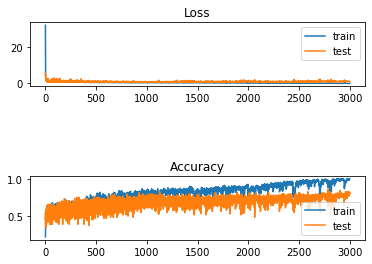

In [13]:
plt.subplot(311)
plt.title("Loss")
plt.plot(loss,label="train")
plt.plot(t_loss,label="test")
plt.legend()

plt.subplot(313)
plt.title("Accuracy")
plt.plot(acc,label="train")
plt.plot(t_acc,label="test")
plt.legend()
plt.show()

In [14]:
# saving model in SavedModel format
model.save(model_saving_path)
# converting SavedModel into tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(model_saving_path)
tflite_model = converter.convert()
with open('MuscleNET_Training_Quality_Detection.tflite', 'wb') as f:
      f.write(tflite_model)

INFO:tensorflow:Assets written to: MuscleNET_Models/DNN/MuscleNET_Training_Quality_Detection\assets


features shape  (213, 16)
labels shape  (213,)
Counter({0: 89, 1: 72, 2: 52})
Counter({2: 89, 1: 89, 0: 89})
one hot encoding labels shape  (267, 3)
training set feature shape  (186, 16)
training set label shape  (186, 3)
test set feature shape  (81, 16)
test set label shape  (81, 3)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 48)                816       
_________________________________________________________________
dense_16 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_17 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_18 (Dense)             (None, 12)                588       
_________________________________________________________________
dense_19 (Dense)             (Non

6/6 [==============================] - 0s 7ms/step - loss: 1.2893 - acc: 0.5699 - false_negatives_3: 86.0000 - false_positives_3: 72.0000 - true_negatives_3: 300.0000 - true_positives_3: 100.0000 - val_loss: 1.2387 - val_acc: 0.5679 - val_false_negatives_3: 36.0000 - val_false_positives_3: 33.0000 - val_true_negatives_3: 129.0000 - val_true_positives_3: 45.0000
Epoch 20/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.1187 - acc: 0.5806 - false_negatives_3: 85.0000 - false_positives_3: 72.0000 - true_negatives_3: 300.0000 - true_positives_3: 101.0000 - val_loss: 1.2208 - val_acc: 0.4938 - val_false_negatives_3: 45.0000 - val_false_positives_3: 28.0000 - val_true_negatives_3: 134.0000 - val_true_positives_3: 36.0000
Epoch 21/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.2028 - acc: 0.5591 - false_negatives_3: 91.0000 - false_positives_3: 73.0000 - true_negatives_3: 299.0000 - true_positives_3: 95.0000 - val_loss: 1.4436 - val_acc: 0.5309 - val_false_

Epoch 41/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.9605 - acc: 0.5806 - false_negatives_3: 90.0000 - false_positives_3: 60.0000 - true_negatives_3: 312.0000 - true_positives_3: 96.0000 - val_loss: 0.9175 - val_acc: 0.6296 - val_false_negatives_3: 31.0000 - val_false_positives_3: 29.0000 - val_true_negatives_3: 133.0000 - val_true_positives_3: 50.0000
Epoch 42/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.0363 - acc: 0.6344 - false_negatives_3: 70.0000 - false_positives_3: 62.0000 - true_negatives_3: 310.0000 - true_positives_3: 116.0000 - val_loss: 1.1710 - val_acc: 0.5432 - val_false_negatives_3: 42.0000 - val_false_positives_3: 27.0000 - val_true_negatives_3: 135.0000 - val_true_positives_3: 39.0000
Epoch 43/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.2556 - acc: 0.5161 - false_negatives_3: 97.0000 - false_positives_3: 73.0000 - true_negatives_3: 299.0000 - true_positives_3: 89.0000 - val_loss: 2.1409 - val_acc: 0.5062

Epoch 63/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8561 - acc: 0.6344 - false_negatives_3: 84.0000 - false_positives_3: 45.0000 - true_negatives_3: 327.0000 - true_positives_3: 102.0000 - val_loss: 0.9894 - val_acc: 0.5926 - val_false_negatives_3: 48.0000 - val_false_positives_3: 22.0000 - val_true_negatives_3: 140.0000 - val_true_positives_3: 33.0000
Epoch 64/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8446 - acc: 0.6398 - false_negatives_3: 76.0000 - false_positives_3: 55.0000 - true_negatives_3: 317.0000 - true_positives_3: 110.0000 - val_loss: 0.9395 - val_acc: 0.5926 - val_false_negatives_3: 39.0000 - val_false_positives_3: 28.0000 - val_true_negatives_3: 134.0000 - val_true_positives_3: 42.0000
Epoch 65/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8895 - acc: 0.6022 - false_negatives_3: 79.0000 - false_positives_3: 62.0000 - true_negatives_3: 310.0000 - true_positives_3: 107.0000 - val_loss: 1.0471 - val_acc: 0.58

Epoch 85/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.0493 - acc: 0.6183 - false_negatives_3: 75.0000 - false_positives_3: 64.0000 - true_negatives_3: 308.0000 - true_positives_3: 111.0000 - val_loss: 1.4350 - val_acc: 0.5679 - val_false_negatives_3: 40.0000 - val_false_positives_3: 28.0000 - val_true_negatives_3: 134.0000 - val_true_positives_3: 41.0000
Epoch 86/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.2977 - acc: 0.5269 - false_negatives_3: 91.0000 - false_positives_3: 75.0000 - true_negatives_3: 297.0000 - true_positives_3: 95.0000 - val_loss: 0.8648 - val_acc: 0.6543 - val_false_negatives_3: 28.0000 - val_false_positives_3: 27.0000 - val_true_negatives_3: 135.0000 - val_true_positives_3: 53.0000
Epoch 87/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.1095 - acc: 0.5806 - false_negatives_3: 90.0000 - false_positives_3: 70.0000 - true_negatives_3: 302.0000 - true_positives_3: 96.0000 - val_loss: 1.0403 - val_acc: 0.6173

Epoch 107/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.0772 - acc: 0.5699 - false_negatives_3: 96.0000 - false_positives_3: 60.0000 - true_negatives_3: 312.0000 - true_positives_3: 90.0000 - val_loss: 1.1770 - val_acc: 0.6049 - val_false_negatives_3: 43.0000 - val_false_positives_3: 26.0000 - val_true_negatives_3: 136.0000 - val_true_positives_3: 38.0000
Epoch 108/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.9211 - acc: 0.6290 - false_negatives_3: 78.0000 - false_positives_3: 54.0000 - true_negatives_3: 318.0000 - true_positives_3: 108.0000 - val_loss: 0.8914 - val_acc: 0.5926 - val_false_negatives_3: 33.0000 - val_false_positives_3: 29.0000 - val_true_negatives_3: 133.0000 - val_true_positives_3: 48.0000
Epoch 109/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.9176 - acc: 0.6237 - false_negatives_3: 76.0000 - false_positives_3: 67.0000 - true_negatives_3: 305.0000 - true_positives_3: 110.0000 - val_loss: 0.8732 - val_acc: 0.

Epoch 129/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7207 - acc: 0.6559 - false_negatives_3: 67.0000 - false_positives_3: 53.0000 - true_negatives_3: 319.0000 - true_positives_3: 119.0000 - val_loss: 0.9265 - val_acc: 0.5432 - val_false_negatives_3: 39.0000 - val_false_positives_3: 33.0000 - val_true_negatives_3: 129.0000 - val_true_positives_3: 42.0000
Epoch 130/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6739 - acc: 0.6935 - false_negatives_3: 75.0000 - false_positives_3: 43.0000 - true_negatives_3: 329.0000 - true_positives_3: 111.0000 - val_loss: 0.9424 - val_acc: 0.6296 - val_false_negatives_3: 33.0000 - val_false_positives_3: 28.0000 - val_true_negatives_3: 134.0000 - val_true_positives_3: 48.0000
Epoch 131/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7119 - acc: 0.7043 - false_negatives_3: 72.0000 - false_positives_3: 48.0000 - true_negatives_3: 324.0000 - true_positives_3: 114.0000 - val_loss: 1.4442 - val_acc: 0

Epoch 151/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7956 - acc: 0.6559 - false_negatives_3: 70.0000 - false_positives_3: 52.0000 - true_negatives_3: 320.0000 - true_positives_3: 116.0000 - val_loss: 1.7106 - val_acc: 0.3827 - val_false_negatives_3: 50.0000 - val_false_positives_3: 47.0000 - val_true_negatives_3: 115.0000 - val_true_positives_3: 31.0000
Epoch 152/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.1335 - acc: 0.5591 - false_negatives_3: 87.0000 - false_positives_3: 76.0000 - true_negatives_3: 296.0000 - true_positives_3: 99.0000 - val_loss: 0.8383 - val_acc: 0.6296 - val_false_negatives_3: 31.0000 - val_false_positives_3: 28.0000 - val_true_negatives_3: 134.0000 - val_true_positives_3: 50.0000
Epoch 153/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8936 - acc: 0.6237 - false_negatives_3: 78.0000 - false_positives_3: 63.0000 - true_negatives_3: 309.0000 - true_positives_3: 108.0000 - val_loss: 1.5850 - val_acc: 0.

Epoch 173/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7355 - acc: 0.6452 - false_negatives_3: 71.0000 - false_positives_3: 55.0000 - true_negatives_3: 317.0000 - true_positives_3: 115.0000 - val_loss: 0.9407 - val_acc: 0.6420 - val_false_negatives_3: 35.0000 - val_false_positives_3: 22.0000 - val_true_negatives_3: 140.0000 - val_true_positives_3: 46.0000
Epoch 174/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7114 - acc: 0.6613 - false_negatives_3: 77.0000 - false_positives_3: 51.0000 - true_negatives_3: 321.0000 - true_positives_3: 109.0000 - val_loss: 0.7595 - val_acc: 0.7037 - val_false_negatives_3: 25.0000 - val_false_positives_3: 22.0000 - val_true_negatives_3: 140.0000 - val_true_positives_3: 56.0000
Epoch 175/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6379 - acc: 0.6882 - false_negatives_3: 65.0000 - false_positives_3: 46.0000 - true_negatives_3: 326.0000 - true_positives_3: 121.0000 - val_loss: 0.8758 - val_acc: 0

Epoch 195/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6949 - acc: 0.6774 - false_negatives_3: 70.0000 - false_positives_3: 49.0000 - true_negatives_3: 323.0000 - true_positives_3: 116.0000 - val_loss: 1.1512 - val_acc: 0.4321 - val_false_negatives_3: 48.0000 - val_false_positives_3: 38.0000 - val_true_negatives_3: 124.0000 - val_true_positives_3: 33.0000
Epoch 196/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6555 - acc: 0.7097 - false_negatives_3: 60.0000 - false_positives_3: 49.0000 - true_negatives_3: 323.0000 - true_positives_3: 126.0000 - val_loss: 0.7310 - val_acc: 0.7037 - val_false_negatives_3: 25.0000 - val_false_positives_3: 22.0000 - val_true_negatives_3: 140.0000 - val_true_positives_3: 56.0000
Epoch 197/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7208 - acc: 0.6613 - false_negatives_3: 78.0000 - false_positives_3: 56.0000 - true_negatives_3: 316.0000 - true_positives_3: 108.0000 - val_loss: 0.8652 - val_acc: 0

Epoch 217/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7925 - acc: 0.6667 - false_negatives_3: 66.0000 - false_positives_3: 53.0000 - true_negatives_3: 319.0000 - true_positives_3: 120.0000 - val_loss: 1.1005 - val_acc: 0.6296 - val_false_negatives_3: 38.0000 - val_false_positives_3: 27.0000 - val_true_negatives_3: 135.0000 - val_true_positives_3: 43.0000
Epoch 218/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8358 - acc: 0.6452 - false_negatives_3: 76.0000 - false_positives_3: 54.0000 - true_negatives_3: 318.0000 - true_positives_3: 110.0000 - val_loss: 0.8253 - val_acc: 0.6667 - val_false_negatives_3: 29.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 137.0000 - val_true_positives_3: 52.0000
Epoch 219/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6723 - acc: 0.6935 - false_negatives_3: 63.0000 - false_positives_3: 51.0000 - true_negatives_3: 321.0000 - true_positives_3: 123.0000 - val_loss: 0.7819 - val_acc: 0

Epoch 239/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6263 - acc: 0.7043 - false_negatives_3: 63.0000 - false_positives_3: 47.0000 - true_negatives_3: 325.0000 - true_positives_3: 123.0000 - val_loss: 0.7618 - val_acc: 0.6914 - val_false_negatives_3: 33.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 48.0000
Epoch 240/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5922 - acc: 0.7204 - false_negatives_3: 59.0000 - false_positives_3: 44.0000 - true_negatives_3: 328.0000 - true_positives_3: 127.0000 - val_loss: 0.7355 - val_acc: 0.6667 - val_false_negatives_3: 29.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 52.0000
Epoch 241/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6459 - acc: 0.7312 - false_negatives_3: 54.0000 - false_positives_3: 44.0000 - true_negatives_3: 328.0000 - true_positives_3: 132.0000 - val_loss: 0.7203 - val_acc: 0

Epoch 261/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.9565 - acc: 0.6613 - false_negatives_3: 69.0000 - false_positives_3: 61.0000 - true_negatives_3: 311.0000 - true_positives_3: 117.0000 - val_loss: 1.0267 - val_acc: 0.6049 - val_false_negatives_3: 36.0000 - val_false_positives_3: 28.0000 - val_true_negatives_3: 134.0000 - val_true_positives_3: 45.0000
Epoch 262/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7984 - acc: 0.6183 - false_negatives_3: 77.0000 - false_positives_3: 60.0000 - true_negatives_3: 312.0000 - true_positives_3: 109.0000 - val_loss: 1.0092 - val_acc: 0.6914 - val_false_negatives_3: 27.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 54.0000
Epoch 263/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8889 - acc: 0.6720 - false_negatives_3: 64.0000 - false_positives_3: 57.0000 - true_negatives_3: 315.0000 - true_positives_3: 122.0000 - val_loss: 0.9727 - val_acc: 0

Epoch 283/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.1641 - acc: 0.5968 - false_negatives_3: 82.0000 - false_positives_3: 69.0000 - true_negatives_3: 303.0000 - true_positives_3: 104.0000 - val_loss: 0.9783 - val_acc: 0.6173 - val_false_negatives_3: 34.0000 - val_false_positives_3: 29.0000 - val_true_negatives_3: 133.0000 - val_true_positives_3: 47.0000
Epoch 284/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.3900 - acc: 0.5753 - false_negatives_3: 81.0000 - false_positives_3: 79.0000 - true_negatives_3: 293.0000 - true_positives_3: 105.0000 - val_loss: 0.8135 - val_acc: 0.6543 - val_false_negatives_3: 28.0000 - val_false_positives_3: 27.0000 - val_true_negatives_3: 135.0000 - val_true_positives_3: 53.0000
Epoch 285/4000
6/6 [==============================] - 0s 6ms/step - loss: 1.0371 - acc: 0.6344 - false_negatives_3: 79.0000 - false_positives_3: 57.0000 - true_negatives_3: 315.0000 - true_positives_3: 107.0000 - val_loss: 1.6862 - val_acc: 0

Epoch 305/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5359 - acc: 0.7634 - false_negatives_3: 52.0000 - false_positives_3: 38.0000 - true_negatives_3: 334.0000 - true_positives_3: 134.0000 - val_loss: 0.8336 - val_acc: 0.6296 - val_false_negatives_3: 33.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 137.0000 - val_true_positives_3: 48.0000
Epoch 306/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5519 - acc: 0.7527 - false_negatives_3: 50.0000 - false_positives_3: 41.0000 - true_negatives_3: 331.0000 - true_positives_3: 136.0000 - val_loss: 0.7072 - val_acc: 0.7407 - val_false_negatives_3: 24.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 57.0000
Epoch 307/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5431 - acc: 0.7473 - false_negatives_3: 62.0000 - false_positives_3: 33.0000 - true_negatives_3: 339.0000 - true_positives_3: 124.0000 - val_loss: 0.7531 - val_acc: 0

Epoch 327/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7955 - acc: 0.6667 - false_negatives_3: 65.0000 - false_positives_3: 56.0000 - true_negatives_3: 316.0000 - true_positives_3: 121.0000 - val_loss: 0.7314 - val_acc: 0.6914 - val_false_negatives_3: 27.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 54.0000
Epoch 328/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6411 - acc: 0.6882 - false_negatives_3: 64.0000 - false_positives_3: 54.0000 - true_negatives_3: 318.0000 - true_positives_3: 122.0000 - val_loss: 0.7225 - val_acc: 0.7284 - val_false_negatives_3: 28.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 53.0000
Epoch 329/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7268 - acc: 0.6774 - false_negatives_3: 64.0000 - false_positives_3: 55.0000 - true_negatives_3: 317.0000 - true_positives_3: 122.0000 - val_loss: 0.9105 - val_acc: 0

Epoch 349/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5518 - acc: 0.7419 - false_negatives_3: 56.0000 - false_positives_3: 41.0000 - true_negatives_3: 331.0000 - true_positives_3: 130.0000 - val_loss: 0.6896 - val_acc: 0.7407 - val_false_negatives_3: 21.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 60.0000
Epoch 350/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6348 - acc: 0.7097 - false_negatives_3: 58.0000 - false_positives_3: 51.0000 - true_negatives_3: 321.0000 - true_positives_3: 128.0000 - val_loss: 1.0634 - val_acc: 0.5679 - val_false_negatives_3: 38.0000 - val_false_positives_3: 32.0000 - val_true_negatives_3: 130.0000 - val_true_positives_3: 43.0000
Epoch 351/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8316 - acc: 0.6613 - false_negatives_3: 73.0000 - false_positives_3: 49.0000 - true_negatives_3: 323.0000 - true_positives_3: 113.0000 - val_loss: 1.7628 - val_acc: 0

Epoch 371/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5448 - acc: 0.7796 - false_negatives_3: 49.0000 - false_positives_3: 39.0000 - true_negatives_3: 333.0000 - true_positives_3: 137.0000 - val_loss: 0.7102 - val_acc: 0.6790 - val_false_negatives_3: 30.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 51.0000
Epoch 372/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5265 - acc: 0.7634 - false_negatives_3: 53.0000 - false_positives_3: 38.0000 - true_negatives_3: 334.0000 - true_positives_3: 133.0000 - val_loss: 0.7097 - val_acc: 0.7407 - val_false_negatives_3: 32.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 49.0000
Epoch 373/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5182 - acc: 0.7903 - false_negatives_3: 44.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 142.0000 - val_loss: 0.7118 - val_acc: 0

Epoch 393/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5796 - acc: 0.7204 - false_negatives_3: 62.0000 - false_positives_3: 42.0000 - true_negatives_3: 330.0000 - true_positives_3: 124.0000 - val_loss: 0.7872 - val_acc: 0.6543 - val_false_negatives_3: 31.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 137.0000 - val_true_positives_3: 50.0000
Epoch 394/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5700 - acc: 0.7581 - false_negatives_3: 49.0000 - false_positives_3: 43.0000 - true_negatives_3: 329.0000 - true_positives_3: 137.0000 - val_loss: 0.6986 - val_acc: 0.7407 - val_false_negatives_3: 24.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 57.0000
Epoch 395/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5889 - acc: 0.7634 - false_negatives_3: 54.0000 - false_positives_3: 42.0000 - true_negatives_3: 330.0000 - true_positives_3: 132.0000 - val_loss: 0.7029 - val_acc: 0

Epoch 415/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5387 - acc: 0.8065 - false_negatives_3: 45.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 141.0000 - val_loss: 0.7806 - val_acc: 0.6790 - val_false_negatives_3: 30.0000 - val_false_positives_3: 22.0000 - val_true_negatives_3: 140.0000 - val_true_positives_3: 51.0000
Epoch 416/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6043 - acc: 0.7204 - false_negatives_3: 62.0000 - false_positives_3: 47.0000 - true_negatives_3: 325.0000 - true_positives_3: 124.0000 - val_loss: 0.8707 - val_acc: 0.6420 - val_false_negatives_3: 30.0000 - val_false_positives_3: 26.0000 - val_true_negatives_3: 136.0000 - val_true_positives_3: 51.0000
Epoch 417/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8015 - acc: 0.6774 - false_negatives_3: 61.0000 - false_positives_3: 58.0000 - true_negatives_3: 314.0000 - true_positives_3: 125.0000 - val_loss: 1.6585 - val_acc: 0

6/6 [==============================] - 0s 6ms/step - loss: 0.5679 - acc: 0.7366 - false_negatives_3: 57.0000 - false_positives_3: 47.0000 - true_negatives_3: 325.0000 - true_positives_3: 129.0000 - val_loss: 0.7650 - val_acc: 0.7160 - val_false_negatives_3: 25.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 56.0000
Epoch 437/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5393 - acc: 0.7419 - false_negatives_3: 49.0000 - false_positives_3: 44.0000 - true_negatives_3: 328.0000 - true_positives_3: 137.0000 - val_loss: 0.6767 - val_acc: 0.7037 - val_false_negatives_3: 25.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 56.0000
Epoch 438/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4958 - acc: 0.7796 - false_negatives_3: 42.0000 - false_positives_3: 39.0000 - true_negatives_3: 333.0000 - true_positives_3: 144.0000 - val_loss: 0.6646 - val_acc: 0.7407 - val_fal

Epoch 458/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6122 - acc: 0.7634 - false_negatives_3: 47.0000 - false_positives_3: 42.0000 - true_negatives_3: 330.0000 - true_positives_3: 139.0000 - val_loss: 0.7588 - val_acc: 0.7284 - val_false_negatives_3: 24.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 57.0000
Epoch 459/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6516 - acc: 0.7097 - false_negatives_3: 55.0000 - false_positives_3: 46.0000 - true_negatives_3: 326.0000 - true_positives_3: 131.0000 - val_loss: 0.7381 - val_acc: 0.6667 - val_false_negatives_3: 32.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 49.0000
Epoch 460/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6118 - acc: 0.7312 - false_negatives_3: 56.0000 - false_positives_3: 43.0000 - true_negatives_3: 329.0000 - true_positives_3: 130.0000 - val_loss: 1.0929 - val_acc: 0

Epoch 480/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7210 - acc: 0.7151 - false_negatives_3: 54.0000 - false_positives_3: 50.0000 - true_negatives_3: 322.0000 - true_positives_3: 132.0000 - val_loss: 0.9562 - val_acc: 0.6790 - val_false_negatives_3: 29.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 137.0000 - val_true_positives_3: 52.0000
Epoch 481/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7263 - acc: 0.6935 - false_negatives_3: 64.0000 - false_positives_3: 48.0000 - true_negatives_3: 324.0000 - true_positives_3: 122.0000 - val_loss: 0.7099 - val_acc: 0.7531 - val_false_negatives_3: 23.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 58.0000
Epoch 482/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5212 - acc: 0.7903 - false_negatives_3: 44.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 142.0000 - val_loss: 0.7426 - val_acc: 0

Epoch 502/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4716 - acc: 0.7957 - false_negatives_3: 48.0000 - false_positives_3: 28.0000 - true_negatives_3: 344.0000 - true_positives_3: 138.0000 - val_loss: 0.6756 - val_acc: 0.7654 - val_false_negatives_3: 23.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 58.0000
Epoch 503/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4592 - acc: 0.8065 - false_negatives_3: 39.0000 - false_positives_3: 31.0000 - true_negatives_3: 341.0000 - true_positives_3: 147.0000 - val_loss: 0.6647 - val_acc: 0.7407 - val_false_negatives_3: 21.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 60.0000
Epoch 504/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5152 - acc: 0.7634 - false_negatives_3: 50.0000 - false_positives_3: 41.0000 - true_negatives_3: 331.0000 - true_positives_3: 136.0000 - val_loss: 0.6935 - val_acc: 0

Epoch 524/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4874 - acc: 0.7849 - false_negatives_3: 47.0000 - false_positives_3: 34.0000 - true_negatives_3: 338.0000 - true_positives_3: 139.0000 - val_loss: 0.6460 - val_acc: 0.7778 - val_false_negatives_3: 20.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 61.0000
Epoch 525/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4724 - acc: 0.8011 - false_negatives_3: 38.0000 - false_positives_3: 34.0000 - true_negatives_3: 338.0000 - true_positives_3: 148.0000 - val_loss: 0.7168 - val_acc: 0.7407 - val_false_negatives_3: 23.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 58.0000
Epoch 526/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4502 - acc: 0.8118 - false_negatives_3: 40.0000 - false_positives_3: 32.0000 - true_negatives_3: 340.0000 - true_positives_3: 146.0000 - val_loss: 0.7005 - val_acc: 0

Epoch 546/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5334 - acc: 0.7473 - false_negatives_3: 51.0000 - false_positives_3: 40.0000 - true_negatives_3: 332.0000 - true_positives_3: 135.0000 - val_loss: 0.6803 - val_acc: 0.7654 - val_false_negatives_3: 22.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 59.0000
Epoch 547/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5272 - acc: 0.7849 - false_negatives_3: 43.0000 - false_positives_3: 39.0000 - true_negatives_3: 333.0000 - true_positives_3: 143.0000 - val_loss: 0.7414 - val_acc: 0.7407 - val_false_negatives_3: 24.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 57.0000
Epoch 548/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5840 - acc: 0.7419 - false_negatives_3: 55.0000 - false_positives_3: 39.0000 - true_negatives_3: 333.0000 - true_positives_3: 131.0000 - val_loss: 1.1283 - val_acc: 0

Epoch 568/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5020 - acc: 0.7688 - false_negatives_3: 44.0000 - false_positives_3: 38.0000 - true_negatives_3: 334.0000 - true_positives_3: 142.0000 - val_loss: 0.8263 - val_acc: 0.6420 - val_false_negatives_3: 37.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 44.0000
Epoch 569/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5089 - acc: 0.7312 - false_negatives_3: 55.0000 - false_positives_3: 40.0000 - true_negatives_3: 332.0000 - true_positives_3: 131.0000 - val_loss: 0.8013 - val_acc: 0.6543 - val_false_negatives_3: 30.0000 - val_false_positives_3: 26.0000 - val_true_negatives_3: 136.0000 - val_true_positives_3: 51.0000
Epoch 570/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6381 - acc: 0.7527 - false_negatives_3: 47.0000 - false_positives_3: 45.0000 - true_negatives_3: 327.0000 - true_positives_3: 139.0000 - val_loss: 0.7021 - val_acc: 0

Epoch 589/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6566 - acc: 0.7043 - false_negatives_3: 56.0000 - false_positives_3: 52.0000 - true_negatives_3: 320.0000 - true_positives_3: 130.0000 - val_loss: 0.6528 - val_acc: 0.7284 - val_false_negatives_3: 25.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 56.0000
Epoch 590/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7164 - acc: 0.6882 - false_negatives_3: 60.0000 - false_positives_3: 50.0000 - true_negatives_3: 322.0000 - true_positives_3: 126.0000 - val_loss: 0.6652 - val_acc: 0.7037 - val_false_negatives_3: 27.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 54.0000
Epoch 591/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.8229 - acc: 0.6613 - false_negatives_3: 66.0000 - false_positives_3: 57.0000 - true_negatives_3: 315.0000 - true_positives_3: 120.0000 - val_loss: 0.9980 - val_acc: 0

Epoch 611/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5171 - acc: 0.7796 - false_negatives_3: 49.0000 - false_positives_3: 39.0000 - true_negatives_3: 333.0000 - true_positives_3: 137.0000 - val_loss: 0.6853 - val_acc: 0.7654 - val_false_negatives_3: 25.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 56.0000
Epoch 612/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4756 - acc: 0.8118 - false_negatives_3: 44.0000 - false_positives_3: 34.0000 - true_negatives_3: 338.0000 - true_positives_3: 142.0000 - val_loss: 0.7913 - val_acc: 0.6790 - val_false_negatives_3: 28.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 53.0000
Epoch 613/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5724 - acc: 0.7366 - false_negatives_3: 56.0000 - false_positives_3: 48.0000 - true_negatives_3: 324.0000 - true_positives_3: 130.0000 - val_loss: 0.6763 - val_acc: 0

6/6 [==============================] - 0s 6ms/step - loss: 0.5600 - acc: 0.7419 - false_negatives_3: 50.0000 - false_positives_3: 47.0000 - true_negatives_3: 325.0000 - true_positives_3: 136.0000 - val_loss: 0.7254 - val_acc: 0.7654 - val_false_negatives_3: 20.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 61.0000
Epoch 633/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6548 - acc: 0.7312 - false_negatives_3: 52.0000 - false_positives_3: 48.0000 - true_negatives_3: 324.0000 - true_positives_3: 134.0000 - val_loss: 1.3443 - val_acc: 0.5309 - val_false_negatives_3: 40.0000 - val_false_positives_3: 37.0000 - val_true_negatives_3: 125.0000 - val_true_positives_3: 41.0000
Epoch 634/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6030 - acc: 0.7581 - false_negatives_3: 47.0000 - false_positives_3: 43.0000 - true_negatives_3: 329.0000 - true_positives_3: 139.0000 - val_loss: 0.7375 - val_acc: 0.7654 - val_fal

Epoch 654/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4380 - acc: 0.8226 - false_negatives_3: 39.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 147.0000 - val_loss: 0.7745 - val_acc: 0.7284 - val_false_negatives_3: 25.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 56.0000
Epoch 655/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5108 - acc: 0.7634 - false_negatives_3: 49.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 137.0000 - val_loss: 0.7198 - val_acc: 0.7407 - val_false_negatives_3: 21.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 60.0000
Epoch 656/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5395 - acc: 0.7634 - false_negatives_3: 46.0000 - false_positives_3: 44.0000 - true_negatives_3: 328.0000 - true_positives_3: 140.0000 - val_loss: 0.6534 - val_acc: 0

Epoch 676/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4774 - acc: 0.7957 - false_negatives_3: 46.0000 - false_positives_3: 29.0000 - true_negatives_3: 343.0000 - true_positives_3: 140.0000 - val_loss: 0.7385 - val_acc: 0.7284 - val_false_negatives_3: 22.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 59.0000
Epoch 677/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4614 - acc: 0.8172 - false_negatives_3: 36.0000 - false_positives_3: 34.0000 - true_negatives_3: 338.0000 - true_positives_3: 150.0000 - val_loss: 0.7512 - val_acc: 0.6914 - val_false_negatives_3: 26.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 55.0000
Epoch 678/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4455 - acc: 0.7957 - false_negatives_3: 39.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 147.0000 - val_loss: 0.9461 - val_acc: 0

Epoch 698/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4423 - acc: 0.7796 - false_negatives_3: 46.0000 - false_positives_3: 34.0000 - true_negatives_3: 338.0000 - true_positives_3: 140.0000 - val_loss: 0.6198 - val_acc: 0.7531 - val_false_negatives_3: 23.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 58.0000
Epoch 699/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4213 - acc: 0.8118 - false_negatives_3: 41.0000 - false_positives_3: 33.0000 - true_negatives_3: 339.0000 - true_positives_3: 145.0000 - val_loss: 0.6764 - val_acc: 0.7654 - val_false_negatives_3: 23.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 58.0000
Epoch 700/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4012 - acc: 0.8387 - false_negatives_3: 32.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 154.0000 - val_loss: 0.6643 - val_acc: 0

Epoch 720/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4781 - acc: 0.8172 - false_negatives_3: 46.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 140.0000 - val_loss: 0.6827 - val_acc: 0.7407 - val_false_negatives_3: 22.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 59.0000
Epoch 721/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.5639 - acc: 0.7473 - false_negatives_3: 51.0000 - false_positives_3: 41.0000 - true_negatives_3: 331.0000 - true_positives_3: 135.0000 - val_loss: 0.6672 - val_acc: 0.7284 - val_false_negatives_3: 23.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 58.0000
Epoch 722/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4853 - acc: 0.7957 - false_negatives_3: 39.0000 - false_positives_3: 33.0000 - true_negatives_3: 339.0000 - true_positives_3: 147.0000 - val_loss: 0.7349 - val_acc: 0

Epoch 742/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4769 - acc: 0.7796 - false_negatives_3: 46.0000 - false_positives_3: 37.0000 - true_negatives_3: 335.0000 - true_positives_3: 140.0000 - val_loss: 0.6761 - val_acc: 0.7654 - val_false_negatives_3: 24.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 57.0000
Epoch 743/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4870 - acc: 0.7796 - false_negatives_3: 48.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 138.0000 - val_loss: 0.7055 - val_acc: 0.7284 - val_false_negatives_3: 25.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 56.0000
Epoch 744/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5009 - acc: 0.7957 - false_negatives_3: 41.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 145.0000 - val_loss: 0.8162 - val_acc: 0

Epoch 764/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4637 - acc: 0.8172 - false_negatives_3: 35.0000 - false_positives_3: 33.0000 - true_negatives_3: 339.0000 - true_positives_3: 151.0000 - val_loss: 0.7026 - val_acc: 0.7531 - val_false_negatives_3: 23.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 58.0000
Epoch 765/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.5026 - acc: 0.7419 - false_negatives_3: 49.0000 - false_positives_3: 43.0000 - true_negatives_3: 329.0000 - true_positives_3: 137.0000 - val_loss: 0.6677 - val_acc: 0.7407 - val_false_negatives_3: 23.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 58.0000
Epoch 766/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4667 - acc: 0.7903 - false_negatives_3: 44.0000 - false_positives_3: 34.0000 - true_negatives_3: 338.0000 - true_positives_3: 142.0000 - val_loss: 0.8981 - val_acc: 0

Epoch 786/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4498 - acc: 0.8011 - false_negatives_3: 40.0000 - false_positives_3: 32.0000 - true_negatives_3: 340.0000 - true_positives_3: 146.0000 - val_loss: 0.8133 - val_acc: 0.7037 - val_false_negatives_3: 29.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 52.0000
Epoch 787/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4347 - acc: 0.8333 - false_negatives_3: 33.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 153.0000 - val_loss: 0.7114 - val_acc: 0.7531 - val_false_negatives_3: 22.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 59.0000
Epoch 788/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4349 - acc: 0.8172 - false_negatives_3: 37.0000 - false_positives_3: 33.0000 - true_negatives_3: 339.0000 - true_positives_3: 149.0000 - val_loss: 0.7612 - val_acc: 0

Epoch 808/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.7365 - acc: 0.6935 - false_negatives_3: 60.0000 - false_positives_3: 53.0000 - true_negatives_3: 319.0000 - true_positives_3: 126.0000 - val_loss: 1.4785 - val_acc: 0.5556 - val_false_negatives_3: 37.0000 - val_false_positives_3: 34.0000 - val_true_negatives_3: 128.0000 - val_true_positives_3: 44.0000
Epoch 809/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.8105 - acc: 0.6505 - false_negatives_3: 66.0000 - false_positives_3: 62.0000 - true_negatives_3: 310.0000 - true_positives_3: 120.0000 - val_loss: 0.7013 - val_acc: 0.7160 - val_false_negatives_3: 25.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 56.0000
Epoch 810/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.6314 - acc: 0.7204 - false_negatives_3: 53.0000 - false_positives_3: 45.0000 - true_negatives_3: 327.0000 - true_positives_3: 133.0000 - val_loss: 0.9792 - val_acc: 0

Epoch 830/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6675 - acc: 0.7258 - false_negatives_3: 52.0000 - false_positives_3: 50.0000 - true_negatives_3: 322.0000 - true_positives_3: 134.0000 - val_loss: 0.7689 - val_acc: 0.6790 - val_false_negatives_3: 26.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 55.0000
Epoch 831/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4832 - acc: 0.7903 - false_negatives_3: 47.0000 - false_positives_3: 31.0000 - true_negatives_3: 341.0000 - true_positives_3: 139.0000 - val_loss: 0.7575 - val_acc: 0.7037 - val_false_negatives_3: 26.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 55.0000
Epoch 832/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4464 - acc: 0.7796 - false_negatives_3: 44.0000 - false_positives_3: 32.0000 - true_negatives_3: 340.0000 - true_positives_3: 142.0000 - val_loss: 0.6533 - val_acc: 0

Epoch 852/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4509 - acc: 0.8011 - false_negatives_3: 39.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 147.0000 - val_loss: 0.7272 - val_acc: 0.7160 - val_false_negatives_3: 25.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 56.0000
Epoch 853/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5088 - acc: 0.7527 - false_negatives_3: 47.0000 - false_positives_3: 43.0000 - true_negatives_3: 329.0000 - true_positives_3: 139.0000 - val_loss: 1.0434 - val_acc: 0.6173 - val_false_negatives_3: 32.0000 - val_false_positives_3: 30.0000 - val_true_negatives_3: 132.0000 - val_true_positives_3: 49.0000
Epoch 854/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5247 - acc: 0.7796 - false_negatives_3: 42.0000 - false_positives_3: 39.0000 - true_negatives_3: 333.0000 - true_positives_3: 144.0000 - val_loss: 0.8427 - val_acc: 0

Epoch 874/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4370 - acc: 0.8280 - false_negatives_3: 36.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 150.0000 - val_loss: 0.9259 - val_acc: 0.5802 - val_false_negatives_3: 36.0000 - val_false_positives_3: 29.0000 - val_true_negatives_3: 133.0000 - val_true_positives_3: 45.0000
Epoch 875/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4730 - acc: 0.8065 - false_negatives_3: 38.0000 - false_positives_3: 33.0000 - true_negatives_3: 339.0000 - true_positives_3: 148.0000 - val_loss: 0.7040 - val_acc: 0.7284 - val_false_negatives_3: 25.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 56.0000
Epoch 876/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4181 - acc: 0.8226 - false_negatives_3: 39.0000 - false_positives_3: 28.0000 - true_negatives_3: 344.0000 - true_positives_3: 147.0000 - val_loss: 0.6903 - val_acc: 0

Epoch 896/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5042 - acc: 0.7634 - false_negatives_3: 46.0000 - false_positives_3: 44.0000 - true_negatives_3: 328.0000 - true_positives_3: 140.0000 - val_loss: 1.1335 - val_acc: 0.5309 - val_false_negatives_3: 39.0000 - val_false_positives_3: 35.0000 - val_true_negatives_3: 127.0000 - val_true_positives_3: 42.0000
Epoch 897/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6346 - acc: 0.7204 - false_negatives_3: 55.0000 - false_positives_3: 49.0000 - true_negatives_3: 323.0000 - true_positives_3: 131.0000 - val_loss: 0.8077 - val_acc: 0.6049 - val_false_negatives_3: 33.0000 - val_false_positives_3: 24.0000 - val_true_negatives_3: 138.0000 - val_true_positives_3: 48.0000
Epoch 898/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5848 - acc: 0.6828 - false_negatives_3: 61.0000 - false_positives_3: 53.0000 - true_negatives_3: 319.0000 - true_positives_3: 125.0000 - val_loss: 0.6731 - val_acc: 0

Epoch 918/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4007 - acc: 0.8441 - false_negatives_3: 31.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 155.0000 - val_loss: 0.7745 - val_acc: 0.7531 - val_false_negatives_3: 21.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 60.0000
Epoch 919/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4755 - acc: 0.7742 - false_negatives_3: 43.0000 - false_positives_3: 41.0000 - true_negatives_3: 331.0000 - true_positives_3: 143.0000 - val_loss: 0.7541 - val_acc: 0.7160 - val_false_negatives_3: 25.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 56.0000
Epoch 920/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4025 - acc: 0.8280 - false_negatives_3: 36.0000 - false_positives_3: 29.0000 - true_negatives_3: 343.0000 - true_positives_3: 150.0000 - val_loss: 0.8648 - val_acc: 0

Epoch 940/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4190 - acc: 0.8172 - false_negatives_3: 37.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 149.0000 - val_loss: 0.7413 - val_acc: 0.7160 - val_false_negatives_3: 26.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 55.0000
Epoch 941/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4685 - acc: 0.7742 - false_negatives_3: 42.0000 - false_positives_3: 37.0000 - true_negatives_3: 335.0000 - true_positives_3: 144.0000 - val_loss: 0.7586 - val_acc: 0.7531 - val_false_negatives_3: 24.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 57.0000
Epoch 942/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4114 - acc: 0.8226 - false_negatives_3: 35.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 151.0000 - val_loss: 0.8863 - val_acc: 0

Epoch 962/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7011 - acc: 0.6667 - false_negatives_3: 66.0000 - false_positives_3: 54.0000 - true_negatives_3: 318.0000 - true_positives_3: 120.0000 - val_loss: 0.9835 - val_acc: 0.5432 - val_false_negatives_3: 38.0000 - val_false_positives_3: 30.0000 - val_true_negatives_3: 132.0000 - val_true_positives_3: 43.0000
Epoch 963/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5381 - acc: 0.7366 - false_negatives_3: 50.0000 - false_positives_3: 45.0000 - true_negatives_3: 327.0000 - true_positives_3: 136.0000 - val_loss: 0.6908 - val_acc: 0.7284 - val_false_negatives_3: 24.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 57.0000
Epoch 964/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4686 - acc: 0.7849 - false_negatives_3: 42.0000 - false_positives_3: 38.0000 - true_negatives_3: 334.0000 - true_positives_3: 144.0000 - val_loss: 0.7061 - val_acc: 0

Epoch 984/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4275 - acc: 0.8065 - false_negatives_3: 39.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 147.0000 - val_loss: 0.8247 - val_acc: 0.7531 - val_false_negatives_3: 23.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 58.0000
Epoch 985/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3719 - acc: 0.8602 - false_negatives_3: 29.0000 - false_positives_3: 23.0000 - true_negatives_3: 349.0000 - true_positives_3: 157.0000 - val_loss: 0.7497 - val_acc: 0.7407 - val_false_negatives_3: 23.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 58.0000
Epoch 986/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3985 - acc: 0.8387 - false_negatives_3: 32.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 154.0000 - val_loss: 0.7530 - val_acc: 0

Epoch 1006/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5596 - acc: 0.7366 - false_negatives_3: 49.0000 - false_positives_3: 46.0000 - true_negatives_3: 326.0000 - true_positives_3: 137.0000 - val_loss: 1.2070 - val_acc: 0.5926 - val_false_negatives_3: 34.0000 - val_false_positives_3: 33.0000 - val_true_negatives_3: 129.0000 - val_true_positives_3: 47.0000
Epoch 1007/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5334 - acc: 0.7151 - false_negatives_3: 54.0000 - false_positives_3: 48.0000 - true_negatives_3: 324.0000 - true_positives_3: 132.0000 - val_loss: 0.9462 - val_acc: 0.5802 - val_false_negatives_3: 38.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 137.0000 - val_true_positives_3: 43.0000
Epoch 1008/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4923 - acc: 0.7527 - false_negatives_3: 50.0000 - false_positives_3: 41.0000 - true_negatives_3: 331.0000 - true_positives_3: 136.0000 - val_loss: 0.7452 - val_acc

Epoch 1028/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5543 - acc: 0.7581 - false_negatives_3: 49.0000 - false_positives_3: 42.0000 - true_negatives_3: 330.0000 - true_positives_3: 137.0000 - val_loss: 1.0993 - val_acc: 0.5679 - val_false_negatives_3: 35.0000 - val_false_positives_3: 35.0000 - val_true_negatives_3: 127.0000 - val_true_positives_3: 46.0000
Epoch 1029/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5787 - acc: 0.7957 - false_negatives_3: 40.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 146.0000 - val_loss: 0.7515 - val_acc: 0.7160 - val_false_negatives_3: 25.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 56.0000
Epoch 1030/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5308 - acc: 0.7634 - false_negatives_3: 46.0000 - false_positives_3: 44.0000 - true_negatives_3: 328.0000 - true_positives_3: 140.0000 - val_loss: 1.1950 - val_acc

Epoch 1050/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.3866 - acc: 0.8226 - false_negatives_3: 36.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 150.0000 - val_loss: 0.7311 - val_acc: 0.6790 - val_false_negatives_3: 26.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 55.0000
Epoch 1051/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3829 - acc: 0.8172 - false_negatives_3: 34.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 152.0000 - val_loss: 0.8113 - val_acc: 0.7654 - val_false_negatives_3: 21.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 60.0000
Epoch 1052/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4167 - acc: 0.8387 - false_negatives_3: 32.0000 - false_positives_3: 29.0000 - true_negatives_3: 343.0000 - true_positives_3: 154.0000 - val_loss: 0.8346 - val_acc

Epoch 1072/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4018 - acc: 0.8441 - false_negatives_3: 32.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 154.0000 - val_loss: 0.6994 - val_acc: 0.7654 - val_false_negatives_3: 21.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 60.0000
Epoch 1073/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3958 - acc: 0.8333 - false_negatives_3: 35.0000 - false_positives_3: 31.0000 - true_negatives_3: 341.0000 - true_positives_3: 151.0000 - val_loss: 0.7063 - val_acc: 0.7407 - val_false_negatives_3: 21.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 60.0000
Epoch 1074/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3618 - acc: 0.8548 - false_negatives_3: 28.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 158.0000 - val_loss: 0.7616 - val_acc

Epoch 1094/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4243 - acc: 0.8065 - false_negatives_3: 38.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 148.0000 - val_loss: 0.6863 - val_acc: 0.6914 - val_false_negatives_3: 25.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 56.0000
Epoch 1095/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3614 - acc: 0.8548 - false_negatives_3: 29.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 157.0000 - val_loss: 0.7008 - val_acc: 0.7037 - val_false_negatives_3: 25.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 56.0000
Epoch 1096/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3580 - acc: 0.8656 - false_negatives_3: 28.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 158.0000 - val_loss: 0.7254 - val_acc

Epoch 1116/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3770 - acc: 0.8548 - false_negatives_3: 31.0000 - false_positives_3: 24.0000 - true_negatives_3: 348.0000 - true_positives_3: 155.0000 - val_loss: 0.8427 - val_acc: 0.6914 - val_false_negatives_3: 30.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 51.0000
Epoch 1117/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3719 - acc: 0.8333 - false_negatives_3: 35.0000 - false_positives_3: 29.0000 - true_negatives_3: 343.0000 - true_positives_3: 151.0000 - val_loss: 0.7172 - val_acc: 0.7284 - val_false_negatives_3: 22.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 59.0000
Epoch 1118/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3641 - acc: 0.8710 - false_negatives_3: 28.0000 - false_positives_3: 23.0000 - true_negatives_3: 349.0000 - true_positives_3: 158.0000 - val_loss: 0.7513 - val_acc

Epoch 1138/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5551 - acc: 0.7634 - false_negatives_3: 46.0000 - false_positives_3: 41.0000 - true_negatives_3: 331.0000 - true_positives_3: 140.0000 - val_loss: 1.0423 - val_acc: 0.7037 - val_false_negatives_3: 28.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 53.0000
Epoch 1139/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5501 - acc: 0.7419 - false_negatives_3: 58.0000 - false_positives_3: 38.0000 - true_negatives_3: 334.0000 - true_positives_3: 128.0000 - val_loss: 0.8475 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 63.0000
Epoch 1140/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4831 - acc: 0.7742 - false_negatives_3: 48.0000 - false_positives_3: 40.0000 - true_negatives_3: 332.0000 - true_positives_3: 138.0000 - val_loss: 0.8455 - val_acc

Epoch 1160/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3687 - acc: 0.8441 - false_negatives_3: 36.0000 - false_positives_3: 28.0000 - true_negatives_3: 344.0000 - true_positives_3: 150.0000 - val_loss: 0.7820 - val_acc: 0.7407 - val_false_negatives_3: 23.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 58.0000
Epoch 1161/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3936 - acc: 0.8333 - false_negatives_3: 35.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 151.0000 - val_loss: 0.7502 - val_acc: 0.7407 - val_false_negatives_3: 22.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 59.0000
Epoch 1162/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3682 - acc: 0.8387 - false_negatives_3: 35.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 151.0000 - val_loss: 0.8563 - val_acc

Epoch 1182/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3434 - acc: 0.8441 - false_negatives_3: 34.0000 - false_positives_3: 24.0000 - true_negatives_3: 348.0000 - true_positives_3: 152.0000 - val_loss: 0.8964 - val_acc: 0.7531 - val_false_negatives_3: 24.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 57.0000
Epoch 1183/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3691 - acc: 0.8387 - false_negatives_3: 34.0000 - false_positives_3: 28.0000 - true_negatives_3: 344.0000 - true_positives_3: 152.0000 - val_loss: 0.9805 - val_acc: 0.7407 - val_false_negatives_3: 26.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 55.0000
Epoch 1184/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3990 - acc: 0.8495 - false_negatives_3: 29.0000 - false_positives_3: 28.0000 - true_negatives_3: 344.0000 - true_positives_3: 157.0000 - val_loss: 0.8734 - val_acc

Epoch 1204/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4396 - acc: 0.8226 - false_negatives_3: 40.0000 - false_positives_3: 31.0000 - true_negatives_3: 341.0000 - true_positives_3: 146.0000 - val_loss: 0.8400 - val_acc: 0.7531 - val_false_negatives_3: 23.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 58.0000
Epoch 1205/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4014 - acc: 0.8495 - false_negatives_3: 34.0000 - false_positives_3: 24.0000 - true_negatives_3: 348.0000 - true_positives_3: 152.0000 - val_loss: 1.0339 - val_acc: 0.6790 - val_false_negatives_3: 28.0000 - val_false_positives_3: 24.0000 - val_true_negatives_3: 138.0000 - val_true_positives_3: 53.0000
Epoch 1206/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4396 - acc: 0.7796 - false_negatives_3: 43.0000 - false_positives_3: 37.0000 - true_negatives_3: 335.0000 - true_positives_3: 143.0000 - val_loss: 0.8647 - val_acc

Epoch 1226/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5972 - acc: 0.7527 - false_negatives_3: 52.0000 - false_positives_3: 40.0000 - true_negatives_3: 332.0000 - true_positives_3: 134.0000 - val_loss: 0.8340 - val_acc: 0.7284 - val_false_negatives_3: 23.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 58.0000
Epoch 1227/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4835 - acc: 0.7796 - false_negatives_3: 43.0000 - false_positives_3: 39.0000 - true_negatives_3: 333.0000 - true_positives_3: 143.0000 - val_loss: 0.9771 - val_acc: 0.6296 - val_false_negatives_3: 31.0000 - val_false_positives_3: 29.0000 - val_true_negatives_3: 133.0000 - val_true_positives_3: 50.0000
Epoch 1228/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4876 - acc: 0.8065 - false_negatives_3: 36.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 150.0000 - val_loss: 0.8975 - val_acc

Epoch 1248/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3716 - acc: 0.8333 - false_negatives_3: 31.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 155.0000 - val_loss: 0.7910 - val_acc: 0.7654 - val_false_negatives_3: 19.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 62.0000
Epoch 1249/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3387 - acc: 0.8710 - false_negatives_3: 27.0000 - false_positives_3: 19.0000 - true_negatives_3: 353.0000 - true_positives_3: 159.0000 - val_loss: 0.8390 - val_acc: 0.7531 - val_false_negatives_3: 27.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 54.0000
Epoch 1250/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3374 - acc: 0.8763 - false_negatives_3: 26.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 160.0000 - val_loss: 0.7869 - val_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.3217 - acc: 0.8548 - false_negatives_3: 28.0000 - false_positives_3: 20.0000 - true_negatives_3: 352.0000 - true_positives_3: 158.0000 - val_loss: 0.8062 - val_acc: 0.7778 - val_false_negatives_3: 19.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 62.0000
Epoch 1270/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3436 - acc: 0.8333 - false_negatives_3: 31.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 155.0000 - val_loss: 0.8710 - val_acc: 0.7531 - val_false_negatives_3: 22.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 59.0000
Epoch 1271/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3500 - acc: 0.8602 - false_negatives_3: 29.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 157.0000 - val_loss: 0.9026 - val_acc: 0.7407 - val_f

Epoch 1291/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3958 - acc: 0.8387 - false_negatives_3: 30.0000 - false_positives_3: 29.0000 - true_negatives_3: 343.0000 - true_positives_3: 156.0000 - val_loss: 0.7690 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 1292/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4121 - acc: 0.8333 - false_negatives_3: 33.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 153.0000 - val_loss: 0.9182 - val_acc: 0.6914 - val_false_negatives_3: 26.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 137.0000 - val_true_positives_3: 55.0000
Epoch 1293/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3992 - acc: 0.8280 - false_negatives_3: 33.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 153.0000 - val_loss: 0.7148 - val_acc

Epoch 1313/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3729 - acc: 0.8495 - false_negatives_3: 33.0000 - false_positives_3: 23.0000 - true_negatives_3: 349.0000 - true_positives_3: 153.0000 - val_loss: 0.8056 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 1314/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3132 - acc: 0.8656 - false_negatives_3: 29.0000 - false_positives_3: 24.0000 - true_negatives_3: 348.0000 - true_positives_3: 157.0000 - val_loss: 0.8384 - val_acc: 0.7654 - val_false_negatives_3: 20.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 61.0000
Epoch 1315/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3326 - acc: 0.8548 - false_negatives_3: 27.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 159.0000 - val_loss: 0.7359 - val_acc

Epoch 1335/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3266 - acc: 0.8656 - false_negatives_3: 26.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 160.0000 - val_loss: 0.8439 - val_acc: 0.7531 - val_false_negatives_3: 21.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 60.0000
Epoch 1336/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3191 - acc: 0.8602 - false_negatives_3: 28.0000 - false_positives_3: 23.0000 - true_negatives_3: 349.0000 - true_positives_3: 158.0000 - val_loss: 0.9335 - val_acc: 0.7778 - val_false_negatives_3: 20.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 61.0000
Epoch 1337/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3135 - acc: 0.8710 - false_negatives_3: 27.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 159.0000 - val_loss: 0.7921 - val_acc

Epoch 1357/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3216 - acc: 0.8710 - false_negatives_3: 25.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 161.0000 - val_loss: 0.6931 - val_acc: 0.7407 - val_false_negatives_3: 23.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 58.0000
Epoch 1358/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3480 - acc: 0.8548 - false_negatives_3: 30.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 156.0000 - val_loss: 0.8076 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 1359/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3511 - acc: 0.8387 - false_negatives_3: 31.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 155.0000 - val_loss: 0.6814 - val_acc

Epoch 1379/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3009 - acc: 0.8817 - false_negatives_3: 25.0000 - false_positives_3: 20.0000 - true_negatives_3: 352.0000 - true_positives_3: 161.0000 - val_loss: 0.7406 - val_acc: 0.7778 - val_false_negatives_3: 20.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 61.0000
Epoch 1380/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3095 - acc: 0.8495 - false_negatives_3: 29.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 157.0000 - val_loss: 0.7271 - val_acc: 0.7778 - val_false_negatives_3: 19.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 62.0000
Epoch 1381/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3053 - acc: 0.8978 - false_negatives_3: 23.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 163.0000 - val_loss: 0.7192 - val_acc

Epoch 1401/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4616 - acc: 0.8172 - false_negatives_3: 35.0000 - false_positives_3: 31.0000 - true_negatives_3: 341.0000 - true_positives_3: 151.0000 - val_loss: 0.9411 - val_acc: 0.7037 - val_false_negatives_3: 25.0000 - val_false_positives_3: 22.0000 - val_true_negatives_3: 140.0000 - val_true_positives_3: 56.0000
Epoch 1402/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3599 - acc: 0.8548 - false_negatives_3: 31.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 155.0000 - val_loss: 0.8061 - val_acc: 0.7778 - val_false_negatives_3: 20.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 61.0000
Epoch 1403/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3135 - acc: 0.8602 - false_negatives_3: 27.0000 - false_positives_3: 24.0000 - true_negatives_3: 348.0000 - true_positives_3: 159.0000 - val_loss: 0.7951 - val_acc

Epoch 1423/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3277 - acc: 0.8548 - false_negatives_3: 27.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 159.0000 - val_loss: 0.7142 - val_acc: 0.7654 - val_false_negatives_3: 20.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 61.0000
Epoch 1424/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3171 - acc: 0.8441 - false_negatives_3: 31.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 155.0000 - val_loss: 0.8052 - val_acc: 0.7531 - val_false_negatives_3: 22.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 59.0000
Epoch 1425/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2842 - acc: 0.9032 - false_negatives_3: 25.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 161.0000 - val_loss: 0.6865 - val_acc

Epoch 1445/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3402 - acc: 0.8441 - false_negatives_3: 30.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 156.0000 - val_loss: 0.8931 - val_acc: 0.7284 - val_false_negatives_3: 27.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 54.0000
Epoch 1446/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3505 - acc: 0.8441 - false_negatives_3: 33.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 153.0000 - val_loss: 0.8012 - val_acc: 0.7407 - val_false_negatives_3: 21.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 60.0000
Epoch 1447/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3373 - acc: 0.8495 - false_negatives_3: 28.0000 - false_positives_3: 28.0000 - true_negatives_3: 344.0000 - true_positives_3: 158.0000 - val_loss: 0.7177 - val_acc

Epoch 1467/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2922 - acc: 0.8925 - false_negatives_3: 20.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 166.0000 - val_loss: 0.7797 - val_acc: 0.8148 - val_false_negatives_3: 16.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 65.0000
Epoch 1468/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3018 - acc: 0.8710 - false_negatives_3: 27.0000 - false_positives_3: 19.0000 - true_negatives_3: 353.0000 - true_positives_3: 159.0000 - val_loss: 0.7214 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 63.0000
Epoch 1469/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3101 - acc: 0.8710 - false_negatives_3: 24.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 162.0000 - val_loss: 0.7077 - val_acc

Epoch 1489/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4368 - acc: 0.8065 - false_negatives_3: 37.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 149.0000 - val_loss: 0.9316 - val_acc: 0.6914 - val_false_negatives_3: 26.0000 - val_false_positives_3: 24.0000 - val_true_negatives_3: 138.0000 - val_true_positives_3: 55.0000
Epoch 1490/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4022 - acc: 0.8333 - false_negatives_3: 33.0000 - false_positives_3: 29.0000 - true_negatives_3: 343.0000 - true_positives_3: 153.0000 - val_loss: 0.7913 - val_acc: 0.8395 - val_false_negatives_3: 17.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 64.0000
Epoch 1491/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3554 - acc: 0.8441 - false_negatives_3: 33.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 153.0000 - val_loss: 0.7447 - val_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.2947 - acc: 0.8548 - false_negatives_3: 27.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 159.0000 - val_loss: 0.8180 - val_acc: 0.6790 - val_false_negatives_3: 27.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 137.0000 - val_true_positives_3: 54.0000
Epoch 1511/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4833 - acc: 0.7957 - false_negatives_3: 39.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 147.0000 - val_loss: 0.7666 - val_acc: 0.7901 - val_false_negatives_3: 19.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 62.0000
Epoch 1512/4000
6/6 [==============================] - ETA: 0s - loss: 0.1666 - acc: 0.9062 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 61.0000 - true_positives_3: 29.000 - 0s 6ms/step - loss: 0.3135 - acc: 0.8871 - false_ne

6/6 [==============================] - 0s 7ms/step - loss: 0.3198 - acc: 0.8710 - false_negatives_3: 25.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 161.0000 - val_loss: 0.8773 - val_acc: 0.7284 - val_false_negatives_3: 23.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 58.0000
Epoch 1532/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.3813 - acc: 0.8172 - false_negatives_3: 34.0000 - false_positives_3: 32.0000 - true_negatives_3: 340.0000 - true_positives_3: 152.0000 - val_loss: 1.0028 - val_acc: 0.7531 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 61.0000
Epoch 1533/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.4059 - acc: 0.8226 - false_negatives_3: 39.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 147.0000 - val_loss: 0.7566 - val_acc: 0.7284 - val_f

Epoch 1553/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.2931 - acc: 0.8656 - false_negatives_3: 28.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 158.0000 - val_loss: 0.6708 - val_acc: 0.8025 - val_false_negatives_3: 19.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 62.0000
Epoch 1554/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3595 - acc: 0.8333 - false_negatives_3: 35.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 151.0000 - val_loss: 0.7063 - val_acc: 0.7407 - val_false_negatives_3: 22.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 59.0000
Epoch 1555/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.3019 - acc: 0.8817 - false_negatives_3: 27.0000 - false_positives_3: 19.0000 - true_negatives_3: 353.0000 - true_positives_3: 159.0000 - val_loss: 0.7229 - val_acc

Epoch 1575/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.2737 - acc: 0.8710 - false_negatives_3: 24.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 162.0000 - val_loss: 0.7999 - val_acc: 0.8148 - val_false_negatives_3: 17.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 64.0000
Epoch 1576/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2763 - acc: 0.8656 - false_negatives_3: 27.0000 - false_positives_3: 23.0000 - true_negatives_3: 349.0000 - true_positives_3: 159.0000 - val_loss: 0.5602 - val_acc: 0.8272 - val_false_negatives_3: 17.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 64.0000
Epoch 1577/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2734 - acc: 0.8817 - false_negatives_3: 23.0000 - false_positives_3: 19.0000 - true_negatives_3: 353.0000 - true_positives_3: 163.0000 - val_loss: 0.5603 - val_acc

Epoch 1597/4000
6/6 [==============================] - 0s 8ms/step - loss: 0.2479 - acc: 0.8925 - false_negatives_3: 23.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 163.0000 - val_loss: 0.7979 - val_acc: 0.8025 - val_false_negatives_3: 18.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 63.0000
Epoch 1598/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2730 - acc: 0.8710 - false_negatives_3: 24.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 162.0000 - val_loss: 0.7691 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 1599/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3059 - acc: 0.8548 - false_negatives_3: 29.0000 - false_positives_3: 23.0000 - true_negatives_3: 349.0000 - true_positives_3: 157.0000 - val_loss: 0.7273 - val_acc

Epoch 1619/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2594 - acc: 0.9032 - false_negatives_3: 21.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 165.0000 - val_loss: 0.6766 - val_acc: 0.8148 - val_false_negatives_3: 16.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 65.0000
Epoch 1620/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2415 - acc: 0.8871 - false_negatives_3: 22.0000 - false_positives_3: 19.0000 - true_negatives_3: 353.0000 - true_positives_3: 164.0000 - val_loss: 0.7400 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 1621/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2828 - acc: 0.8763 - false_negatives_3: 23.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 163.0000 - val_loss: 0.7866 - val_acc

Epoch 1641/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2130 - acc: 0.9247 - false_negatives_3: 15.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 171.0000 - val_loss: 0.7305 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 63.0000
Epoch 1642/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2141 - acc: 0.9032 - false_negatives_3: 18.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 168.0000 - val_loss: 0.7061 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 65.0000
Epoch 1643/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2235 - acc: 0.9032 - false_negatives_3: 19.0000 - false_positives_3: 16.0000 - true_negatives_3: 356.0000 - true_positives_3: 167.0000 - val_loss: 0.7575 - val_acc

Epoch 1663/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2274 - acc: 0.8978 - false_negatives_3: 21.0000 - false_positives_3: 16.0000 - true_negatives_3: 356.0000 - true_positives_3: 165.0000 - val_loss: 0.7326 - val_acc: 0.8395 - val_false_negatives_3: 14.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 67.0000
Epoch 1664/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2489 - acc: 0.8925 - false_negatives_3: 21.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 165.0000 - val_loss: 0.7957 - val_acc: 0.8395 - val_false_negatives_3: 14.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 67.0000
Epoch 1665/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2437 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 168.0000 - val_loss: 0.9021 - val_acc

Epoch 1685/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1984 - acc: 0.9194 - false_negatives_3: 15.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 171.0000 - val_loss: 0.7961 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 65.0000
Epoch 1686/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2135 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 168.0000 - val_loss: 0.8154 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 63.0000
Epoch 1687/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2254 - acc: 0.9032 - false_negatives_3: 19.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 167.0000 - val_loss: 0.7779 - val_acc

Epoch 1707/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4002 - acc: 0.8118 - false_negatives_3: 37.0000 - false_positives_3: 32.0000 - true_negatives_3: 340.0000 - true_positives_3: 149.0000 - val_loss: 0.8118 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 63.0000
Epoch 1708/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3019 - acc: 0.8548 - false_negatives_3: 27.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 159.0000 - val_loss: 0.7039 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 64.0000
Epoch 1709/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3302 - acc: 0.8548 - false_negatives_3: 27.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 159.0000 - val_loss: 0.8634 - val_acc

Epoch 1729/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2048 - acc: 0.9140 - false_negatives_3: 18.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 168.0000 - val_loss: 0.8259 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 1730/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2295 - acc: 0.9032 - false_negatives_3: 21.0000 - false_positives_3: 16.0000 - true_negatives_3: 356.0000 - true_positives_3: 165.0000 - val_loss: 0.6995 - val_acc: 0.7901 - val_false_negatives_3: 20.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 61.0000
Epoch 1731/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2322 - acc: 0.9032 - false_negatives_3: 19.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 167.0000 - val_loss: 0.7173 - val_acc

Epoch 1751/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2136 - acc: 0.9301 - false_negatives_3: 15.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 171.0000 - val_loss: 0.6014 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 65.0000
Epoch 1752/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2150 - acc: 0.9086 - false_negatives_3: 17.0000 - false_positives_3: 16.0000 - true_negatives_3: 356.0000 - true_positives_3: 169.0000 - val_loss: 0.6830 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 65.0000
Epoch 1753/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1914 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 172.0000 - val_loss: 0.7512 - val_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.3192 - acc: 0.8495 - false_negatives_3: 28.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 158.0000 - val_loss: 1.0053 - val_acc: 0.7407 - val_false_negatives_3: 23.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 58.0000
Epoch 1773/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4013 - acc: 0.8387 - false_negatives_3: 33.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 153.0000 - val_loss: 1.3561 - val_acc: 0.6914 - val_false_negatives_3: 26.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 55.0000
Epoch 1774/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6185 - acc: 0.8118 - false_negatives_3: 36.0000 - false_positives_3: 34.0000 - true_negatives_3: 338.0000 - true_positives_3: 150.0000 - val_loss: 1.2983 - val_acc: 0.7037 - val_f

Epoch 1794/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2346 - acc: 0.8978 - false_negatives_3: 19.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 167.0000 - val_loss: 0.6759 - val_acc: 0.7654 - val_false_negatives_3: 20.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 61.0000
Epoch 1795/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2533 - acc: 0.9032 - false_negatives_3: 21.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 165.0000 - val_loss: 0.7218 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 1796/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3006 - acc: 0.8710 - false_negatives_3: 25.0000 - false_positives_3: 20.0000 - true_negatives_3: 352.0000 - true_positives_3: 161.0000 - val_loss: 0.6834 - val_acc

Epoch 1816/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2357 - acc: 0.8925 - false_negatives_3: 20.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 166.0000 - val_loss: 0.6760 - val_acc: 0.8025 - val_false_negatives_3: 17.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 64.0000
Epoch 1817/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2110 - acc: 0.8871 - false_negatives_3: 21.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 165.0000 - val_loss: 0.6690 - val_acc: 0.8519 - val_false_negatives_3: 15.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 66.0000
Epoch 1818/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2141 - acc: 0.9301 - false_negatives_3: 13.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 173.0000 - val_loss: 0.6634 - val_acc

Epoch 1838/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2551 - acc: 0.8817 - false_negatives_3: 23.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 163.0000 - val_loss: 0.8914 - val_acc: 0.7654 - val_false_negatives_3: 20.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 61.0000
Epoch 1839/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1828 - acc: 0.9247 - false_negatives_3: 16.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 170.0000 - val_loss: 0.8001 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 1840/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1994 - acc: 0.9032 - false_negatives_3: 18.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 168.0000 - val_loss: 0.7836 - val_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.2027 - acc: 0.9140 - false_negatives_3: 17.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 169.0000 - val_loss: 0.7315 - val_acc: 0.7160 - val_false_negatives_3: 23.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 58.0000
Epoch 1860/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2209 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 172.0000 - val_loss: 0.9160 - val_acc: 0.7531 - val_false_negatives_3: 21.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 60.0000
Epoch 1861/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2247 - acc: 0.9032 - false_negatives_3: 19.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 167.0000 - val_loss: 0.7272 - val_acc: 0.7901 - val_f

Epoch 1881/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2051 - acc: 0.9086 - false_negatives_3: 20.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 166.0000 - val_loss: 0.7680 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 63.0000
Epoch 1882/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2091 - acc: 0.9086 - false_negatives_3: 17.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 169.0000 - val_loss: 0.8511 - val_acc: 0.7654 - val_false_negatives_3: 21.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 60.0000
Epoch 1883/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2183 - acc: 0.9194 - false_negatives_3: 16.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 170.0000 - val_loss: 0.8454 - val_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.1973 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 168.0000 - val_loss: 0.7935 - val_acc: 0.8148 - val_false_negatives_3: 18.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 63.0000
Epoch 1903/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1628 - acc: 0.9516 - false_negatives_3: 10.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 176.0000 - val_loss: 0.8377 - val_acc: 0.8148 - val_false_negatives_3: 16.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 65.0000
Epoch 1904/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1732 - acc: 0.9355 - false_negatives_3: 17.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 169.0000 - val_loss: 0.8496 - val_acc: 0.8025 - val_fa

Epoch 1924/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1948 - acc: 0.9086 - false_negatives_3: 20.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 166.0000 - val_loss: 0.8040 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 1925/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2181 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 168.0000 - val_loss: 0.7004 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 65.0000
Epoch 1926/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1576 - acc: 0.9570 - false_negatives_3: 12.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 174.0000 - val_loss: 0.7228 - val_acc:

Epoch 1946/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2496 - acc: 0.8925 - false_negatives_3: 22.0000 - false_positives_3: 20.0000 - true_negatives_3: 352.0000 - true_positives_3: 164.0000 - val_loss: 0.7731 - val_acc: 0.7778 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 1947/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1809 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 172.0000 - val_loss: 0.7858 - val_acc: 0.8025 - val_false_negatives_3: 17.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 64.0000
Epoch 1948/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1857 - acc: 0.9140 - false_negatives_3: 16.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 170.0000 - val_loss: 0.7664 - val_acc

Epoch 1968/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2463 - acc: 0.9032 - false_negatives_3: 19.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 167.0000 - val_loss: 0.9215 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 1969/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1755 - acc: 0.9247 - false_negatives_3: 16.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 170.0000 - val_loss: 0.8109 - val_acc: 0.7901 - val_false_negatives_3: 21.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 60.0000
Epoch 1970/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2363 - acc: 0.8817 - false_negatives_3: 22.0000 - false_positives_3: 20.0000 - true_negatives_3: 352.0000 - true_positives_3: 164.0000 - val_loss: 0.8482 - val_acc

Epoch 1990/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3532 - acc: 0.8495 - false_negatives_3: 30.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 156.0000 - val_loss: 0.9694 - val_acc: 0.7531 - val_false_negatives_3: 20.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 61.0000
Epoch 1991/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3462 - acc: 0.8763 - false_negatives_3: 23.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 163.0000 - val_loss: 0.6580 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 1992/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2737 - acc: 0.8495 - false_negatives_3: 30.0000 - false_positives_3: 28.0000 - true_negatives_3: 344.0000 - true_positives_3: 156.0000 - val_loss: 0.6833 - val_acc

Epoch 2012/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1702 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 172.0000 - val_loss: 0.7267 - val_acc: 0.8025 - val_false_negatives_3: 18.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 63.0000
Epoch 2013/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1679 - acc: 0.9247 - false_negatives_3: 16.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 170.0000 - val_loss: 0.7370 - val_acc: 0.7901 - val_false_negatives_3: 19.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 62.0000
Epoch 2014/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1978 - acc: 0.9247 - false_negatives_3: 16.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 170.0000 - val_loss: 0.9112 - val_acc

Epoch 2034/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4277 - acc: 0.8548 - false_negatives_3: 28.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 158.0000 - val_loss: 1.3054 - val_acc: 0.6667 - val_false_negatives_3: 27.0000 - val_false_positives_3: 26.0000 - val_true_negatives_3: 136.0000 - val_true_positives_3: 54.0000
Epoch 2035/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4580 - acc: 0.8333 - false_negatives_3: 31.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 155.0000 - val_loss: 0.8997 - val_acc: 0.7160 - val_false_negatives_3: 26.0000 - val_false_positives_3: 21.0000 - val_true_negatives_3: 141.0000 - val_true_positives_3: 55.0000
Epoch 2036/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3420 - acc: 0.8387 - false_negatives_3: 30.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 156.0000 - val_loss: 1.0891 - val_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.1697 - acc: 0.9355 - false_negatives_3: 13.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 173.0000 - val_loss: 0.7935 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2056/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1610 - acc: 0.9409 - false_negatives_3: 12.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 174.0000 - val_loss: 0.7459 - val_acc: 0.8395 - val_false_negatives_3: 14.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 67.0000
Epoch 2057/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1362 - acc: 0.9516 - false_negatives_3: 9.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 177.0000 - val_loss: 0.8190 - val_acc: 0.7901 - val_fals

Epoch 2077/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1497 - acc: 0.9301 - false_negatives_3: 15.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 171.0000 - val_loss: 0.8176 - val_acc: 0.8642 - val_false_negatives_3: 11.0000 - val_false_positives_3: 11.0000 - val_true_negatives_3: 151.0000 - val_true_positives_3: 70.0000
Epoch 2078/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1521 - acc: 0.9409 - false_negatives_3: 12.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 174.0000 - val_loss: 0.8839 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 2079/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1388 - acc: 0.9409 - false_negatives_3: 13.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 173.0000 - val_loss: 0.8459 - val_acc:

Epoch 2099/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1320 - acc: 0.9516 - false_negatives_3: 13.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 173.0000 - val_loss: 0.9097 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2100/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1535 - acc: 0.9462 - false_negatives_3: 12.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 174.0000 - val_loss: 0.8380 - val_acc: 0.8272 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2101/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1421 - acc: 0.9409 - false_negatives_3: 11.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 175.0000 - val_loss: 0.8430 - val_acc: 

Epoch 2121/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1408 - acc: 0.9516 - false_negatives_3: 12.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 174.0000 - val_loss: 0.8883 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2122/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1632 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 172.0000 - val_loss: 0.9663 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2123/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1875 - acc: 0.9409 - false_negatives_3: 16.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 170.0000 - val_loss: 1.0359 - val_acc:

Epoch 2143/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1636 - acc: 0.9355 - false_negatives_3: 14.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 172.0000 - val_loss: 0.7950 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2144/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1519 - acc: 0.9355 - false_negatives_3: 12.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 174.0000 - val_loss: 0.9523 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2145/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2239 - acc: 0.8978 - false_negatives_3: 20.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 166.0000 - val_loss: 0.8340 - val_acc:

Epoch 2165/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1657 - acc: 0.9247 - false_negatives_3: 16.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 170.0000 - val_loss: 0.7755 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2166/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1610 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 172.0000 - val_loss: 0.8023 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2167/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1371 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 172.0000 - val_loss: 0.8585 - val_acc

Epoch 2187/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1181 - acc: 0.9570 - false_negatives_3: 9.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 177.0000 - val_loss: 0.8300 - val_acc: 0.8395 - val_false_negatives_3: 15.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 66.0000
Epoch 2188/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1609 - acc: 0.9409 - false_negatives_3: 11.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 175.0000 - val_loss: 0.8070 - val_acc: 0.8272 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2189/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1575 - acc: 0.9301 - false_negatives_3: 13.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 173.0000 - val_loss: 0.9181 - val_acc: 

Epoch 2209/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1643 - acc: 0.9247 - false_negatives_3: 15.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 171.0000 - val_loss: 0.8016 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 2210/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1271 - acc: 0.9570 - false_negatives_3: 9.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 177.0000 - val_loss: 1.0542 - val_acc: 0.7407 - val_false_negatives_3: 22.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 59.0000
Epoch 2211/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2227 - acc: 0.8871 - false_negatives_3: 22.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 164.0000 - val_loss: 0.8903 - val_acc: 

Epoch 2231/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6308 - acc: 0.8065 - false_negatives_3: 37.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 149.0000 - val_loss: 1.1388 - val_acc: 0.6667 - val_false_negatives_3: 27.0000 - val_false_positives_3: 26.0000 - val_true_negatives_3: 136.0000 - val_true_positives_3: 54.0000
Epoch 2232/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4933 - acc: 0.8280 - false_negatives_3: 34.0000 - false_positives_3: 30.0000 - true_negatives_3: 342.0000 - true_positives_3: 152.0000 - val_loss: 0.9993 - val_acc: 0.7037 - val_false_negatives_3: 24.0000 - val_false_positives_3: 24.0000 - val_true_negatives_3: 138.0000 - val_true_positives_3: 57.0000
Epoch 2233/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3365 - acc: 0.8710 - false_negatives_3: 26.0000 - false_positives_3: 24.0000 - true_negatives_3: 348.0000 - true_positives_3: 160.0000 - val_loss: 1.1964 - val_acc

Epoch 2253/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1607 - acc: 0.9355 - false_negatives_3: 13.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 173.0000 - val_loss: 0.8329 - val_acc: 0.8519 - val_false_negatives_3: 13.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 68.0000
Epoch 2254/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1547 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 172.0000 - val_loss: 0.8303 - val_acc: 0.8148 - val_false_negatives_3: 16.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 65.0000
Epoch 2255/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1319 - acc: 0.9516 - false_negatives_3: 10.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 176.0000 - val_loss: 0.9224 - val_acc:

Epoch 2275/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1183 - acc: 0.9624 - false_negatives_3: 9.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 177.0000 - val_loss: 0.8238 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 68.0000
Epoch 2276/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1070 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 179.0000 - val_loss: 0.9152 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 67.0000
Epoch 2277/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1402 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 172.0000 - val_loss: 0.9670 - val_acc: 0.

Epoch 2297/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0805 - acc: 0.9785 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 0.8682 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2298/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0836 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 0.8444 - val_acc: 0.8395 - val_false_negatives_3: 14.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 67.0000
Epoch 2299/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0831 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 179.0000 - val_loss: 0.8870 - val_acc: 0.79

Epoch 2319/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1976 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 168.0000 - val_loss: 1.0144 - val_acc: 0.7531 - val_false_negatives_3: 20.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 61.0000
Epoch 2320/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2338 - acc: 0.8763 - false_negatives_3: 23.0000 - false_positives_3: 22.0000 - true_negatives_3: 350.0000 - true_positives_3: 163.0000 - val_loss: 0.8022 - val_acc: 0.8025 - val_false_negatives_3: 17.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 64.0000
Epoch 2321/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2318 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 172.0000 - val_loss: 0.9443 - val_acc

Epoch 2341/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1026 - acc: 0.9624 - false_negatives_3: 8.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 178.0000 - val_loss: 0.9351 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2342/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1080 - acc: 0.9516 - false_negatives_3: 9.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 177.0000 - val_loss: 0.9481 - val_acc: 0.7654 - val_false_negatives_3: 19.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 62.0000
Epoch 2343/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0940 - acc: 0.9570 - false_negatives_3: 8.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 178.0000 - val_loss: 0.8924 - val_acc: 0.83

Epoch 2363/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.3261 - acc: 0.8548 - false_negatives_3: 29.0000 - false_positives_3: 24.0000 - true_negatives_3: 348.0000 - true_positives_3: 157.0000 - val_loss: 1.0586 - val_acc: 0.7654 - val_false_negatives_3: 19.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 62.0000
Epoch 2364/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2539 - acc: 0.8978 - false_negatives_3: 19.0000 - false_positives_3: 19.0000 - true_negatives_3: 353.0000 - true_positives_3: 167.0000 - val_loss: 0.7176 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 65.0000
Epoch 2365/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1632 - acc: 0.9355 - false_negatives_3: 12.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 174.0000 - val_loss: 0.9556 - val_acc

Epoch 2385/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1395 - acc: 0.9355 - false_negatives_3: 14.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 172.0000 - val_loss: 0.7231 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 2386/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1637 - acc: 0.9409 - false_negatives_3: 12.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 174.0000 - val_loss: 0.9047 - val_acc: 0.7654 - val_false_negatives_3: 19.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 62.0000
Epoch 2387/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1813 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 16.0000 - true_negatives_3: 356.0000 - true_positives_3: 168.0000 - val_loss: 0.6607 - val_acc

Epoch 2407/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0718 - acc: 0.9785 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 0.7957 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2408/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0674 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.7939 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2409/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0648 - acc: 0.9839 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 0.8273 - val_acc: 0.80

Epoch 2429/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1225 - acc: 0.9409 - false_negatives_3: 12.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 174.0000 - val_loss: 0.8799 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2430/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1254 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 179.0000 - val_loss: 0.8613 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 2431/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1602 - acc: 0.9462 - false_negatives_3: 10.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 176.0000 - val_loss: 0.8870 - val_acc: 0

6/6 [==============================] - 0s 6ms/step - loss: 0.0692 - acc: 0.9731 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 0.9505 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2451/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0792 - acc: 0.9731 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 0.9360 - val_acc: 0.7778 - val_false_negatives_3: 18.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 63.0000
Epoch 2452/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0687 - acc: 0.9785 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 1.0199 - val_acc: 0.8148 - val_false_n

Epoch 2472/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1086 - acc: 0.9516 - false_negatives_3: 10.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 176.0000 - val_loss: 1.0688 - val_acc: 0.7778 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 2473/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1623 - acc: 0.9355 - false_negatives_3: 13.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 173.0000 - val_loss: 0.9844 - val_acc: 0.7531 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 61.0000
Epoch 2474/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1704 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 172.0000 - val_loss: 1.2923 - val_acc:

Epoch 2494/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1381 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 172.0000 - val_loss: 0.7687 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 2495/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1838 - acc: 0.9032 - false_negatives_3: 18.0000 - false_positives_3: 16.0000 - true_negatives_3: 356.0000 - true_positives_3: 168.0000 - val_loss: 0.7647 - val_acc: 0.8519 - val_false_negatives_3: 13.0000 - val_false_positives_3: 11.0000 - val_true_negatives_3: 151.0000 - val_true_positives_3: 68.0000
Epoch 2496/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2299 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 168.0000 - val_loss: 0.8518 - val_acc

Epoch 2516/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1621 - acc: 0.9194 - false_negatives_3: 15.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 171.0000 - val_loss: 0.8260 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 2517/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1761 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 172.0000 - val_loss: 0.8420 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 2518/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2941 - acc: 0.8602 - false_negatives_3: 26.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 160.0000 - val_loss: 1.1005 - val_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.0612 - acc: 0.9839 - false_negatives_3: 5.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 181.0000 - val_loss: 0.7010 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2538/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.0585 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.6764 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2539/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0668 - acc: 0.9731 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 0.7441 - val_acc: 0.8272 - val_false_n

Epoch 2559/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0512 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7848 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2560/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0590 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 0.7378 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2561/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0511 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7681 - val_acc: 0.83

Epoch 2581/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3401 - acc: 0.8333 - false_negatives_3: 31.0000 - false_positives_3: 29.0000 - true_negatives_3: 343.0000 - true_positives_3: 155.0000 - val_loss: 1.2544 - val_acc: 0.6296 - val_false_negatives_3: 31.0000 - val_false_positives_3: 29.0000 - val_true_negatives_3: 133.0000 - val_true_positives_3: 50.0000
Epoch 2582/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7202 - acc: 0.7688 - false_negatives_3: 45.0000 - false_positives_3: 42.0000 - true_negatives_3: 330.0000 - true_positives_3: 141.0000 - val_loss: 0.9083 - val_acc: 0.8395 - val_false_negatives_3: 14.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 67.0000
Epoch 2583/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5276 - acc: 0.8118 - false_negatives_3: 36.0000 - false_positives_3: 35.0000 - true_negatives_3: 337.0000 - true_positives_3: 150.0000 - val_loss: 2.0731 - val_acc

Epoch 2603/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1947 - acc: 0.9032 - false_negatives_3: 20.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 166.0000 - val_loss: 0.9185 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 65.0000
Epoch 2604/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1806 - acc: 0.9140 - false_negatives_3: 16.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 170.0000 - val_loss: 0.7548 - val_acc: 0.7778 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 2605/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1338 - acc: 0.9355 - false_negatives_3: 13.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 173.0000 - val_loss: 0.7012 - val_acc

Epoch 2625/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0624 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 0.6562 - val_acc: 0.8642 - val_false_negatives_3: 11.0000 - val_false_positives_3: 11.0000 - val_true_negatives_3: 151.0000 - val_true_positives_3: 70.0000
Epoch 2626/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0591 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7391 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2627/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0688 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.6950 - val_acc: 0.85

Epoch 2647/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0575 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.7452 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2648/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0472 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7175 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 2649/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0492 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7462 - val_acc: 0.85

Epoch 2669/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0492 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7881 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2670/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0461 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7560 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 2671/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0464 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7706 - val_acc: 0.83

Epoch 2691/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0457 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7896 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2692/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0454 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7895 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2693/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0459 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8240 - val_acc: 0.83

Epoch 2713/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0573 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.7958 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2714/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0512 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 0.8311 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 2715/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0464 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8363 - val_acc: 0.83

Epoch 2735/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1175 - acc: 0.9462 - false_negatives_3: 12.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 174.0000 - val_loss: 0.9217 - val_acc: 0.8272 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2736/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0949 - acc: 0.9462 - false_negatives_3: 10.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 176.0000 - val_loss: 0.9940 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2737/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1220 - acc: 0.9409 - false_negatives_3: 11.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 175.0000 - val_loss: 0.9399 - val_acc

Epoch 2757/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1698 - acc: 0.9140 - false_negatives_3: 17.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 169.0000 - val_loss: 0.9097 - val_acc: 0.7778 - val_false_negatives_3: 18.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 63.0000
Epoch 2758/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1716 - acc: 0.9140 - false_negatives_3: 17.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 169.0000 - val_loss: 1.1220 - val_acc: 0.7778 - val_false_negatives_3: 21.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 60.0000
Epoch 2759/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1811 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 172.0000 - val_loss: 1.0085 - val_acc

Epoch 2779/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1424 - acc: 0.9409 - false_negatives_3: 13.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 173.0000 - val_loss: 0.8229 - val_acc: 0.7531 - val_false_negatives_3: 22.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 59.0000
Epoch 2780/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1128 - acc: 0.9516 - false_negatives_3: 9.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 177.0000 - val_loss: 0.7083 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2781/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0906 - acc: 0.9624 - false_negatives_3: 8.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 178.0000 - val_loss: 0.8405 - val_acc: 0.

Epoch 2801/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0463 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8907 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2802/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0556 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 0.8742 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2803/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0484 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8781 - val_acc: 0.80

Epoch 2823/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0595 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.9261 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2824/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0872 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 179.0000 - val_loss: 0.9133 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2825/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0724 - acc: 0.9677 - false_negatives_3: 7.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 179.0000 - val_loss: 0.8963 - val_acc: 0.81

Epoch 2845/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0609 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.9295 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2846/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0567 - acc: 0.9677 - false_negatives_3: 6.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 180.0000 - val_loss: 0.8341 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 2847/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0436 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 1.1099 - val_acc: 0.82

Epoch 2867/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0500 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 0.8938 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2868/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0388 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 0.8749 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2869/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0460 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.8510 - val_acc: 0.83

Epoch 2889/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2789 - acc: 0.8871 - false_negatives_3: 21.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 165.0000 - val_loss: 1.3442 - val_acc: 0.6543 - val_false_negatives_3: 28.0000 - val_false_positives_3: 27.0000 - val_true_negatives_3: 135.0000 - val_true_positives_3: 53.0000
Epoch 2890/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3574 - acc: 0.8763 - false_negatives_3: 23.0000 - false_positives_3: 23.0000 - true_negatives_3: 349.0000 - true_positives_3: 163.0000 - val_loss: 1.5646 - val_acc: 0.7160 - val_false_negatives_3: 23.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 58.0000
Epoch 2891/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4261 - acc: 0.8548 - false_negatives_3: 27.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 159.0000 - val_loss: 1.0592 - val_acc

Epoch 2911/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1874 - acc: 0.9247 - false_negatives_3: 16.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 170.0000 - val_loss: 0.9633 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 2912/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1878 - acc: 0.9194 - false_negatives_3: 15.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 171.0000 - val_loss: 1.0104 - val_acc: 0.7654 - val_false_negatives_3: 19.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 62.0000
Epoch 2913/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1299 - acc: 0.9409 - false_negatives_3: 12.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 174.0000 - val_loss: 1.0182 - val_acc

Epoch 2933/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0469 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.9161 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 2934/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0527 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.8472 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2935/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0472 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.9016 - val_acc: 0.85

Epoch 2955/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0889 - acc: 0.9677 - false_negatives_3: 7.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 179.0000 - val_loss: 0.9520 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 2956/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0937 - acc: 0.9570 - false_negatives_3: 9.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 177.0000 - val_loss: 0.9673 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2957/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1123 - acc: 0.9516 - false_negatives_3: 9.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 177.0000 - val_loss: 1.0141 - val_acc: 0.77

Epoch 2977/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0497 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.9446 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 2978/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0456 - acc: 0.9839 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 0.8980 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 2979/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0503 - acc: 0.9839 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 1.0090 - val_acc: 0.81

Epoch 2999/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0395 - acc: 0.9839 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 0.9121 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3000/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0331 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 0.9939 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3001/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0441 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.9201 - val_acc: 0.85

Epoch 3021/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0384 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 0.9575 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3022/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0467 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8732 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3023/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0386 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.9288 - val_acc: 0.83

Epoch 3043/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1779 - acc: 0.9355 - false_negatives_3: 12.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 174.0000 - val_loss: 0.9315 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3044/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2080 - acc: 0.9301 - false_negatives_3: 13.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 173.0000 - val_loss: 1.3436 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 3045/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2311 - acc: 0.9032 - false_negatives_3: 19.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 167.0000 - val_loss: 0.9179 - val_acc

Epoch 3065/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0507 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.7202 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3066/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0490 - acc: 0.9677 - false_negatives_3: 6.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 180.0000 - val_loss: 0.7188 - val_acc: 0.8765 - val_false_negatives_3: 10.0000 - val_false_positives_3: 10.0000 - val_true_negatives_3: 152.0000 - val_true_positives_3: 71.0000
Epoch 3067/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0496 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.8240 - val_acc: 0.83

Epoch 3087/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0345 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.7628 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3088/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0323 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 0.8301 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3089/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0346 - acc: 0.9892 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 0.8284 - val_acc: 0.83

Epoch 3109/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0349 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8744 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3110/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0312 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 0.8795 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3111/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0374 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8465 - val_acc: 0.85

Epoch 3131/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0319 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 0.8226 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3132/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0352 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 0.9059 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3133/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0353 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 0.8539 - val_acc: 0.85

Epoch 3153/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0346 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 0.8648 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3154/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0501 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 0.9076 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3155/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0730 - acc: 0.9677 - false_negatives_3: 6.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 180.0000 - val_loss: 0.9023 - val_acc: 0.82

Epoch 3175/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3746 - acc: 0.8871 - false_negatives_3: 21.0000 - false_positives_3: 21.0000 - true_negatives_3: 351.0000 - true_positives_3: 165.0000 - val_loss: 0.9458 - val_acc: 0.7531 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 142.0000 - val_true_positives_3: 61.0000
Epoch 3176/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5441 - acc: 0.8602 - false_negatives_3: 28.0000 - false_positives_3: 26.0000 - true_negatives_3: 346.0000 - true_positives_3: 158.0000 - val_loss: 1.3865 - val_acc: 0.6420 - val_false_negatives_3: 30.0000 - val_false_positives_3: 27.0000 - val_true_negatives_3: 135.0000 - val_true_positives_3: 51.0000
Epoch 3177/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6008 - acc: 0.8226 - false_negatives_3: 33.0000 - false_positives_3: 32.0000 - true_negatives_3: 340.0000 - true_positives_3: 153.0000 - val_loss: 1.8973 - val_acc

Epoch 3197/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1565 - acc: 0.9194 - false_negatives_3: 16.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 170.0000 - val_loss: 0.7583 - val_acc: 0.8519 - val_false_negatives_3: 13.0000 - val_false_positives_3: 11.0000 - val_true_negatives_3: 151.0000 - val_true_positives_3: 68.0000
Epoch 3198/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1690 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 172.0000 - val_loss: 0.8042 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 3199/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1604 - acc: 0.9409 - false_negatives_3: 12.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 174.0000 - val_loss: 0.8629 - val_acc

Epoch 3219/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1423 - acc: 0.9462 - false_negatives_3: 11.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 175.0000 - val_loss: 0.8049 - val_acc: 0.7654 - val_false_negatives_3: 20.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 61.0000
Epoch 3220/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1233 - acc: 0.9570 - false_negatives_3: 9.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 177.0000 - val_loss: 0.9188 - val_acc: 0.8765 - val_false_negatives_3: 10.0000 - val_false_positives_3: 10.0000 - val_true_negatives_3: 152.0000 - val_true_positives_3: 71.0000
Epoch 3221/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1206 - acc: 0.9462 - false_negatives_3: 10.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 176.0000 - val_loss: 0.8623 - val_acc: 0

Epoch 3241/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1264 - acc: 0.9462 - false_negatives_3: 10.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 176.0000 - val_loss: 0.9503 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3242/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1318 - acc: 0.9355 - false_negatives_3: 12.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 174.0000 - val_loss: 0.8604 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 3243/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1270 - acc: 0.9516 - false_negatives_3: 9.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 177.0000 - val_loss: 0.8734 - val_acc: 0

Epoch 3263/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1149 - acc: 0.9516 - false_negatives_3: 10.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 176.0000 - val_loss: 0.9381 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3264/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1179 - acc: 0.9570 - false_negatives_3: 8.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 178.0000 - val_loss: 0.9947 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3265/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1000 - acc: 0.9677 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 0.9745 - val_acc: 0.8

Epoch 3285/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0964 - acc: 0.9570 - false_negatives_3: 9.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 177.0000 - val_loss: 0.9511 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3286/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1066 - acc: 0.9570 - false_negatives_3: 8.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 178.0000 - val_loss: 1.0389 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3287/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1272 - acc: 0.9355 - false_negatives_3: 13.0000 - false_positives_3: 12.0000 - true_negatives_3: 360.0000 - true_positives_3: 173.0000 - val_loss: 0.9243 - val_acc: 0.

Epoch 3307/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0787 - acc: 0.9731 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 0.9541 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3308/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0783 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 0.9797 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3309/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0746 - acc: 0.9839 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 1.0940 - val_acc: 0.83

Epoch 3329/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0717 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 1.0731 - val_acc: 0.7778 - val_false_negatives_3: 18.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 63.0000
Epoch 3330/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0831 - acc: 0.9785 - false_negatives_3: 6.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 180.0000 - val_loss: 1.0239 - val_acc: 0.8272 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 3331/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0732 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 1.0514 - val_acc: 0.85

Epoch 3351/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3306 - acc: 0.8656 - false_negatives_3: 26.0000 - false_positives_3: 25.0000 - true_negatives_3: 347.0000 - true_positives_3: 160.0000 - val_loss: 1.0614 - val_acc: 0.8519 - val_false_negatives_3: 13.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 68.0000
Epoch 3352/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3672 - acc: 0.8548 - false_negatives_3: 27.0000 - false_positives_3: 27.0000 - true_negatives_3: 345.0000 - true_positives_3: 159.0000 - val_loss: 1.2477 - val_acc: 0.6914 - val_false_negatives_3: 25.0000 - val_false_positives_3: 24.0000 - val_true_negatives_3: 138.0000 - val_true_positives_3: 56.0000
Epoch 3353/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3036 - acc: 0.8925 - false_negatives_3: 20.0000 - false_positives_3: 20.0000 - true_negatives_3: 352.0000 - true_positives_3: 166.0000 - val_loss: 1.0143 - val_acc

Epoch 3373/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0683 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 0.9386 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 67.0000
Epoch 3374/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0694 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.0015 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 67.0000
Epoch 3375/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0648 - acc: 0.9892 - false_negatives_3: 4.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 182.0000 - val_loss: 0.9349 - val_acc: 0.82

Epoch 3395/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.0527 - acc: 0.9892 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.0222 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3396/4000
6/6 [==============================] - 0s 8ms/step - loss: 0.0476 - acc: 0.9892 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.0750 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3397/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.0481 - acc: 0.9946 - false_negatives_3: 1.0000 - false_positives_3: 1.0000 - true_negatives_3: 371.0000 - true_positives_3: 185.0000 - val_loss: 1.0602 - val_acc: 0.82

6/6 [==============================] - 0s 6ms/step - loss: 0.0475 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.1137 - val_acc: 0.8395 - val_false_negatives_3: 14.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 67.0000
Epoch 3417/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0457 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 1.1023 - val_acc: 0.8395 - val_false_negatives_3: 14.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 67.0000
Epoch 3418/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0451 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.1244 - val_acc: 0.8395 - val_false_n

Epoch 3438/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.1283 - acc: 0.9301 - false_negatives_3: 14.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 172.0000 - val_loss: 0.9456 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3439/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.0849 - acc: 0.9731 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 1.1365 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3440/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0725 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 1.0474 - val_acc: 0.

Epoch 3460/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.0721 - acc: 0.9839 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 1.0665 - val_acc: 0.8148 - val_false_negatives_3: 16.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 65.0000
Epoch 3461/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0518 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.1389 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3462/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0690 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.1000 - val_acc: 0.81

Epoch 3482/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.0739 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 181.0000 - val_loss: 1.1148 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3483/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0506 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.0261 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3484/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0601 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 1.1404 - val_acc: 0.81

Epoch 3504/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0445 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 1.0849 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3505/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0420 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.1032 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3506/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0393 - acc: 0.9946 - false_negatives_3: 1.0000 - false_positives_3: 1.0000 - true_negatives_3: 371.0000 - true_positives_3: 185.0000 - val_loss: 1.1397 - val_acc: 0.81

Epoch 3526/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0434 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.1727 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3527/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0407 - acc: 0.9892 - false_negatives_3: 3.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 183.0000 - val_loss: 1.1268 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3528/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0397 - acc: 0.9946 - false_negatives_3: 1.0000 - false_positives_3: 1.0000 - true_negatives_3: 371.0000 - true_positives_3: 185.0000 - val_loss: 1.1561 - val_acc: 0.83

Epoch 3548/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0397 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 1.1933 - val_acc: 0.7778 - val_false_negatives_3: 18.0000 - val_false_positives_3: 18.0000 - val_true_negatives_3: 144.0000 - val_true_positives_3: 63.0000
Epoch 3549/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0469 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 1.4515 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3550/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0687 - acc: 0.9731 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 1.1578 - val_acc: 0.77

Epoch 3570/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0420 - acc: 0.9839 - false_negatives_3: 4.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 182.0000 - val_loss: 1.2226 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3571/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0307 - acc: 1.0000 - false_negatives_3: 1.0000 - false_positives_3: 0.0000e+00 - true_negatives_3: 372.0000 - true_positives_3: 185.0000 - val_loss: 1.2628 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 3572/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0283 - acc: 0.9946 - false_negatives_3: 1.0000 - false_positives_3: 1.0000 - true_negatives_3: 371.0000 - true_positives_3: 185.0000 - val_loss: 1.2675 - val_acc: 

Epoch 3592/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.4938 - acc: 0.8065 - false_negatives_3: 38.0000 - false_positives_3: 36.0000 - true_negatives_3: 336.0000 - true_positives_3: 148.0000 - val_loss: 1.4955 - val_acc: 0.6667 - val_false_negatives_3: 27.0000 - val_false_positives_3: 27.0000 - val_true_negatives_3: 135.0000 - val_true_positives_3: 54.0000
Epoch 3593/4000
6/6 [==============================] - 0s 7ms/step - loss: 0.5235 - acc: 0.7688 - false_negatives_3: 43.0000 - false_positives_3: 42.0000 - true_negatives_3: 330.0000 - true_positives_3: 143.0000 - val_loss: 1.0382 - val_acc: 0.7160 - val_false_negatives_3: 24.0000 - val_false_positives_3: 23.0000 - val_true_negatives_3: 139.0000 - val_true_positives_3: 57.0000
Epoch 3594/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6226 - acc: 0.7258 - false_negatives_3: 51.0000 - false_positives_3: 50.0000 - true_negatives_3: 322.0000 - true_positives_3: 135.0000 - val_loss: 1.0680 - val_acc

Epoch 3614/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2062 - acc: 0.9194 - false_negatives_3: 15.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 171.0000 - val_loss: 1.0735 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3615/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2195 - acc: 0.9247 - false_negatives_3: 17.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 169.0000 - val_loss: 1.0584 - val_acc: 0.7654 - val_false_negatives_3: 19.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 62.0000
Epoch 3616/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2452 - acc: 0.8925 - false_negatives_3: 21.0000 - false_positives_3: 19.0000 - true_negatives_3: 353.0000 - true_positives_3: 165.0000 - val_loss: 1.1471 - val_acc

Epoch 3636/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2173 - acc: 0.8978 - false_negatives_3: 20.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 166.0000 - val_loss: 1.0316 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3637/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2001 - acc: 0.9140 - false_negatives_3: 16.0000 - false_positives_3: 15.0000 - true_negatives_3: 357.0000 - true_positives_3: 170.0000 - val_loss: 1.1204 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 65.0000
Epoch 3638/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1558 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 172.0000 - val_loss: 1.0260 - val_acc

Epoch 3658/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0831 - acc: 0.9677 - false_negatives_3: 6.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 180.0000 - val_loss: 1.1646 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 3659/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0814 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 1.1902 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3660/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0796 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 1.1905 - val_acc: 0.81

Epoch 3680/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0696 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 1.1554 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3681/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0698 - acc: 0.9731 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 1.1394 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3682/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0655 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 1.1360 - val_acc: 0.81

Epoch 3702/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0643 - acc: 0.9785 - false_negatives_3: 6.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 180.0000 - val_loss: 1.0343 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3703/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0625 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.0088 - val_acc: 0.7901 - val_false_negatives_3: 18.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 63.0000
Epoch 3704/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0612 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 1.0561 - val_acc: 0.82

Epoch 3724/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0544 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 1.1350 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3725/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0602 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 1.1349 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 3726/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0563 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 1.1456 - val_acc: 0.82

Epoch 3746/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0527 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.1469 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3747/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0502 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.1226 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3748/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0511 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 1.1188 - val_acc: 0.82

Epoch 3768/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0550 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.1377 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3769/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0505 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.1236 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3770/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0541 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.1381 - val_acc: 0.83

Epoch 3790/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0811 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 179.0000 - val_loss: 1.1731 - val_acc: 0.7901 - val_false_negatives_3: 17.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 64.0000
Epoch 3791/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0656 - acc: 0.9731 - false_negatives_3: 5.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 181.0000 - val_loss: 1.2256 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3792/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0547 - acc: 0.9677 - false_negatives_3: 6.0000 - false_positives_3: 5.0000 - true_negatives_3: 367.0000 - true_positives_3: 180.0000 - val_loss: 1.1930 - val_acc: 0.81

Epoch 3812/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0428 - acc: 0.9892 - false_negatives_3: 2.0000 - false_positives_3: 2.0000 - true_negatives_3: 370.0000 - true_positives_3: 184.0000 - val_loss: 1.1454 - val_acc: 0.8148 - val_false_negatives_3: 15.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 66.0000
Epoch 3813/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0435 - acc: 0.9785 - false_negatives_3: 4.0000 - false_positives_3: 4.0000 - true_negatives_3: 368.0000 - true_positives_3: 182.0000 - val_loss: 1.2076 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3814/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.0427 - acc: 0.9839 - false_negatives_3: 3.0000 - false_positives_3: 3.0000 - true_negatives_3: 369.0000 - true_positives_3: 183.0000 - val_loss: 1.1951 - val_acc: 0.80

Epoch 3834/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.7818 - acc: 0.7473 - false_negatives_3: 47.0000 - false_positives_3: 45.0000 - true_negatives_3: 327.0000 - true_positives_3: 139.0000 - val_loss: 1.0437 - val_acc: 0.6296 - val_false_negatives_3: 33.0000 - val_false_positives_3: 28.0000 - val_true_negatives_3: 134.0000 - val_true_positives_3: 48.0000
Epoch 3835/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.6666 - acc: 0.7581 - false_negatives_3: 48.0000 - false_positives_3: 44.0000 - true_negatives_3: 328.0000 - true_positives_3: 138.0000 - val_loss: 0.9831 - val_acc: 0.5926 - val_false_negatives_3: 33.0000 - val_false_positives_3: 31.0000 - val_true_negatives_3: 131.0000 - val_true_positives_3: 48.0000
Epoch 3836/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.5105 - acc: 0.7796 - false_negatives_3: 43.0000 - false_positives_3: 40.0000 - true_negatives_3: 332.0000 - true_positives_3: 143.0000 - val_loss: 0.9274 - val_acc

Epoch 3856/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2330 - acc: 0.9086 - false_negatives_3: 17.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 169.0000 - val_loss: 0.6571 - val_acc: 0.8272 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 3857/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2421 - acc: 0.9086 - false_negatives_3: 18.0000 - false_positives_3: 17.0000 - true_negatives_3: 355.0000 - true_positives_3: 168.0000 - val_loss: 0.7536 - val_acc: 0.8765 - val_false_negatives_3: 11.0000 - val_false_positives_3: 10.0000 - val_true_negatives_3: 152.0000 - val_true_positives_3: 70.0000
Epoch 3858/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2261 - acc: 0.9247 - false_negatives_3: 17.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 169.0000 - val_loss: 0.6885 - val_acc

Epoch 3878/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1682 - acc: 0.9247 - false_negatives_3: 14.0000 - false_positives_3: 11.0000 - true_negatives_3: 361.0000 - true_positives_3: 172.0000 - val_loss: 0.7965 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3879/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1583 - acc: 0.9462 - false_negatives_3: 11.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 175.0000 - val_loss: 0.8229 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3880/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1505 - acc: 0.9462 - false_negatives_3: 11.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 175.0000 - val_loss: 0.8129 - val_acc: 

Epoch 3900/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1524 - acc: 0.9355 - false_negatives_3: 12.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 174.0000 - val_loss: 0.9473 - val_acc: 0.8148 - val_false_negatives_3: 16.0000 - val_false_positives_3: 15.0000 - val_true_negatives_3: 147.0000 - val_true_positives_3: 65.0000
Epoch 3901/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1400 - acc: 0.9462 - false_negatives_3: 10.0000 - false_positives_3: 10.0000 - true_negatives_3: 362.0000 - true_positives_3: 176.0000 - val_loss: 0.9656 - val_acc: 0.7284 - val_false_negatives_3: 22.0000 - val_false_positives_3: 22.0000 - val_true_negatives_3: 140.0000 - val_true_positives_3: 59.0000
Epoch 3902/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.2337 - acc: 0.8925 - false_negatives_3: 20.0000 - false_positives_3: 18.0000 - true_negatives_3: 354.0000 - true_positives_3: 166.0000 - val_loss: 0.9723 - val_acc

Epoch 3922/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1228 - acc: 0.9570 - false_negatives_3: 8.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 178.0000 - val_loss: 0.8437 - val_acc: 0.8519 - val_false_negatives_3: 13.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 68.0000
Epoch 3923/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1226 - acc: 0.9516 - false_negatives_3: 9.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 177.0000 - val_loss: 0.8472 - val_acc: 0.8395 - val_false_negatives_3: 13.0000 - val_false_positives_3: 13.0000 - val_true_negatives_3: 149.0000 - val_true_positives_3: 68.0000
Epoch 3924/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1195 - acc: 0.9516 - false_negatives_3: 10.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 176.0000 - val_loss: 0.9208 - val_acc: 0.8

Epoch 3944/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1665 - acc: 0.9194 - false_negatives_3: 16.0000 - false_positives_3: 14.0000 - true_negatives_3: 358.0000 - true_positives_3: 170.0000 - val_loss: 1.1392 - val_acc: 0.7654 - val_false_negatives_3: 19.0000 - val_false_positives_3: 19.0000 - val_true_negatives_3: 143.0000 - val_true_positives_3: 62.0000
Epoch 3945/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1640 - acc: 0.9301 - false_negatives_3: 13.0000 - false_positives_3: 13.0000 - true_negatives_3: 359.0000 - true_positives_3: 173.0000 - val_loss: 0.9520 - val_acc: 0.8025 - val_false_negatives_3: 16.0000 - val_false_positives_3: 16.0000 - val_true_negatives_3: 146.0000 - val_true_positives_3: 65.0000
Epoch 3946/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1671 - acc: 0.9462 - false_negatives_3: 11.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 175.0000 - val_loss: 0.9769 - val_acc:

Epoch 3966/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1062 - acc: 0.9570 - false_negatives_3: 8.0000 - false_positives_3: 8.0000 - true_negatives_3: 364.0000 - true_positives_3: 178.0000 - val_loss: 1.0351 - val_acc: 0.7901 - val_false_negatives_3: 19.0000 - val_false_positives_3: 17.0000 - val_true_negatives_3: 145.0000 - val_true_positives_3: 62.0000
Epoch 3967/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1149 - acc: 0.9516 - false_negatives_3: 9.0000 - false_positives_3: 9.0000 - true_negatives_3: 363.0000 - true_positives_3: 177.0000 - val_loss: 1.0662 - val_acc: 0.8519 - val_false_negatives_3: 12.0000 - val_false_positives_3: 12.0000 - val_true_negatives_3: 150.0000 - val_true_positives_3: 69.0000
Epoch 3968/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1101 - acc: 0.9677 - false_negatives_3: 7.0000 - false_positives_3: 6.0000 - true_negatives_3: 366.0000 - true_positives_3: 179.0000 - val_loss: 1.0026 - val_acc: 0.80

Epoch 3988/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1058 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 179.0000 - val_loss: 1.0477 - val_acc: 0.8272 - val_false_negatives_3: 14.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 67.0000
Epoch 3989/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1037 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 179.0000 - val_loss: 1.0355 - val_acc: 0.8272 - val_false_negatives_3: 15.0000 - val_false_positives_3: 14.0000 - val_true_negatives_3: 148.0000 - val_true_positives_3: 66.0000
Epoch 3990/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.1200 - acc: 0.9624 - false_negatives_3: 7.0000 - false_positives_3: 7.0000 - true_negatives_3: 365.0000 - true_positives_3: 179.0000 - val_loss: 0.9886 - val_acc: 0.82

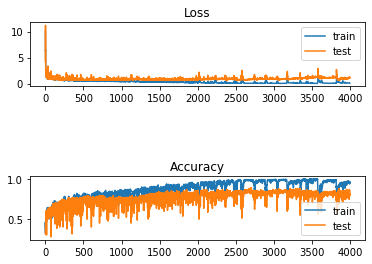

INFO:tensorflow:Assets written to: MuscleNET_Models/DNN/MuscleNET_Training_Quality_Detection_OVERSAMPLED\assets


In [17]:
# TRAINING SAME MODEL WITH OVERSAMPLING
x = np.loadtxt(feature_file_name)
y = np.loadtxt(label_file_name)
y = y.astype(int)


print("features shape ", x.shape)
print("labels shape ", y.shape)

counter = Counter(y)
print(counter)

oversample = SMOTE()
x,y = oversample.fit_resample(x,y)
x,y = shuffle(x,y,random_state=0)
counter = Counter(y)
print(counter)

y_one_hot = tf.one_hot(y, np.max(y)+1)
print("one hot encoding labels shape ", y_one_hot.shape)

exampleSize, featureSize = x.shape

numTrain = int(x.shape[0] * 0.7)
x_train = x[:numTrain,:]
y_train = y_one_hot[:numTrain]
x_test = x[numTrain:,:]
y_test = y_one_hot[numTrain:]

print("training set feature shape ", x_train.shape)
print("training set label shape ", y_train.shape)
print("test set feature shape ", x_test.shape)
print("test set label shape ", y_test.shape)

oversampled_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(featureSize,)),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

oversampled_model.compile(optimizer = optimizer,
             loss = "categorical_crossentropy",
             metrics=["acc",
                     tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.FalsePositives(),
                     tf.keras.metrics.TrueNegatives(),
                     tf.keras.metrics.TruePositives()])
oversampled_model.summary()

starting = time.time()
history = oversampled_model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=4000)
timePassed = time.time() - starting
print("Time passed for training: ", timePassed)

loss = history.history["loss"]
t_loss = history.history["val_loss"]
acc = history.history["acc"]
t_acc = history.history["val_acc"]
false_negatives = history.history["false_negatives_3"]
t_false_negatives = history.history["val_false_negatives_3"]
false_positives = history.history["false_positives_3"]
t_false_positives = history.history["val_false_positives_3"]
true_negatives = history.history["true_negatives_3"]
t_true_negatives = history.history["val_true_negatives_3"]
true_positives = history.history["true_positives_3"]
t_true_positives = history.history["val_true_positives_3"]
print("-----------------------")
print("Loss: ", loss[-1])
print("Test Loss: ", t_loss[-1])
print("-----------------------")
print("Accuracy: ", acc[-1])
print("Test Accuracy: ", t_acc[-1])
print("-----------------------")
print("False Negatives: ", false_negatives[-1])
print("Test False Negatives: ", t_false_negatives[-1])
print("-----------------------")
print("False Positives: ", false_positives[-1])
print("Test False Positives: ", t_false_positives[-1])
print("-----------------------")
print("True Negatives: ", true_negatives[-1])
print("Test True Negatives: ", t_true_negatives[-1])
print("-----------------------")
print("True Positives: ", true_positives[-1])
print("Test True Positives: ", t_true_positives[-1])
print("-----------------------")
print("Precisions:")
tp = true_positives[-1]
fp = false_positives[-1]
fn = false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("For Training Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)
tp = t_true_positives[-1]
fp = t_false_positives[-1]
fn = t_false_negatives[-1]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print("For Test Set => Precision: ", precision, " , Recall: ", recall, " , and F1-Score: ", f1_score)

plt.subplot(311)
plt.title("Loss")
plt.plot(loss,label="train")
plt.plot(t_loss,label="test")
plt.legend()

plt.subplot(313)
plt.title("Accuracy")
plt.plot(acc,label="train")
plt.plot(t_acc,label="test")
plt.legend()
plt.show()

# saving model in SavedModel format
model.save(model_saving_path+"_OVERSAMPLED")
# converting SavedModel into tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(model_saving_path+"_OVERSAMPLED")
tflite_model = converter.convert()
with open('MuscleNET_Training_Quality_Detection_OVERSAMPLED.tflite', 'wb') as f:
      f.write(tflite_model)